## Capstone Project - Life Insurance Sales

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')
pd.options.display.float_format = '{:.2f}'.format

### Data Load

In [2]:
df = pd.read_excel("Sales.xlsx",sheet_name='Sales')

In [3]:
df.head()

CustID  AgentBonus   Age  CustTenure              Channel      Occupation  \
0  7000000        4409 22.00        4.00                Agent        Salaried   
1  7000001        2214 11.00        2.00  Third Party Partner        Salaried   
2  7000002        4273 26.00        4.00                Agent     Free Lancer   
3  7000003        1791 11.00         NaN  Third Party Partner        Salaried   
4  7000004        2955  6.00         NaN                Agent  Small Business   

  EducationField   Gender  ExistingProdType Designation  NumberOfPolicy  \
0       Graduate   Female                 3     Manager            2.00   
1       Graduate     Male                 4     Manager            4.00   
2  Post Graduate     Male                 4         Exe            3.00   
3       Graduate  Fe male                 3   Executive            3.00   
4             UG     Male                 3   Executive            4.00   

  MaritalStatus  MonthlyIncome  Complaint  ExistingPolicyTenure  SumAssured  \
0        Single       20993.00          1                  2.00   806761.00   
1      Divorced       20130.00          0                  3.00   294502.00   
2     Unmarried       17090.00          1                  2.00         NaN   
3      Divorced       17909.00          1                  2.00   268635.00   
4      Divorced       18468.00          0                  4.00   366405.00   

    Zone PaymentMethod  LastMonthCalls  CustCareScore  
0  North   Half Yearly               5           2.00  
1  North        Yearly               7           3.00  
2  North        Yearly               0           3.00  
3   West   Half Yearly               0           5.00  
4   West   Half Yearly               2           5.00

In [4]:
df.shape

(4520, 20)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4520 entries, 0 to 4519
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CustID                4520 non-null   int64  
 1   AgentBonus            4520 non-null   int64  
 2   Age                   4251 non-null   float64
 3   CustTenure            4294 non-null   float64
 4   Channel               4520 non-null   object 
 5   Occupation            4520 non-null   object 
 6   EducationField        4520 non-null   object 
 7   Gender                4520 non-null   object 
 8   ExistingProdType      4520 non-null   int64  
 9   Designation           4520 non-null   object 
 10  NumberOfPolicy        4475 non-null   float64
 11  MaritalStatus         4520 non-null   object 
 12  MonthlyIncome         4284 non-null   float64
 13  Complaint             4520 non-null   int64  
 14  ExistingPolicyTenure  4336 non-null   float64
 15  SumAssured           

### Data Cleaning

In [6]:
df.duplicated().sum()

0

In [7]:
df["CustID"] = pd.Categorical(df["CustID"])

In [8]:
len(df["CustID"].value_counts().index)

4520

In [9]:
df.isnull().sum()

CustID                    0
AgentBonus                0
Age                     269
CustTenure              226
Channel                   0
Occupation                0
EducationField            0
Gender                    0
ExistingProdType          0
Designation               0
NumberOfPolicy           45
MaritalStatus             0
MonthlyIncome           236
Complaint                 0
ExistingPolicyTenure    184
SumAssured              154
Zone                      0
PaymentMethod             0
LastMonthCalls            0
CustCareScore            52
dtype: int64

In [10]:
df.drop("CustID",axis=1,inplace=True)

In [11]:
df.describe(include="all").T

count unique          top  freq      mean       std  \
AgentBonus           4520.00    NaN          NaN   NaN   4077.84   1403.32   
Age                  4251.00    NaN          NaN   NaN     14.49      9.04   
CustTenure           4294.00    NaN          NaN   NaN     14.47      8.96   
Channel                 4520      3        Agent  3194       NaN       NaN   
Occupation              4520      5     Salaried  2192       NaN       NaN   
EducationField          4520      7     Graduate  1870       NaN       NaN   
Gender                  4520      3         Male  2688       NaN       NaN   
ExistingProdType     4520.00    NaN          NaN   NaN      3.69      1.02   
Designation             4520      6      Manager  1620       NaN       NaN   
NumberOfPolicy       4475.00    NaN          NaN   NaN      3.57      1.46   
MaritalStatus           4520      4      Married  2268       NaN       NaN   
MonthlyIncome        4284.00    NaN          NaN   NaN  22890.31   4885.60   
Complaint            4520.00    NaN          NaN   NaN      0.29      0.45   
ExistingPolicyTenure 4336.00    NaN          NaN   NaN      4.13      3.35   
SumAssured           4366.00    NaN          NaN   NaN 619999.70 246234.82   
Zone                    4520      4         West  2566       NaN       NaN   
PaymentMethod           4520      4  Half Yearly  2656       NaN       NaN   
LastMonthCalls       4520.00    NaN          NaN   NaN      4.63      3.62   
CustCareScore        4468.00    NaN          NaN   NaN      3.07      1.38   

                           min       25%       50%       75%        max  
AgentBonus             1605.00   3027.75   3911.50   4867.25    9608.00  
Age                       2.00      7.00     13.00     20.00      58.00  
CustTenure                2.00      7.00     13.00     20.00      57.00  
Channel                    NaN       NaN       NaN       NaN        NaN  
Occupation                 NaN       NaN       NaN       NaN        NaN  
EducationField             NaN       NaN       NaN       NaN        NaN  
Gender                     NaN       NaN       NaN       NaN        NaN  
ExistingProdType          1.00      3.00      4.00      4.00       6.00  
Designation                NaN       NaN       NaN       NaN        NaN  
NumberOfPolicy            1.00      2.00      4.00      5.00       6.00  
MaritalStatus              NaN       NaN       NaN       NaN        NaN  
MonthlyIncome         16009.00  19683.50  21606.00  24725.00   38456.00  
Complaint                 0.00      0.00      0.00      1.00       1.00  
ExistingPolicyTenure      1.00      2.00      3.00      6.00      25.00  
SumAssured           168536.00 439443.25 578976.50 758236.00 1838496.00  
Zone                       NaN       NaN       NaN       NaN        NaN  
PaymentMethod              NaN       NaN       NaN       NaN        NaN  
LastMonthCalls            0.00      2.00      3.00      8.00      18.00  
CustCareScore             1.00      2.00      3.00      4.00       5.00

### Treating Mistakes

In [12]:
cat = list(df.dtypes[df.dtypes == 'object'].index)

for i in cat:
    print(df[i].unique())
    print('*'*100)

['Agent' 'Third Party Partner' 'Online']
****************************************************************************************************
['Salaried' 'Free Lancer' 'Small Business' 'Laarge Business'
 'Large Business']
****************************************************************************************************
['Graduate' 'Post Graduate' 'UG' 'Under Graduate' 'Engineer' 'Diploma'
 'MBA']
****************************************************************************************************
['Female' 'Male' 'Fe male']
****************************************************************************************************
['Manager' 'Exe' 'Executive' 'VP' 'AVP' 'Senior Manager']
****************************************************************************************************
['Single' 'Divorced' 'Unmarried' 'Married']
****************************************************************************************************
['North' 'West' 'East' 'South']
********************************

* There are some Category that has to be cleaned

* In Occupation - Laarge Business has to be cleaned and changed to Large Business.
* In Gender - Fe male has to be cleaned and changed to Female.
* In Designation - Exe & Executive can be combined as Single category as 'Executive'.
* In Marital Status - Single and Unmarried can be combined into 'Unmarried' Category.

In [13]:
df['EducationField'].value_counts(normalize=True)*100

Graduate         41.37
Under Graduate   26.33
Diploma          10.97
Engineer          9.03
Post Graduate     5.58
UG                5.09
MBA               1.64
Name: EducationField, dtype: float64

In Educationfield:
* Graduate, Under Graduate & UG can be combined as Single category - 'UG'.
* Engineer can be considered as UG, it is not a high level education field category. Only 9% are Engineers. If the Engineers have done master's degree, they would have selected Post Graduate or MBA Categories.
* Post Graduate & MBA can be combined as Single category - 'PG'.

In [14]:
df['Occupation']=np.where(df['Occupation'] =='Laarge Business','Large Business',df['Occupation'])
df['Gender']=np.where(df['Gender'] =='Fe male','Female',df['Gender'])
df['Designation']=np.where(df['Designation'] =='Exe','Executive',df['Designation'])
df['MaritalStatus']=np.where(df['MaritalStatus'] =='Single','Unmarried',df['MaritalStatus'])
df['EducationField']=np.where(df['EducationField'] =='Graduate','UG',df['EducationField'])
df['EducationField']=np.where(df['EducationField'] =='Under Graduate','UG',df['EducationField'])
df['EducationField']=np.where(df['EducationField'] =='Engineer','UG',df['EducationField'])
df['EducationField']=np.where(df['EducationField'] =='Post Graduate','PG',df['EducationField'])
df['EducationField']=np.where(df['EducationField'] =='MBA','PG',df['EducationField'])

In [15]:
for i in cat:
    print(i.upper())
    print(df[i].value_counts().index.to_list())
    print('*'*100)

CHANNEL
['Agent', 'Third Party Partner', 'Online']
****************************************************************************************************
OCCUPATION
['Salaried', 'Small Business', 'Large Business', 'Free Lancer']
****************************************************************************************************
EDUCATIONFIELD
['UG', 'Diploma', 'PG']
****************************************************************************************************
GENDER
['Male', 'Female']
****************************************************************************************************
DESIGNATION
['Executive', 'Manager', 'Senior Manager', 'AVP', 'VP']
****************************************************************************************************
MARITALSTATUS
['Married', 'Unmarried', 'Divorced']
****************************************************************************************************
ZONE
['West', 'North', 'East', 'South']
********************************************

In [16]:
for i in cat:
    print(i.upper())
    print(df[i].value_counts())
    print(i," in Percentage")
    print(df[i].value_counts(normalize=True)*100)
    print('*'*100)

CHANNEL
Agent                  3194
Third Party Partner     858
Online                  468
Name: Channel, dtype: int64
Channel  in Percentage
Agent                 70.66
Third Party Partner   18.98
Online                10.35
Name: Channel, dtype: float64
****************************************************************************************************
OCCUPATION
Salaried          2192
Small Business    1918
Large Business     408
Free Lancer          2
Name: Occupation, dtype: int64
Occupation  in Percentage
Salaried         48.50
Small Business   42.43
Large Business    9.03
Free Lancer       0.04
Name: Occupation, dtype: float64
****************************************************************************************************
EDUCATIONFIELD
UG         3698
Diploma     496
PG          326
Name: EducationField, dtype: int64
EducationField  in Percentage
UG        81.81
Diploma   10.97
PG         7.21
Name: EducationField, dtype: float64
*******************************************

In [17]:
for i in cat:
    df[i] = pd.Categorical(df[i])

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4520 entries, 0 to 4519
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   AgentBonus            4520 non-null   int64   
 1   Age                   4251 non-null   float64 
 2   CustTenure            4294 non-null   float64 
 3   Channel               4520 non-null   category
 4   Occupation            4520 non-null   category
 5   EducationField        4520 non-null   category
 6   Gender                4520 non-null   category
 7   ExistingProdType      4520 non-null   int64   
 8   Designation           4520 non-null   category
 9   NumberOfPolicy        4475 non-null   float64 
 10  MaritalStatus         4520 non-null   category
 11  MonthlyIncome         4284 non-null   float64 
 12  Complaint             4520 non-null   int64   
 13  ExistingPolicyTenure  4336 non-null   float64 
 14  SumAssured            4366 non-null   float64 
 15  Zone

In [19]:
df["ExistingProdType"] = pd.Categorical(df["ExistingProdType"])
df["Complaint"] = pd.Categorical(df["Complaint"])
df["CustCareScore"] = pd.Categorical(df["CustCareScore"])

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4520 entries, 0 to 4519
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   AgentBonus            4520 non-null   int64   
 1   Age                   4251 non-null   float64 
 2   CustTenure            4294 non-null   float64 
 3   Channel               4520 non-null   category
 4   Occupation            4520 non-null   category
 5   EducationField        4520 non-null   category
 6   Gender                4520 non-null   category
 7   ExistingProdType      4520 non-null   category
 8   Designation           4520 non-null   category
 9   NumberOfPolicy        4475 non-null   float64 
 10  MaritalStatus         4520 non-null   category
 11  MonthlyIncome         4284 non-null   float64 
 12  Complaint             4520 non-null   category
 13  ExistingPolicyTenure  4336 non-null   float64 
 14  SumAssured            4366 non-null   float64 
 15  Zone

In [21]:
cat = list(df.dtypes[df.dtypes == 'category'].index)

for i in cat:
    print(i.upper())
    print(df[i].value_counts())
    print(i," in Percentage")
    print(df[i].value_counts(normalize=True)*100)
    print('*'*100)

CHANNEL
Agent                  3194
Third Party Partner     858
Online                  468
Name: Channel, dtype: int64
Channel  in Percentage
Agent                 70.66
Third Party Partner   18.98
Online                10.35
Name: Channel, dtype: float64
****************************************************************************************************
OCCUPATION
Salaried          2192
Small Business    1918
Large Business     408
Free Lancer          2
Name: Occupation, dtype: int64
Occupation  in Percentage
Salaried         48.50
Small Business   42.43
Large Business    9.03
Free Lancer       0.04
Name: Occupation, dtype: float64
****************************************************************************************************
EDUCATIONFIELD
UG         3698
Diploma     496
PG          326
Name: EducationField, dtype: int64
EducationField  in Percentage
UG        81.81
Diploma   10.97
PG         7.21
Name: EducationField, dtype: float64
*******************************************

In [22]:
for i in cat:
    print(df[i].unique())
    print('*'*100)

['Agent', 'Third Party Partner', 'Online']
Categories (3, object): ['Agent', 'Online', 'Third Party Partner']
****************************************************************************************************
['Salaried', 'Free Lancer', 'Small Business', 'Large Business']
Categories (4, object): ['Free Lancer', 'Large Business', 'Salaried', 'Small Business']
****************************************************************************************************
['UG', 'PG', 'Diploma']
Categories (3, object): ['Diploma', 'PG', 'UG']
****************************************************************************************************
['Female', 'Male']
Categories (2, object): ['Female', 'Male']
****************************************************************************************************
[3, 4, 2, 5, 1, 6]
Categories (6, int64): [1, 2, 3, 4, 5, 6]
****************************************************************************************************
['Manager', 'Executive', 'VP', 'AVP', 

* There are some Null Values in the CustCare Score that has to be cleaned.

### Treating Missing values

In [23]:
(df.isnull().sum().sum()/df.size)*100

1.3577084303679554

In [24]:
(df.isnull().sum()/len(df))*100

AgentBonus             0.00
Age                    5.95
CustTenure             5.00
Channel                0.00
Occupation             0.00
EducationField         0.00
Gender                 0.00
ExistingProdType       0.00
Designation            0.00
NumberOfPolicy         1.00
MaritalStatus          0.00
MonthlyIncome          5.22
Complaint              0.00
ExistingPolicyTenure   4.07
SumAssured             3.41
Zone                   0.00
PaymentMethod          0.00
LastMonthCalls         0.00
CustCareScore          1.15
dtype: float64

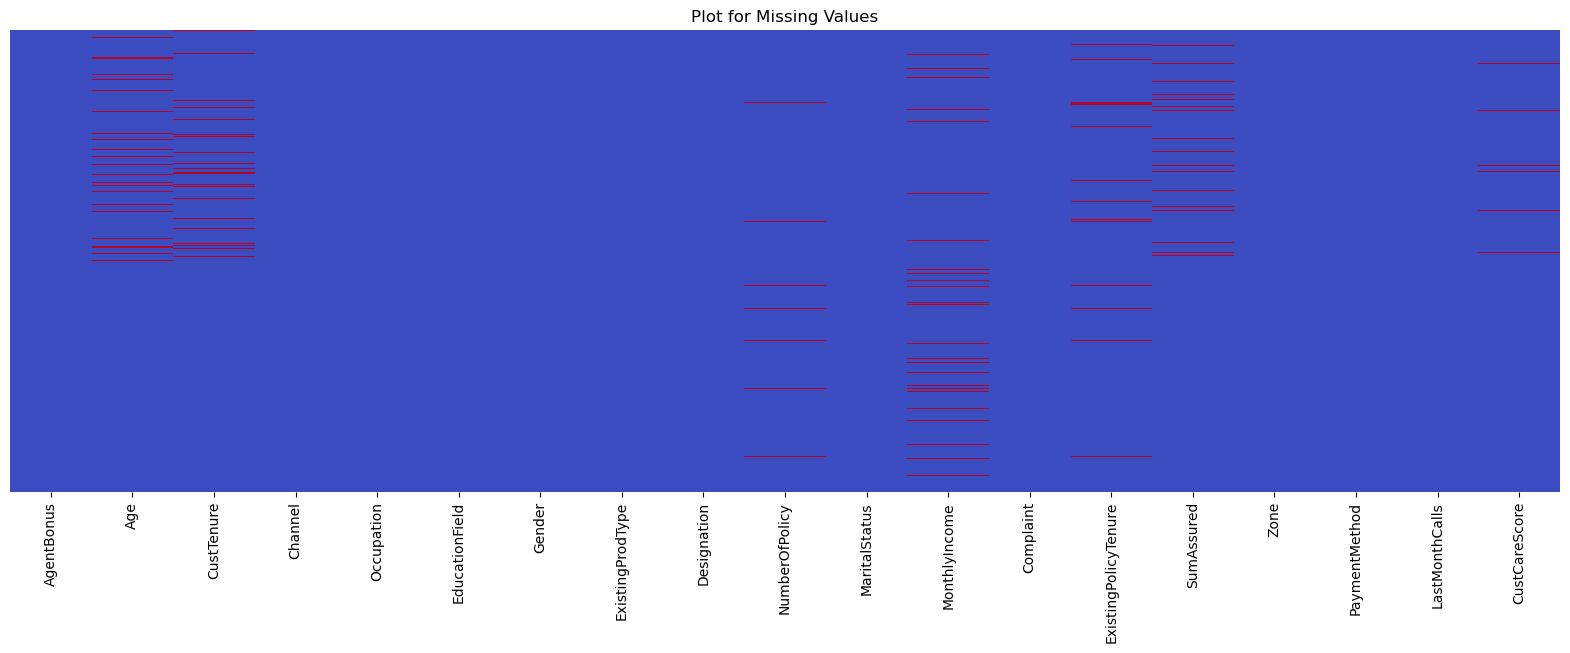

In [25]:
plt.figure(figsize = (20,6))
sns.heatmap(df.isnull(),cbar=False,cmap='coolwarm',yticklabels=False)
plt.title("Plot for Missing Values")
plt.show()

In [26]:
for i in cat: 
    print(i,":",df[i].isnull().sum())

Channel : 0
Occupation : 0
EducationField : 0
Gender : 0
ExistingProdType : 0
Designation : 0
MaritalStatus : 0
Complaint : 0
Zone : 0
PaymentMethod : 0
CustCareScore : 52


* Null Values for categorical variable are imputed with mode.

In [27]:
df["CustCareScore"].mode()

0   3.00
Name: CustCareScore, dtype: category
Categories (5, float64): [1.00, 2.00, 3.00, 4.00, 5.00]

In [28]:
df["CustCareScore"].fillna(df["CustCareScore"].mode()[0], inplace=True)

In [29]:
for i in cat: 
    print(i,":",df[i].isnull().sum())

Channel : 0
Occupation : 0
EducationField : 0
Gender : 0
ExistingProdType : 0
Designation : 0
MaritalStatus : 0
Complaint : 0
Zone : 0
PaymentMethod : 0
CustCareScore : 0


In [30]:
df["CustCareScore"].value_counts()

3.0    1419
1.0     928
5.0     893
4.0     826
2.0     454
Name: CustCareScore, dtype: int64

In [31]:
num = list(df.dtypes[df.dtypes != 'category'].index)
num

['AgentBonus',
 'Age',
 'CustTenure',
 'NumberOfPolicy',
 'MonthlyIncome',
 'ExistingPolicyTenure',
 'SumAssured',
 'LastMonthCalls']

In [32]:
for i in num: 
    print(i,":",df[i].isnull().sum())

AgentBonus : 0
Age : 269
CustTenure : 226
NumberOfPolicy : 45
MonthlyIncome : 236
ExistingPolicyTenure : 184
SumAssured : 154
LastMonthCalls : 0


In [33]:
df.describe().T

count      mean       std       min       25%  \
AgentBonus           4520.00   4077.84   1403.32   1605.00   3027.75   
Age                  4251.00     14.49      9.04      2.00      7.00   
CustTenure           4294.00     14.47      8.96      2.00      7.00   
NumberOfPolicy       4475.00      3.57      1.46      1.00      2.00   
MonthlyIncome        4284.00  22890.31   4885.60  16009.00  19683.50   
ExistingPolicyTenure 4336.00      4.13      3.35      1.00      2.00   
SumAssured           4366.00 619999.70 246234.82 168536.00 439443.25   
LastMonthCalls       4520.00      4.63      3.62      0.00      2.00   

                           50%       75%        max  
AgentBonus             3911.50   4867.25    9608.00  
Age                      13.00     20.00      58.00  
CustTenure               13.00     20.00      57.00  
NumberOfPolicy            4.00      5.00       6.00  
MonthlyIncome         21606.00  24725.00   38456.00  
ExistingPolicyTenure      3.00      6.00      25.00  
SumAssured           578976.50 758236.00 1838496.00  
LastMonthCalls            3.00      8.00      18.00

In [34]:
for i in num: 
    print(i,":",df[i].mean())

AgentBonus : 4077.838274336283
Age : 14.494707127734651
CustTenure : 14.469026548672566
NumberOfPolicy : 3.56536312849162
MonthlyIncome : 22890.309990662932
ExistingPolicyTenure : 4.130073800738008
SumAssured : 619999.6992670636
LastMonthCalls : 4.626991150442477


In [35]:
for i in num:
    df[i].fillna(df[i].mean(), inplace=True)

In [36]:
for i in num: 
    print(i,":",df[i].isnull().sum())

AgentBonus : 0
Age : 0
CustTenure : 0
NumberOfPolicy : 0
MonthlyIncome : 0
ExistingPolicyTenure : 0
SumAssured : 0
LastMonthCalls : 0


In [37]:
df.describe().T

count      mean       std       min       25%  \
AgentBonus           4520.00   4077.84   1403.32   1605.00   3027.75   
Age                  4520.00     14.49      8.76      2.00      8.00   
CustTenure           4520.00     14.47      8.74      2.00      8.00   
NumberOfPolicy       4520.00      3.57      1.45      1.00      2.00   
MonthlyIncome        4520.00  22890.31   4756.32  16009.00  19858.00   
ExistingPolicyTenure 4520.00      4.13      3.28      1.00      2.00   
SumAssured           4520.00 619999.70 242002.82 168536.00 444476.25   
LastMonthCalls       4520.00      4.63      3.62      0.00      2.00   

                           50%       75%        max  
AgentBonus             3911.50   4867.25    9608.00  
Age                      14.00     19.00      58.00  
CustTenure               14.00     19.00      57.00  
NumberOfPolicy            4.00      5.00       6.00  
MonthlyIncome         21877.00  24531.75   38456.00  
ExistingPolicyTenure      3.00      5.00      25.00  
SumAssured           590012.50 750010.50 1838496.00  
LastMonthCalls            3.00      8.00      18.00

In [38]:
df.describe(include='all').T

count unique          top    freq      mean       std  \
AgentBonus           4520.00    NaN          NaN     NaN   4077.84   1403.32   
Age                  4520.00    NaN          NaN     NaN     14.49      8.76   
CustTenure           4520.00    NaN          NaN     NaN     14.47      8.74   
Channel                 4520      3        Agent    3194       NaN       NaN   
Occupation              4520      4     Salaried    2192       NaN       NaN   
EducationField          4520      3           UG    3698       NaN       NaN   
Gender                  4520      2         Male    2688       NaN       NaN   
ExistingProdType     4520.00   6.00         4.00 1916.00       NaN       NaN   
Designation             4520      5    Executive    1662       NaN       NaN   
NumberOfPolicy       4520.00    NaN          NaN     NaN      3.57      1.45   
MaritalStatus           4520      3      Married    2268       NaN       NaN   
MonthlyIncome        4520.00    NaN          NaN     NaN  22890.31   4756.32   
Complaint            4520.00   2.00         0.00 3222.00       NaN       NaN   
ExistingPolicyTenure 4520.00    NaN          NaN     NaN      4.13      3.28   
SumAssured           4520.00    NaN          NaN     NaN 619999.70 242002.82   
Zone                    4520      4         West    2566       NaN       NaN   
PaymentMethod           4520      4  Half Yearly    2656       NaN       NaN   
LastMonthCalls       4520.00    NaN          NaN     NaN      4.63      3.62   
CustCareScore        4520.00   5.00         3.00 1419.00       NaN       NaN   

                           min       25%       50%       75%        max  
AgentBonus             1605.00   3027.75   3911.50   4867.25    9608.00  
Age                       2.00      8.00     14.00     19.00      58.00  
CustTenure                2.00      8.00     14.00     19.00      57.00  
Channel                    NaN       NaN       NaN       NaN        NaN  
Occupation                 NaN       NaN       NaN       NaN        NaN  
EducationField             NaN       NaN       NaN       NaN        NaN  
Gender                     NaN       NaN       NaN       NaN        NaN  
ExistingProdType           NaN       NaN       NaN       NaN        NaN  
Designation                NaN       NaN       NaN       NaN        NaN  
NumberOfPolicy            1.00      2.00      4.00      5.00       6.00  
MaritalStatus              NaN       NaN       NaN       NaN        NaN  
MonthlyIncome         16009.00  19858.00  21877.00  24531.75   38456.00  
Complaint                  NaN       NaN       NaN       NaN        NaN  
ExistingPolicyTenure      1.00      2.00      3.00      5.00      25.00  
SumAssured           168536.00 444476.25 590012.50 750010.50 1838496.00  
Zone                       NaN       NaN       NaN       NaN        NaN  
PaymentMethod              NaN       NaN       NaN       NaN        NaN  
LastMonthCalls            0.00      2.00      3.00      8.00      18.00  
CustCareScore              NaN       NaN       NaN       NaN        NaN

## EDA

### CountPlot

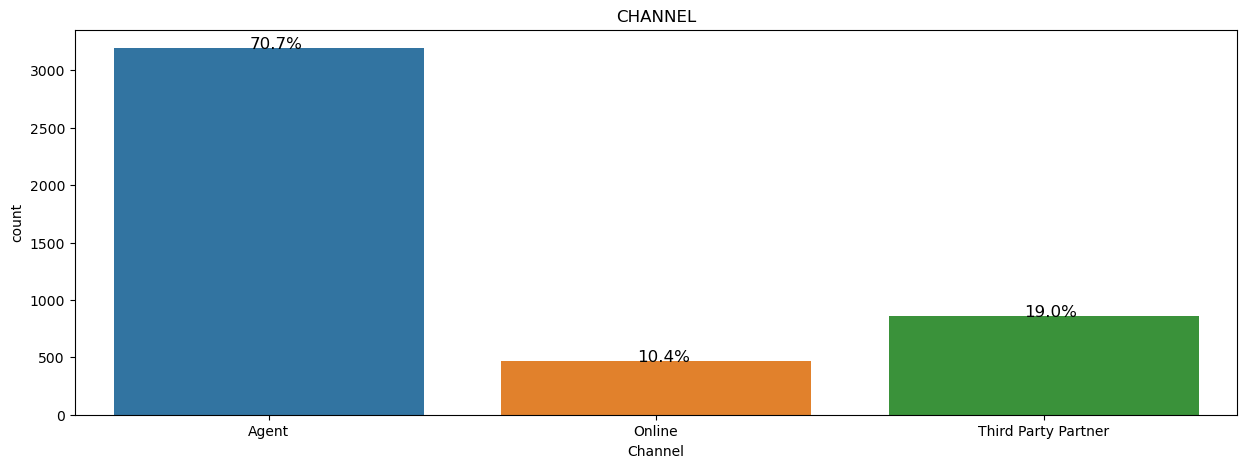

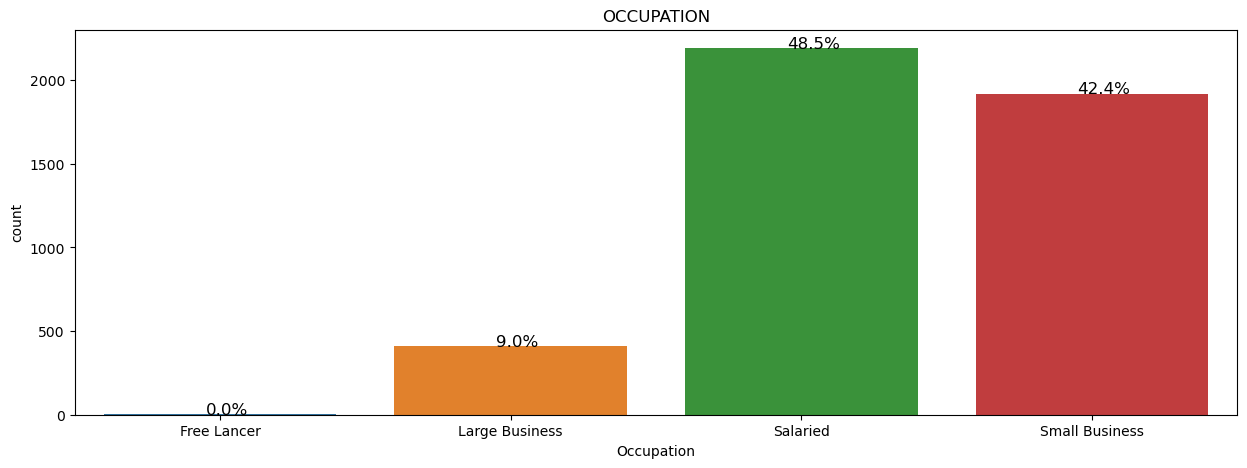

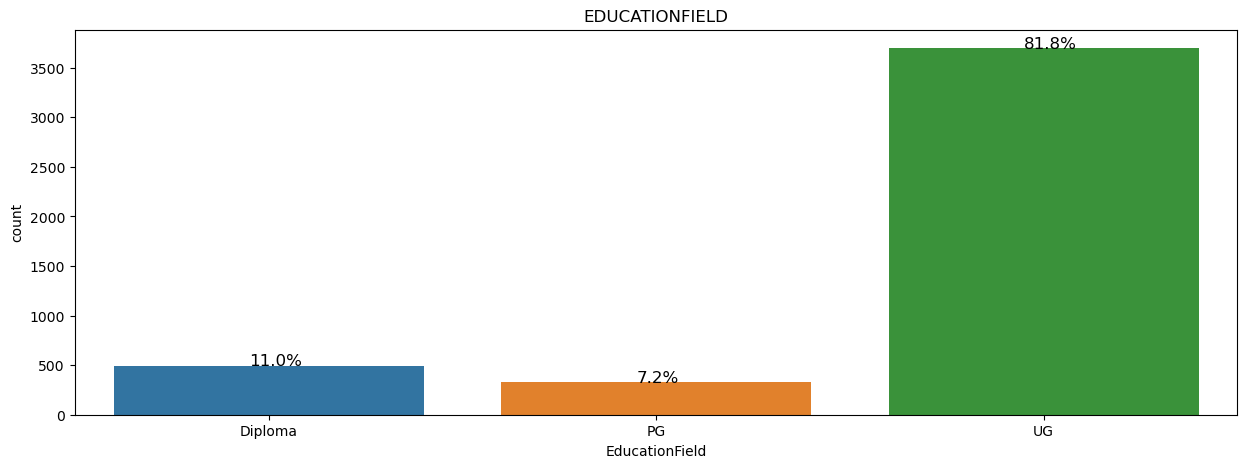

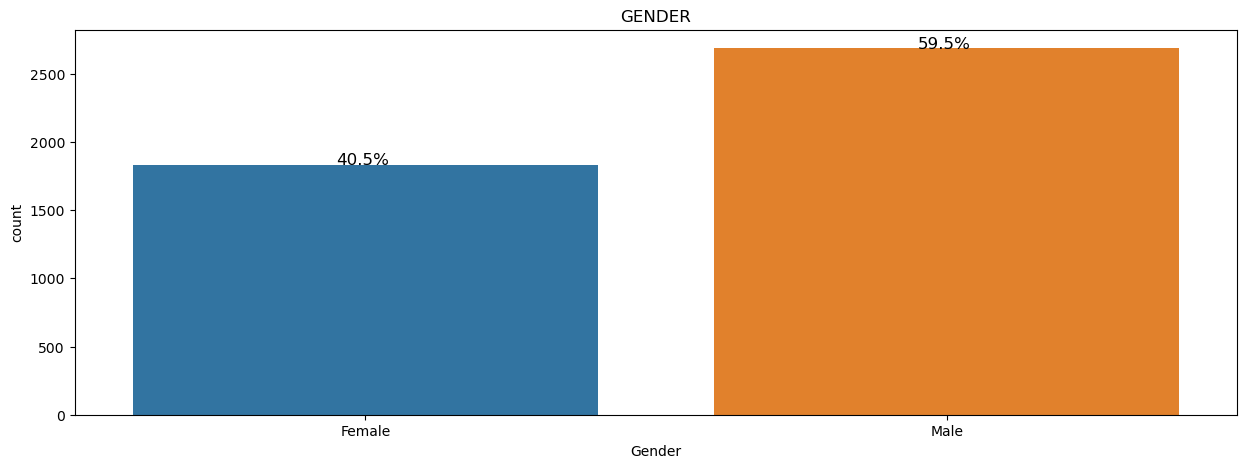

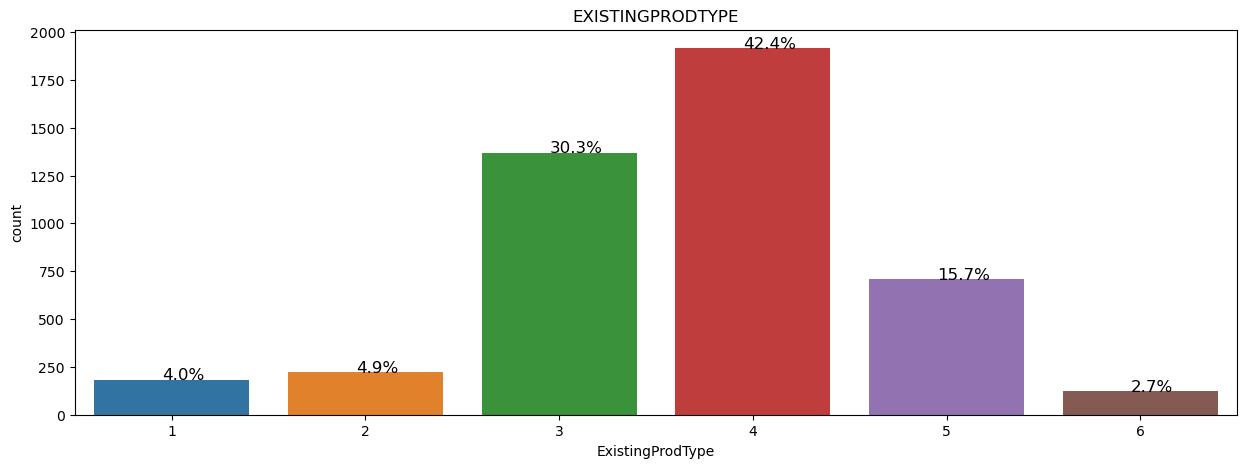

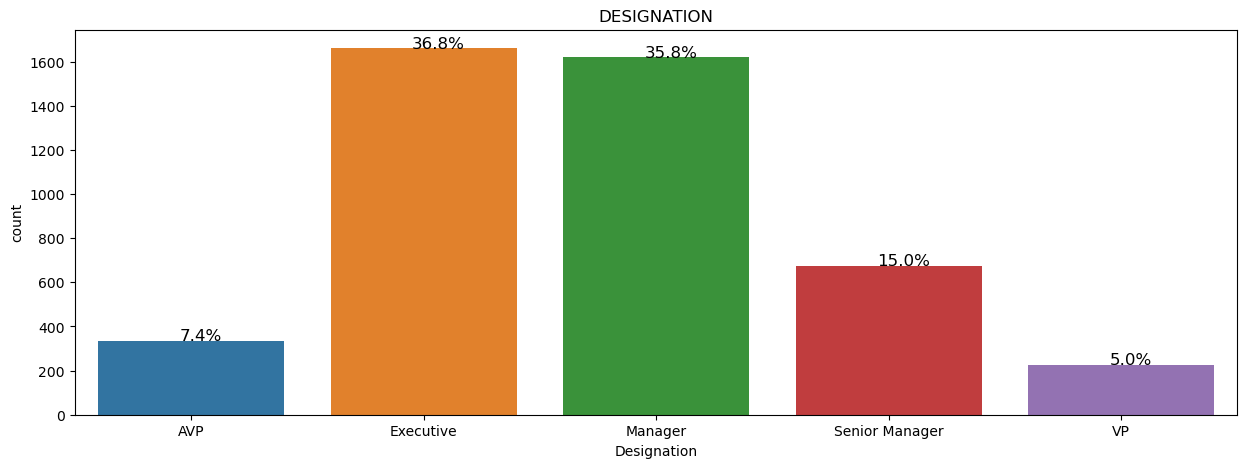

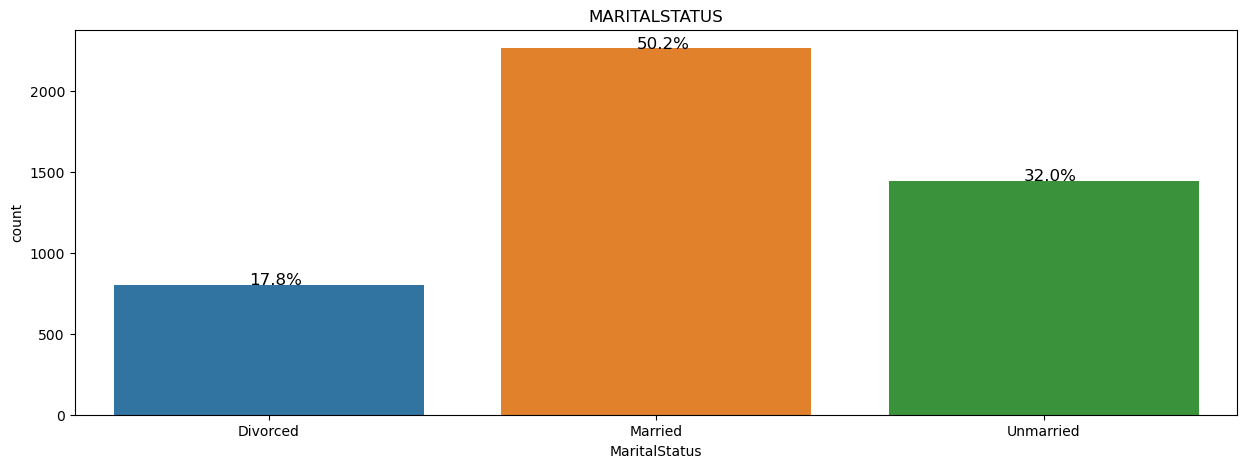

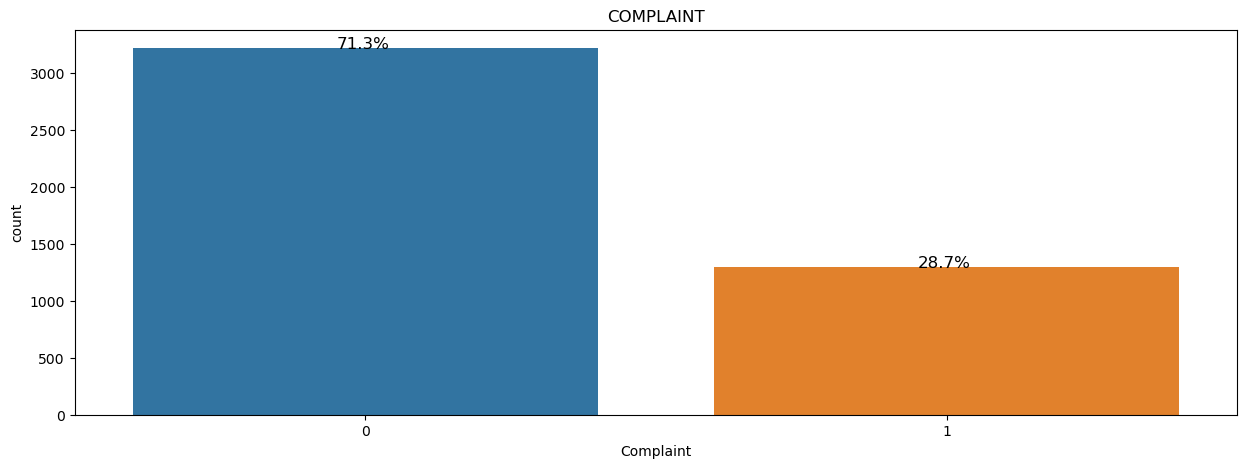

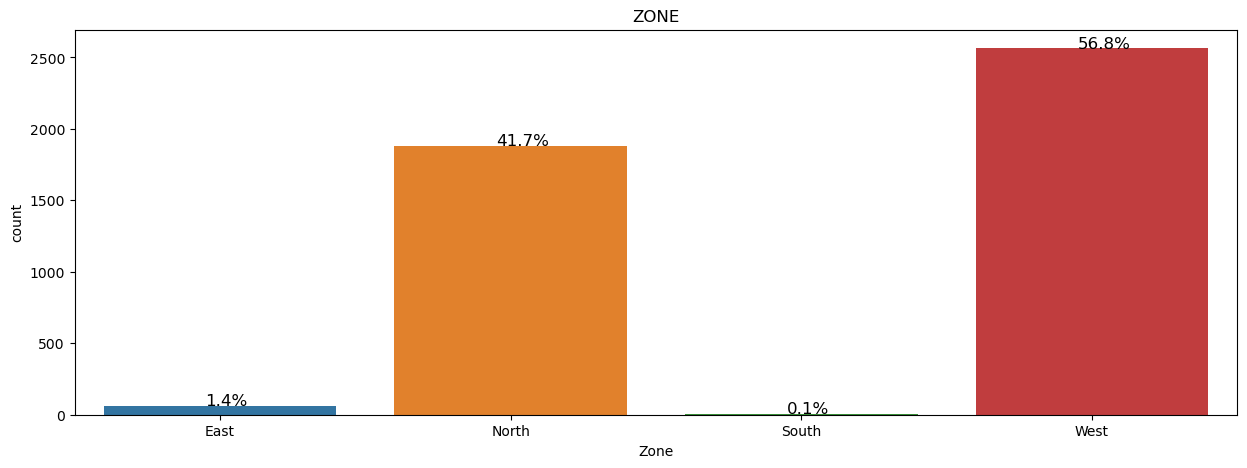

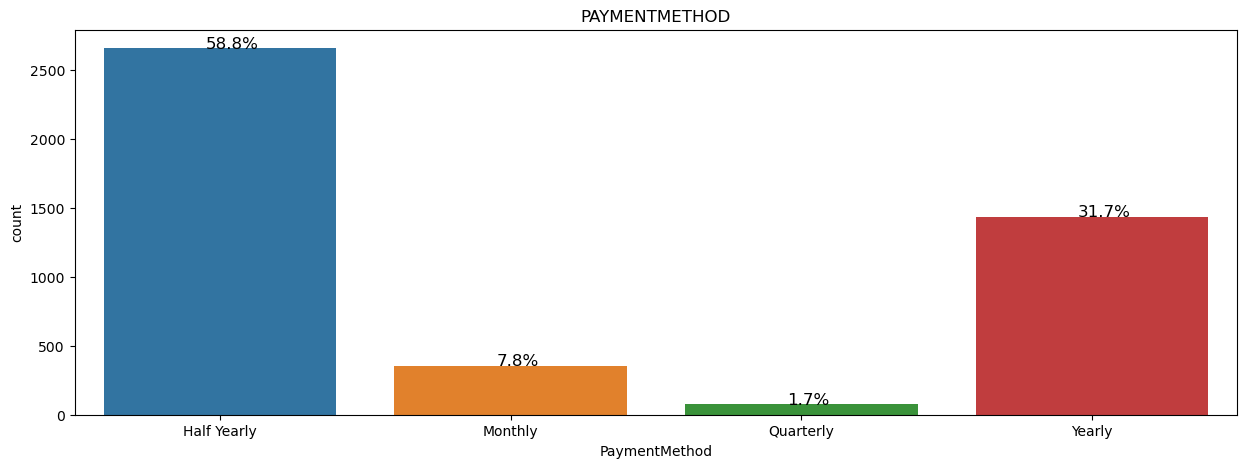

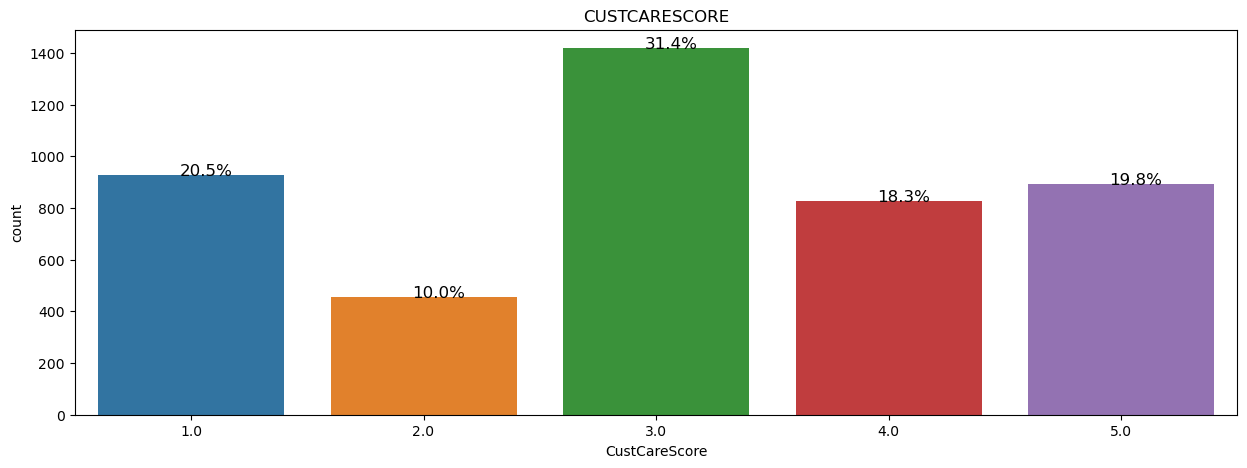

In [39]:
def count_plot(Default,cat):
        total = len(df[cat])
        fig,axes = plt.subplots(figsize = (15,5))
        ax = sns.countplot(x = i,data = df)
        axes.set_title(i.upper())
        for p in ax.patches:
            percentage = '{:.1f}%'.format(100 * p.get_height()/total) 
            x = p.get_x() + p.get_width() / 2 - 0.05 
            y = p.get_y() + p.get_height()           
        
            ax.annotate(percentage, (x, y), size = 12)
for i in cat:
    count_plot(df,i)

### Boxplot

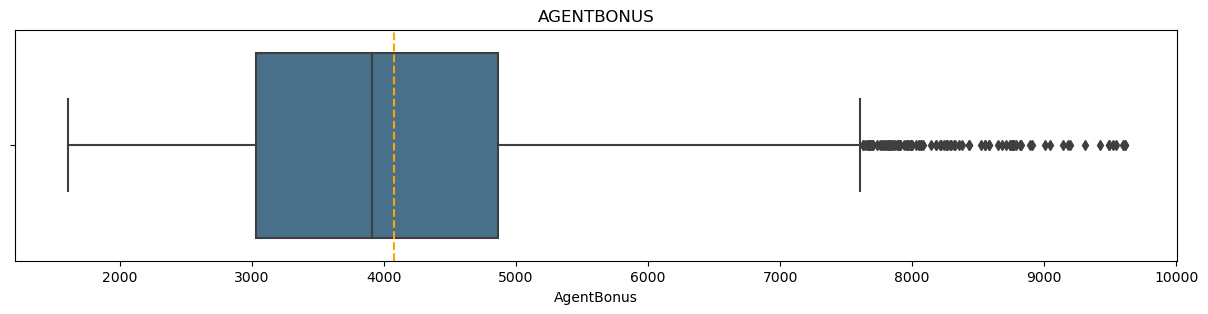

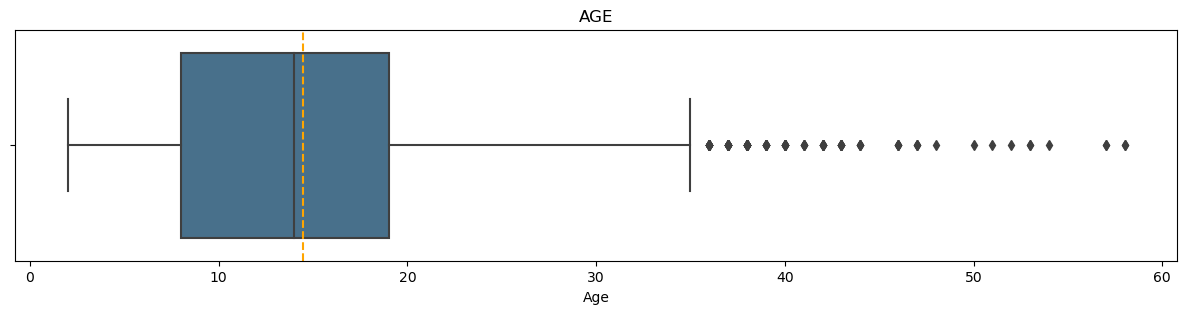

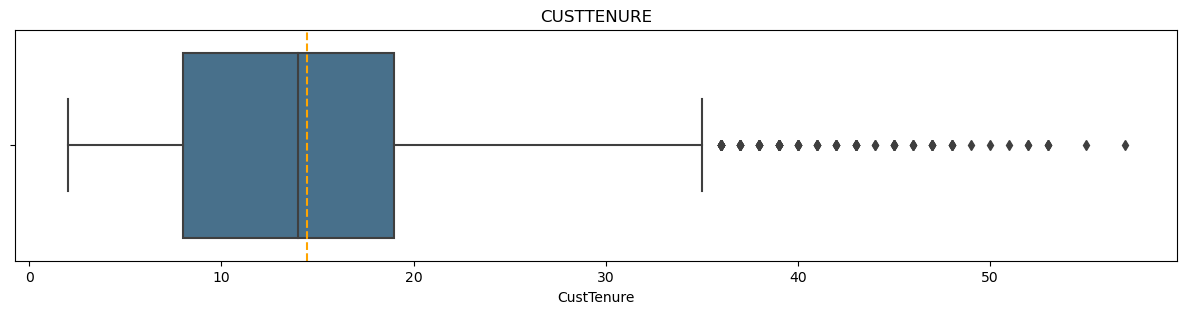

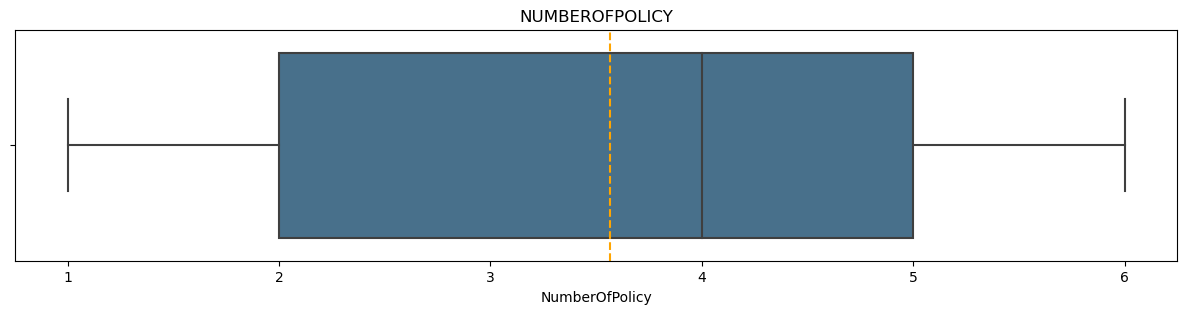

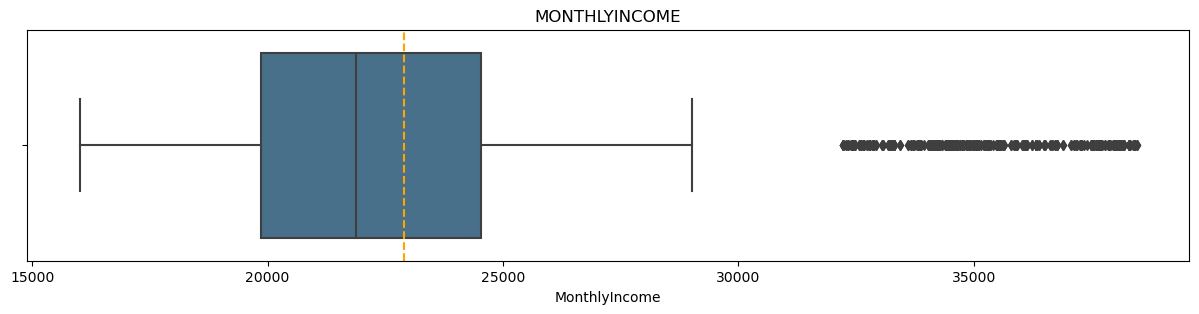

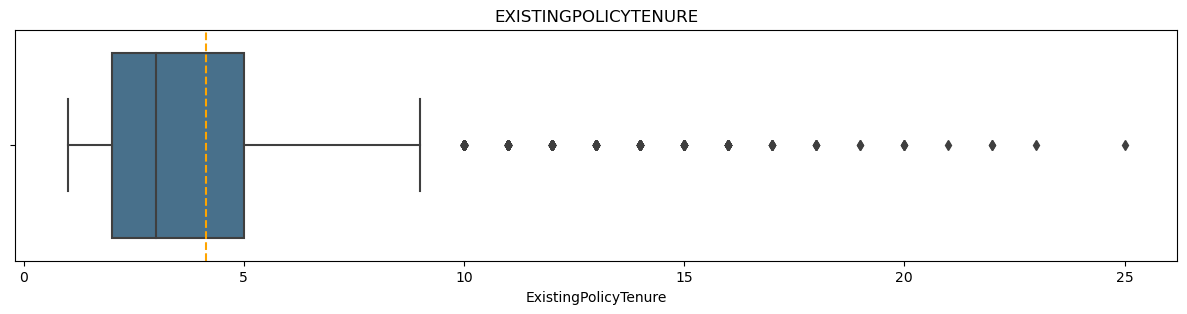

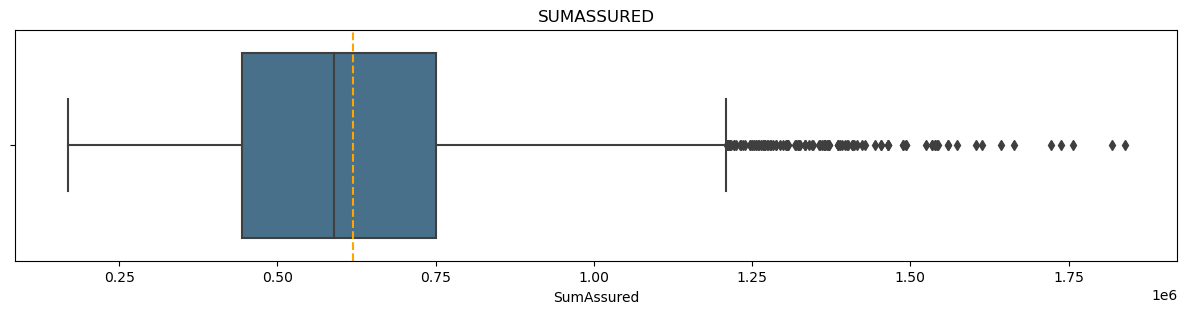

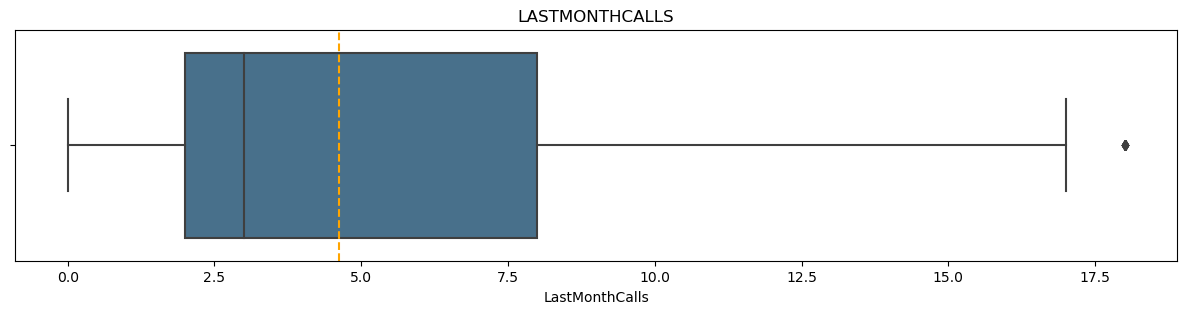

In [40]:
def plot_box(df,num):
    for i in num:
        fig,axes = plt.subplots(figsize = (15,3))
        sns.boxplot(data = df,x = i,saturation = 0.45)
        axes.set_title(i.upper())
        axes.axvline(x = df[i].mean(),color = 'orange',linestyle = '--')
plot_box(df,num)

### Treating Outliers

In [41]:
df_num = df.drop(['Channel',
 'Occupation',
 'EducationField',
 'Gender',
 'ExistingProdType',
 'Designation',
 'MaritalStatus',
 'Complaint',
 'Zone',
 'PaymentMethod',
 'CustCareScore','AgentBonus'], axis = 1)

In [42]:
Q1 = df_num.quantile(0.25)
Q3 = df_num.quantile(0.75)
IQR = Q3-Q1
UL = Q3 + 1.5*IQR
LL = Q1 - 1.5*IQR

In [43]:
UL

Age                         35.50
CustTenure                  35.50
NumberOfPolicy               9.50
MonthlyIncome            31542.38
ExistingPolicyTenure         9.50
SumAssured             1208311.88
LastMonthCalls              17.00
dtype: float64

In [44]:
LL

Age                        -8.50
CustTenure                 -8.50
NumberOfPolicy             -2.50
MonthlyIncome           12847.38
ExistingPolicyTenure       -2.50
SumAssured             -13825.12
LastMonthCalls             -7.00
dtype: float64

In [45]:
((df_num > UL)| (df_num < LL)).sum()

Age                     105
CustTenure               97
NumberOfPolicy            0
MonthlyIncome           384
ExistingPolicyTenure    345
SumAssured              110
LastMonthCalls           12
dtype: int64

In [46]:
(((df_num > UL)| (df_num < LL)).sum()/len(df))*100

Age                    2.32
CustTenure             2.15
NumberOfPolicy         0.00
MonthlyIncome          8.50
ExistingPolicyTenure   7.63
SumAssured             2.43
LastMonthCalls         0.27
dtype: float64

In [47]:
((df_num > UL)| (df_num < LL)).sum().sum()

1053

In [48]:
(((df_num > UL)| (df_num < LL)).sum().sum()/df_num.size)*100

3.3280657395701643

In [49]:
def outliers(col):
    Q1,Q3 = col.quantile([0.25,0.75])
    IQR = Q3-Q1
    IQR_L = Q1-(1.5 * IQR)
    IQR_U = Q3+(1.5 * IQR)
    return IQR_L,IQR_U

In [50]:
out_num = list(df_num.dtypes[df_num.dtypes != 'category'].index)
out_num

['Age',
 'CustTenure',
 'NumberOfPolicy',
 'MonthlyIncome',
 'ExistingPolicyTenure',
 'SumAssured',
 'LastMonthCalls']

In [51]:
for i in out_num:
    LL,UL = outliers(df[i])
    df[i] = np.where(df[i]<LL,LL,df[i])
    df[i] = np.where(df[i]>UL,UL,df[i])

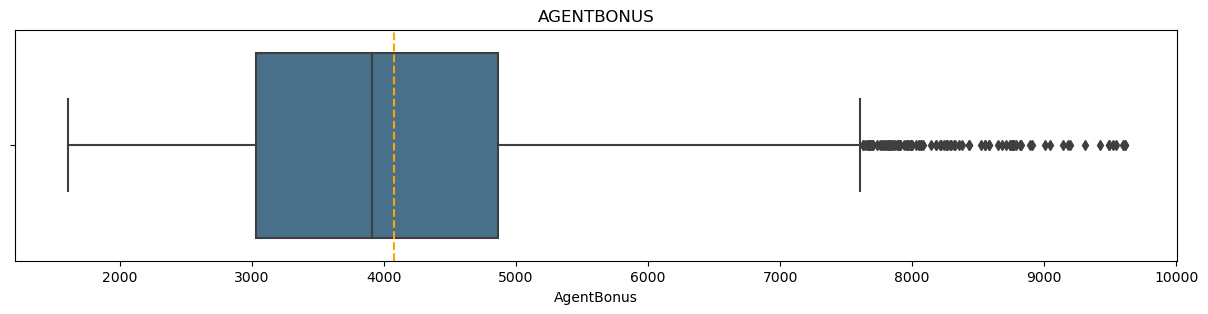

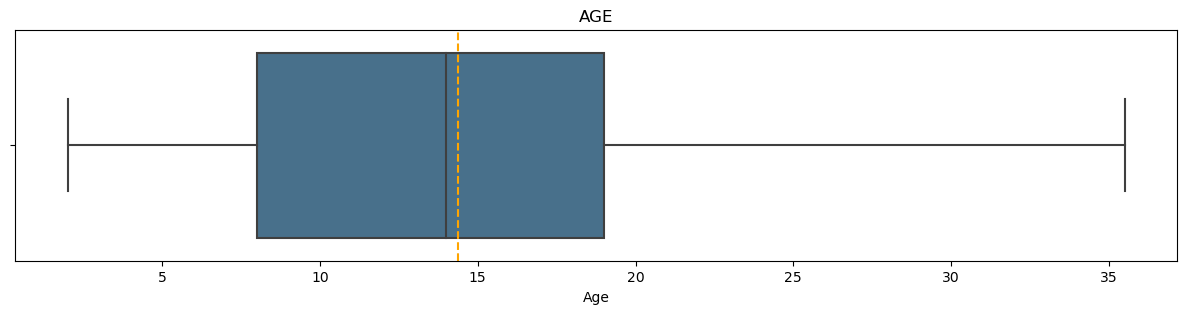

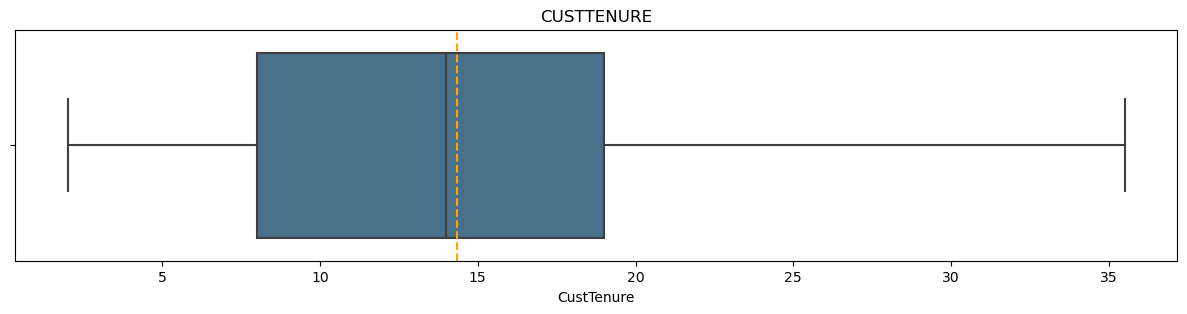

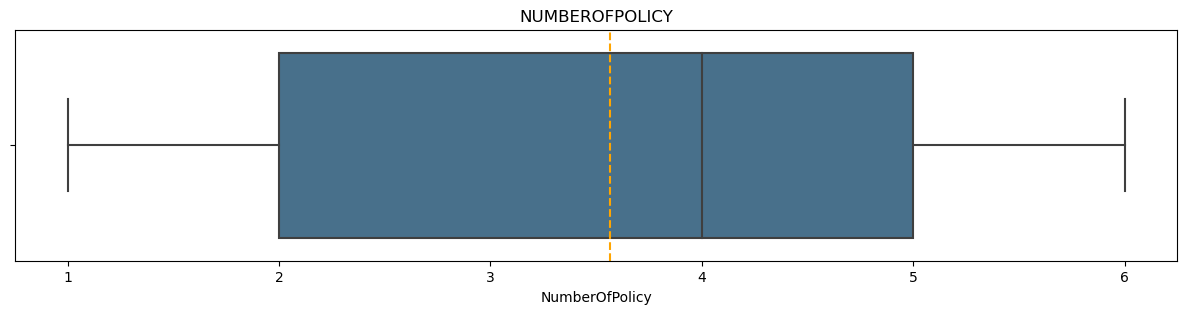

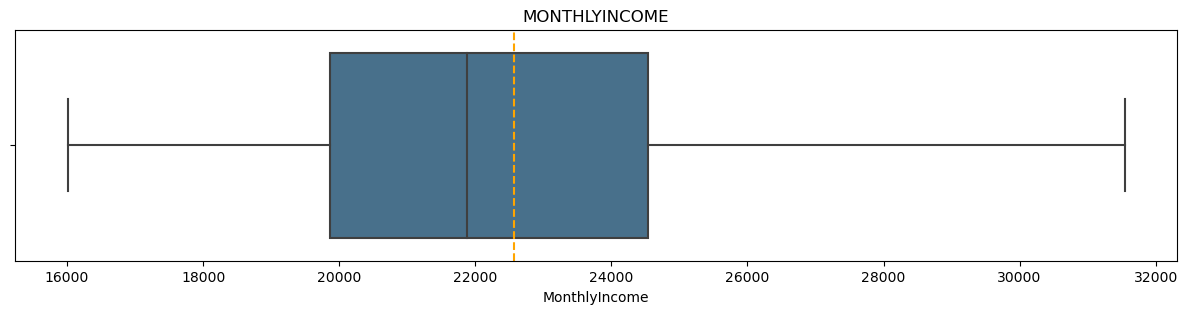

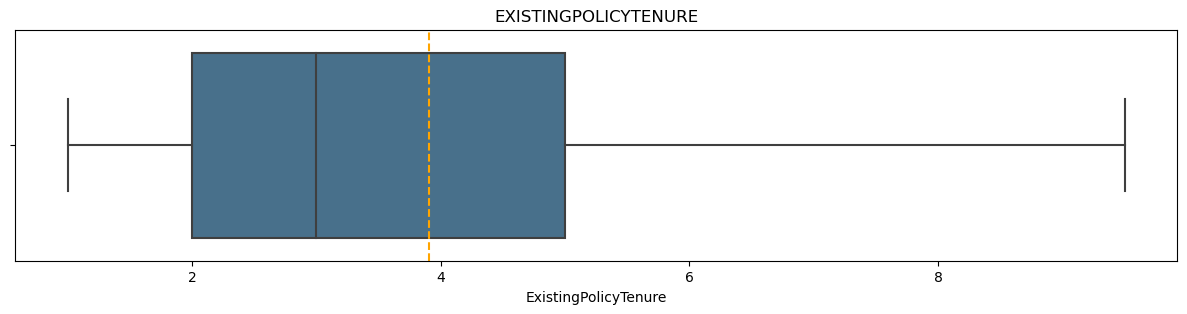

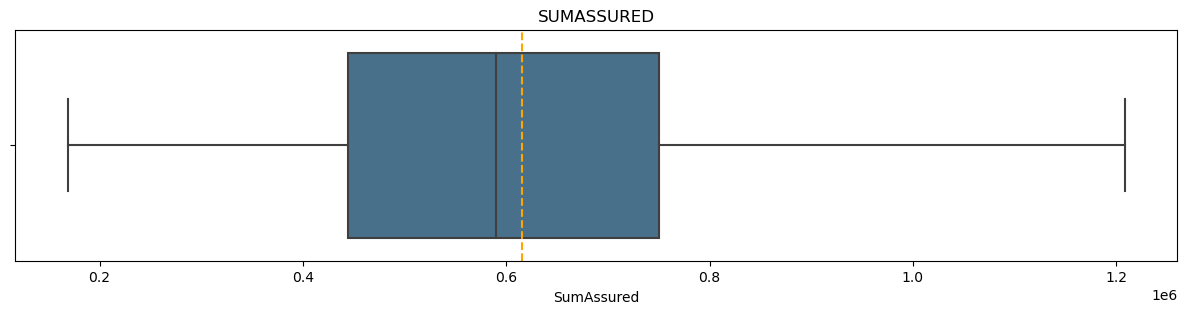

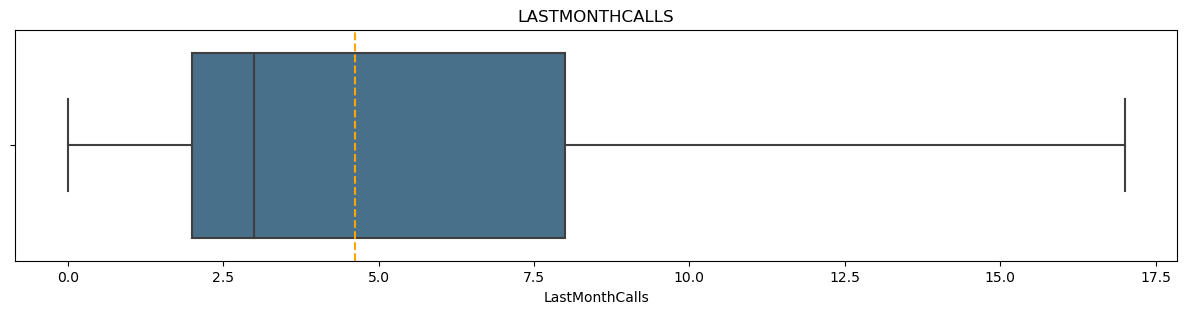

In [52]:
plot_box(df,num)

### Descriptive statistics

In [53]:
df.describe(include='all').T

count unique          top    freq      mean       std  \
AgentBonus           4520.00    NaN          NaN     NaN   4077.84   1403.32   
Age                  4520.00    NaN          NaN     NaN     14.37      8.37   
CustTenure           4520.00    NaN          NaN     NaN     14.34      8.33   
Channel                 4520      3        Agent    3194       NaN       NaN   
Occupation              4520      4     Salaried    2192       NaN       NaN   
EducationField          4520      3           UG    3698       NaN       NaN   
Gender                  4520      2         Male    2688       NaN       NaN   
ExistingProdType     4520.00   6.00         4.00 1916.00       NaN       NaN   
Designation             4520      5    Executive    1662       NaN       NaN   
NumberOfPolicy       4520.00    NaN          NaN     NaN      3.57      1.45   
MaritalStatus           4520      3      Married    2268       NaN       NaN   
MonthlyIncome        4520.00    NaN          NaN     NaN  22574.03   3948.15   
Complaint            4520.00   2.00         0.00 3222.00       NaN       NaN   
ExistingPolicyTenure 4520.00    NaN          NaN     NaN      3.91      2.68   
SumAssured           4520.00    NaN          NaN     NaN 615902.26 229255.42   
Zone                    4520      4         West    2566       NaN       NaN   
PaymentMethod           4520      4  Half Yearly    2656       NaN       NaN   
LastMonthCalls       4520.00    NaN          NaN     NaN      4.62      3.61   
CustCareScore        4520.00   5.00         3.00 1419.00       NaN       NaN   

                           min       25%       50%       75%        max  
AgentBonus             1605.00   3027.75   3911.50   4867.25    9608.00  
Age                       2.00      8.00     14.00     19.00      35.50  
CustTenure                2.00      8.00     14.00     19.00      35.50  
Channel                    NaN       NaN       NaN       NaN        NaN  
Occupation                 NaN       NaN       NaN       NaN        NaN  
EducationField             NaN       NaN       NaN       NaN        NaN  
Gender                     NaN       NaN       NaN       NaN        NaN  
ExistingProdType           NaN       NaN       NaN       NaN        NaN  
Designation                NaN       NaN       NaN       NaN        NaN  
NumberOfPolicy            1.00      2.00      4.00      5.00       6.00  
MaritalStatus              NaN       NaN       NaN       NaN        NaN  
MonthlyIncome         16009.00  19858.00  21877.00  24531.75   31542.38  
Complaint                  NaN       NaN       NaN       NaN        NaN  
ExistingPolicyTenure      1.00      2.00      3.00      5.00       9.50  
SumAssured           168536.00 444476.25 590012.50 750010.50 1208311.88  
Zone                       NaN       NaN       NaN       NaN        NaN  
PaymentMethod              NaN       NaN       NaN       NaN        NaN  
LastMonthCalls            0.00      2.00      3.00      8.00      17.00  
CustCareScore              NaN       NaN       NaN       NaN        NaN

In [54]:
df[df['Age']<df['CustTenure']][['Age','CustTenure']]

Age  CustTenure
3    11.00       14.47
4     6.00       14.47
5     7.00       14.47
6    12.00       23.00
8     8.00       11.00
...    ...         ...
4500  8.00       23.00
4502 21.00       27.00
4504  8.00       20.00
4511  3.00       20.00
4515  4.00        8.00

[1918 rows x 2 columns]

Text(0.5, 1.0, 'BoxPlot for Age by EducationField')

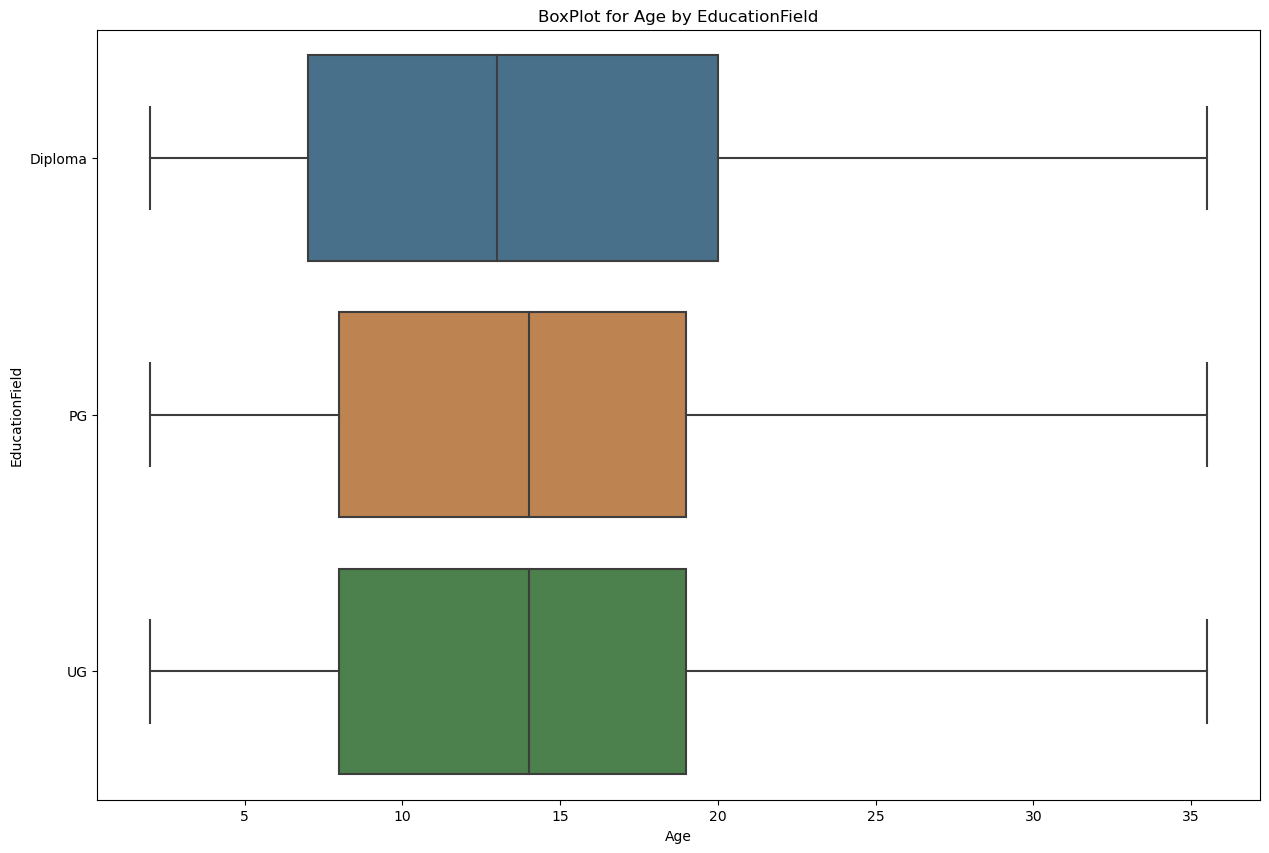

In [55]:
fig,axes = plt.subplots(figsize = (15,10))
sns.boxplot(data = df,x="Age",y="EducationField",saturation = 0.45)
plt.title("BoxPlot for Age by EducationField")

Text(0.5, 1.0, 'BoxPlot for Age by Designation')

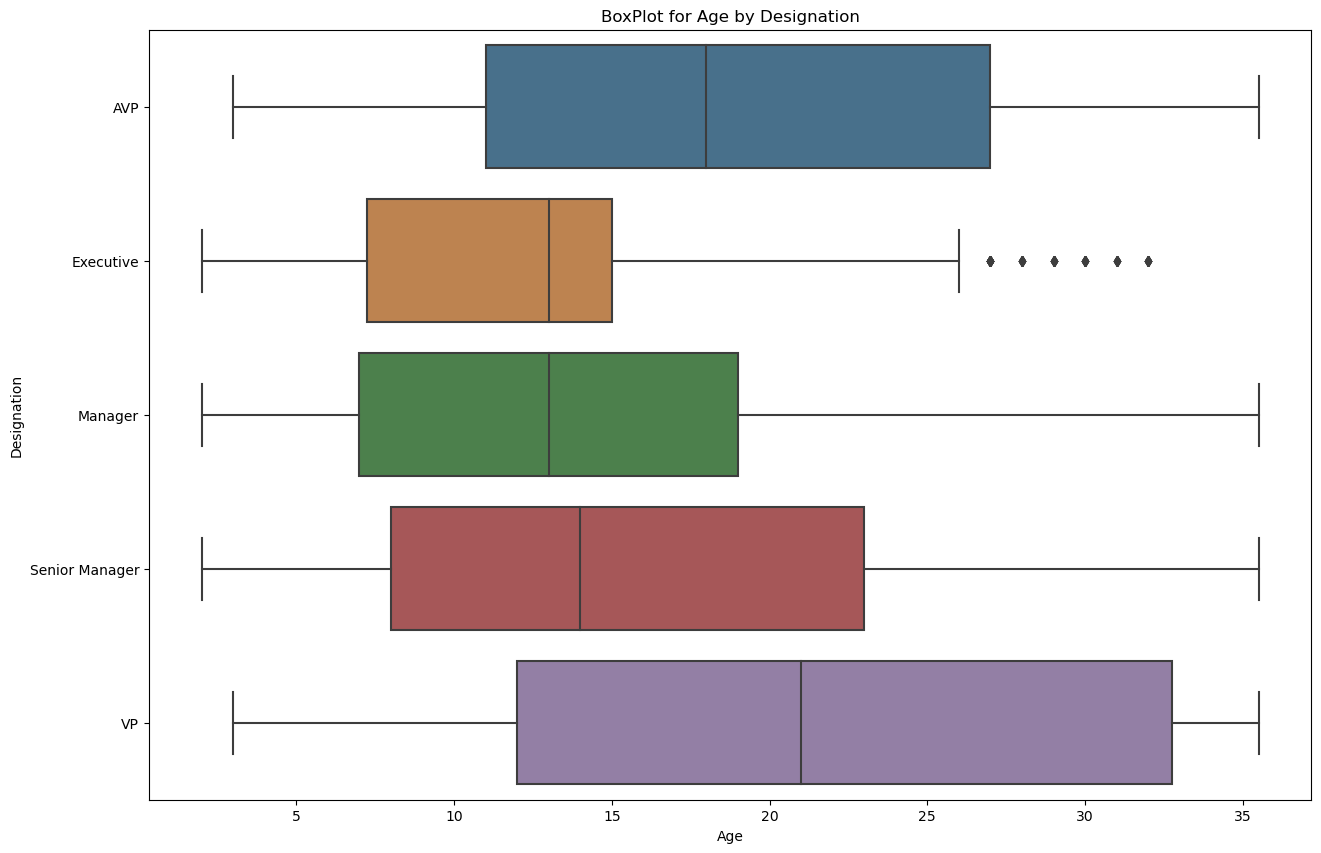

In [56]:
fig,axes = plt.subplots(figsize = (15,10))
sns.boxplot(data = df,x="Age",y="Designation",saturation = 0.45)
plt.title("BoxPlot for Age by Designation")

In [57]:
(len(df[df['Age']<df['CustTenure']])/len(df))*100

42.43362831858407

In [58]:
df.drop('Age',axis=1,inplace=True)

In [59]:
df.describe(include='all').T

count unique          top    freq      mean       std  \
AgentBonus           4520.00    NaN          NaN     NaN   4077.84   1403.32   
CustTenure           4520.00    NaN          NaN     NaN     14.34      8.33   
Channel                 4520      3        Agent    3194       NaN       NaN   
Occupation              4520      4     Salaried    2192       NaN       NaN   
EducationField          4520      3           UG    3698       NaN       NaN   
Gender                  4520      2         Male    2688       NaN       NaN   
ExistingProdType     4520.00   6.00         4.00 1916.00       NaN       NaN   
Designation             4520      5    Executive    1662       NaN       NaN   
NumberOfPolicy       4520.00    NaN          NaN     NaN      3.57      1.45   
MaritalStatus           4520      3      Married    2268       NaN       NaN   
MonthlyIncome        4520.00    NaN          NaN     NaN  22574.03   3948.15   
Complaint            4520.00   2.00         0.00 3222.00       NaN       NaN   
ExistingPolicyTenure 4520.00    NaN          NaN     NaN      3.91      2.68   
SumAssured           4520.00    NaN          NaN     NaN 615902.26 229255.42   
Zone                    4520      4         West    2566       NaN       NaN   
PaymentMethod           4520      4  Half Yearly    2656       NaN       NaN   
LastMonthCalls       4520.00    NaN          NaN     NaN      4.62      3.61   
CustCareScore        4520.00   5.00         3.00 1419.00       NaN       NaN   

                           min       25%       50%       75%        max  
AgentBonus             1605.00   3027.75   3911.50   4867.25    9608.00  
CustTenure                2.00      8.00     14.00     19.00      35.50  
Channel                    NaN       NaN       NaN       NaN        NaN  
Occupation                 NaN       NaN       NaN       NaN        NaN  
EducationField             NaN       NaN       NaN       NaN        NaN  
Gender                     NaN       NaN       NaN       NaN        NaN  
ExistingProdType           NaN       NaN       NaN       NaN        NaN  
Designation                NaN       NaN       NaN       NaN        NaN  
NumberOfPolicy            1.00      2.00      4.00      5.00       6.00  
MaritalStatus              NaN       NaN       NaN       NaN        NaN  
MonthlyIncome         16009.00  19858.00  21877.00  24531.75   31542.38  
Complaint                  NaN       NaN       NaN       NaN        NaN  
ExistingPolicyTenure      1.00      2.00      3.00      5.00       9.50  
SumAssured           168536.00 444476.25 590012.50 750010.50 1208311.88  
Zone                       NaN       NaN       NaN       NaN        NaN  
PaymentMethod              NaN       NaN       NaN       NaN        NaN  
LastMonthCalls            0.00      2.00      3.00      8.00      17.00  
CustCareScore              NaN       NaN       NaN       NaN        NaN

### Histogram

In [60]:
num = list(df.dtypes[df.dtypes != 'category'].index)
num

['AgentBonus',
 'CustTenure',
 'NumberOfPolicy',
 'MonthlyIncome',
 'ExistingPolicyTenure',
 'SumAssured',
 'LastMonthCalls']

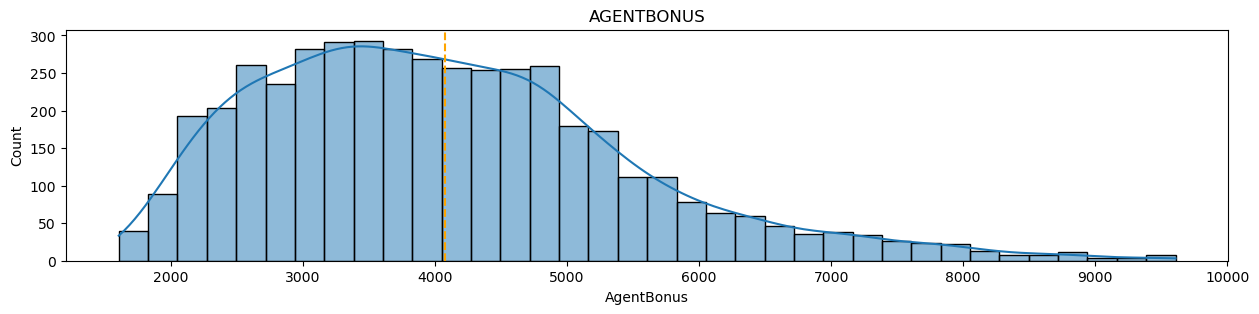

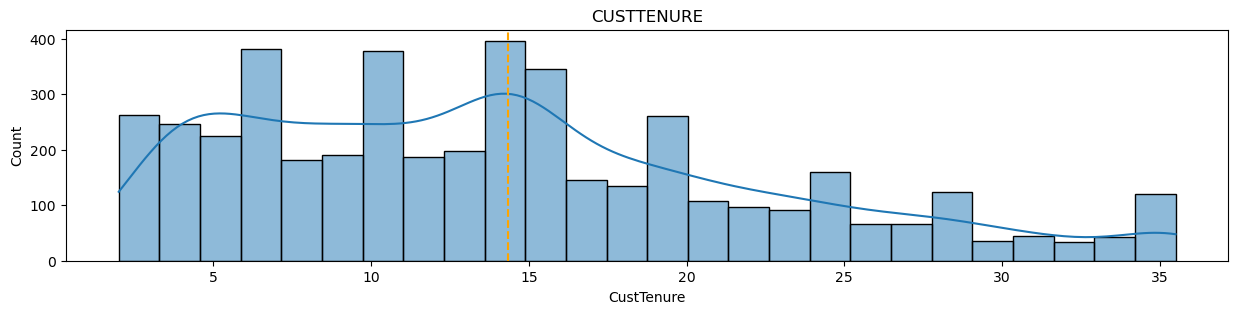

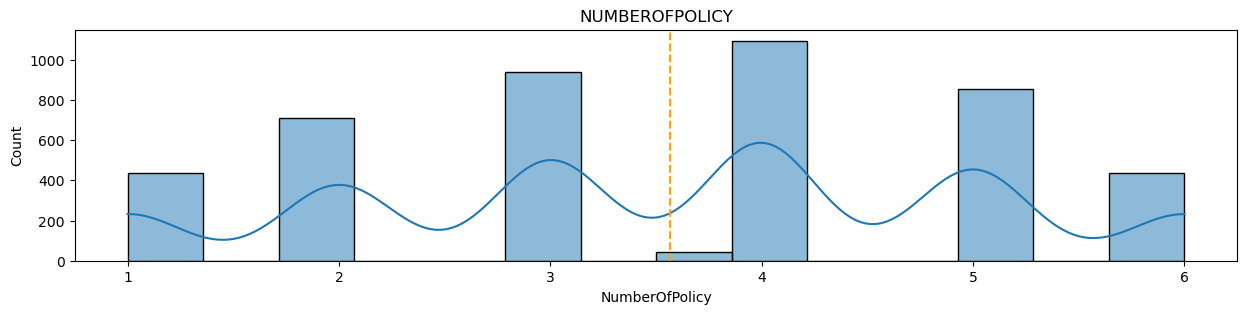

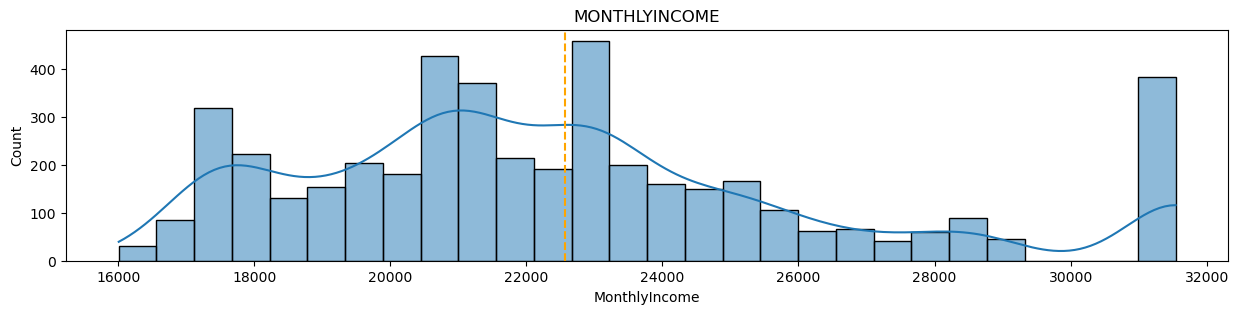

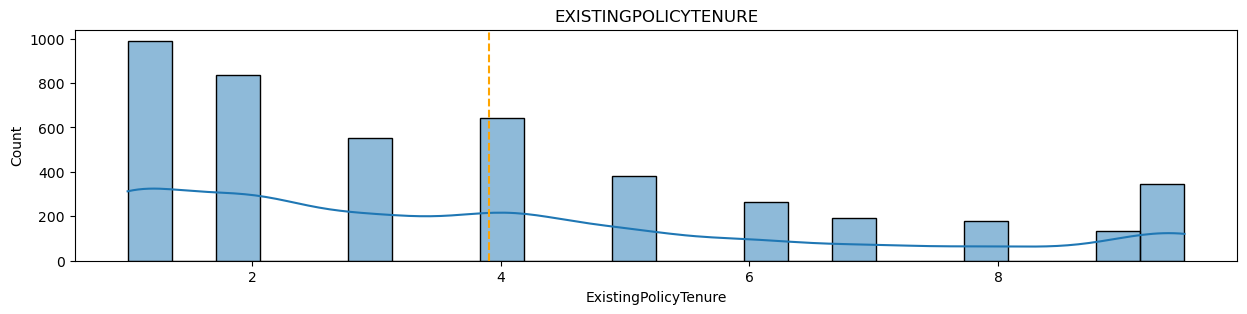

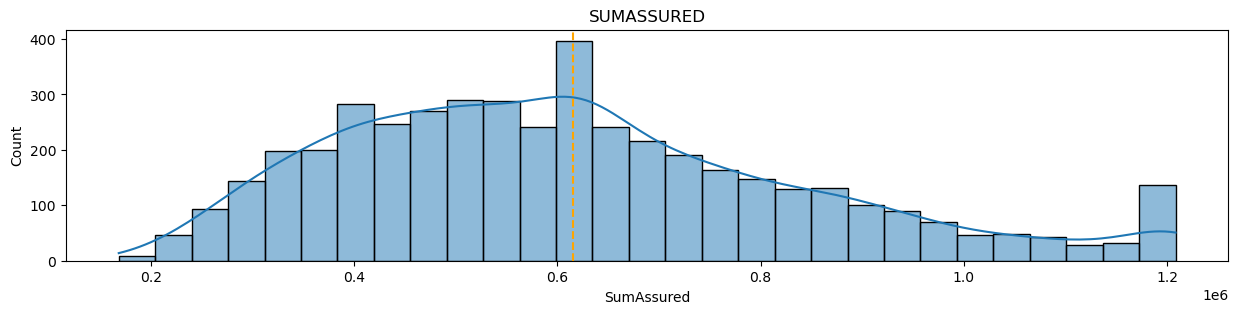

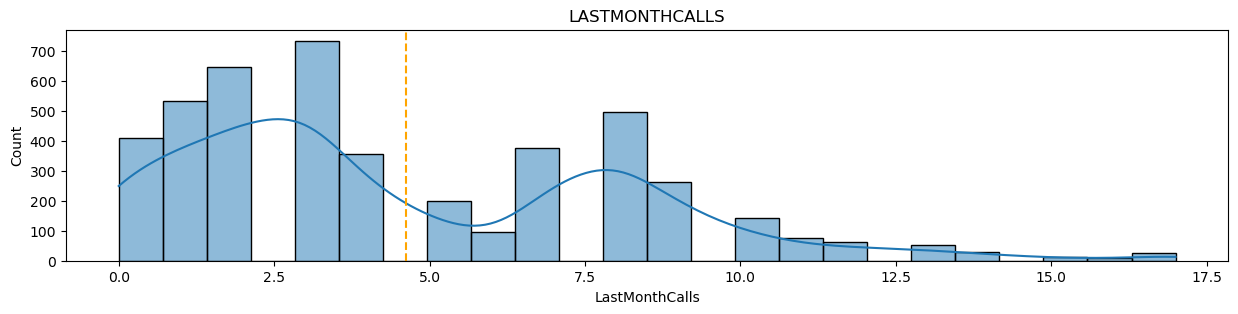

In [61]:
def plot_hist(df,num):
    for i in num:
        fig,axes = plt.subplots(figsize = (15,3))
        sns.histplot(data = df,x = i,kde=True)
        axes.set_title(i.upper())
        axes.axvline(x = df[i].mean(),color = 'orange',linestyle = '--')
plot_hist(df,num)

In [62]:
cat

['Channel',
 'Occupation',
 'EducationField',
 'Gender',
 'ExistingProdType',
 'Designation',
 'MaritalStatus',
 'Complaint',
 'Zone',
 'PaymentMethod',
 'CustCareScore']

### Boxplot - Bivariate

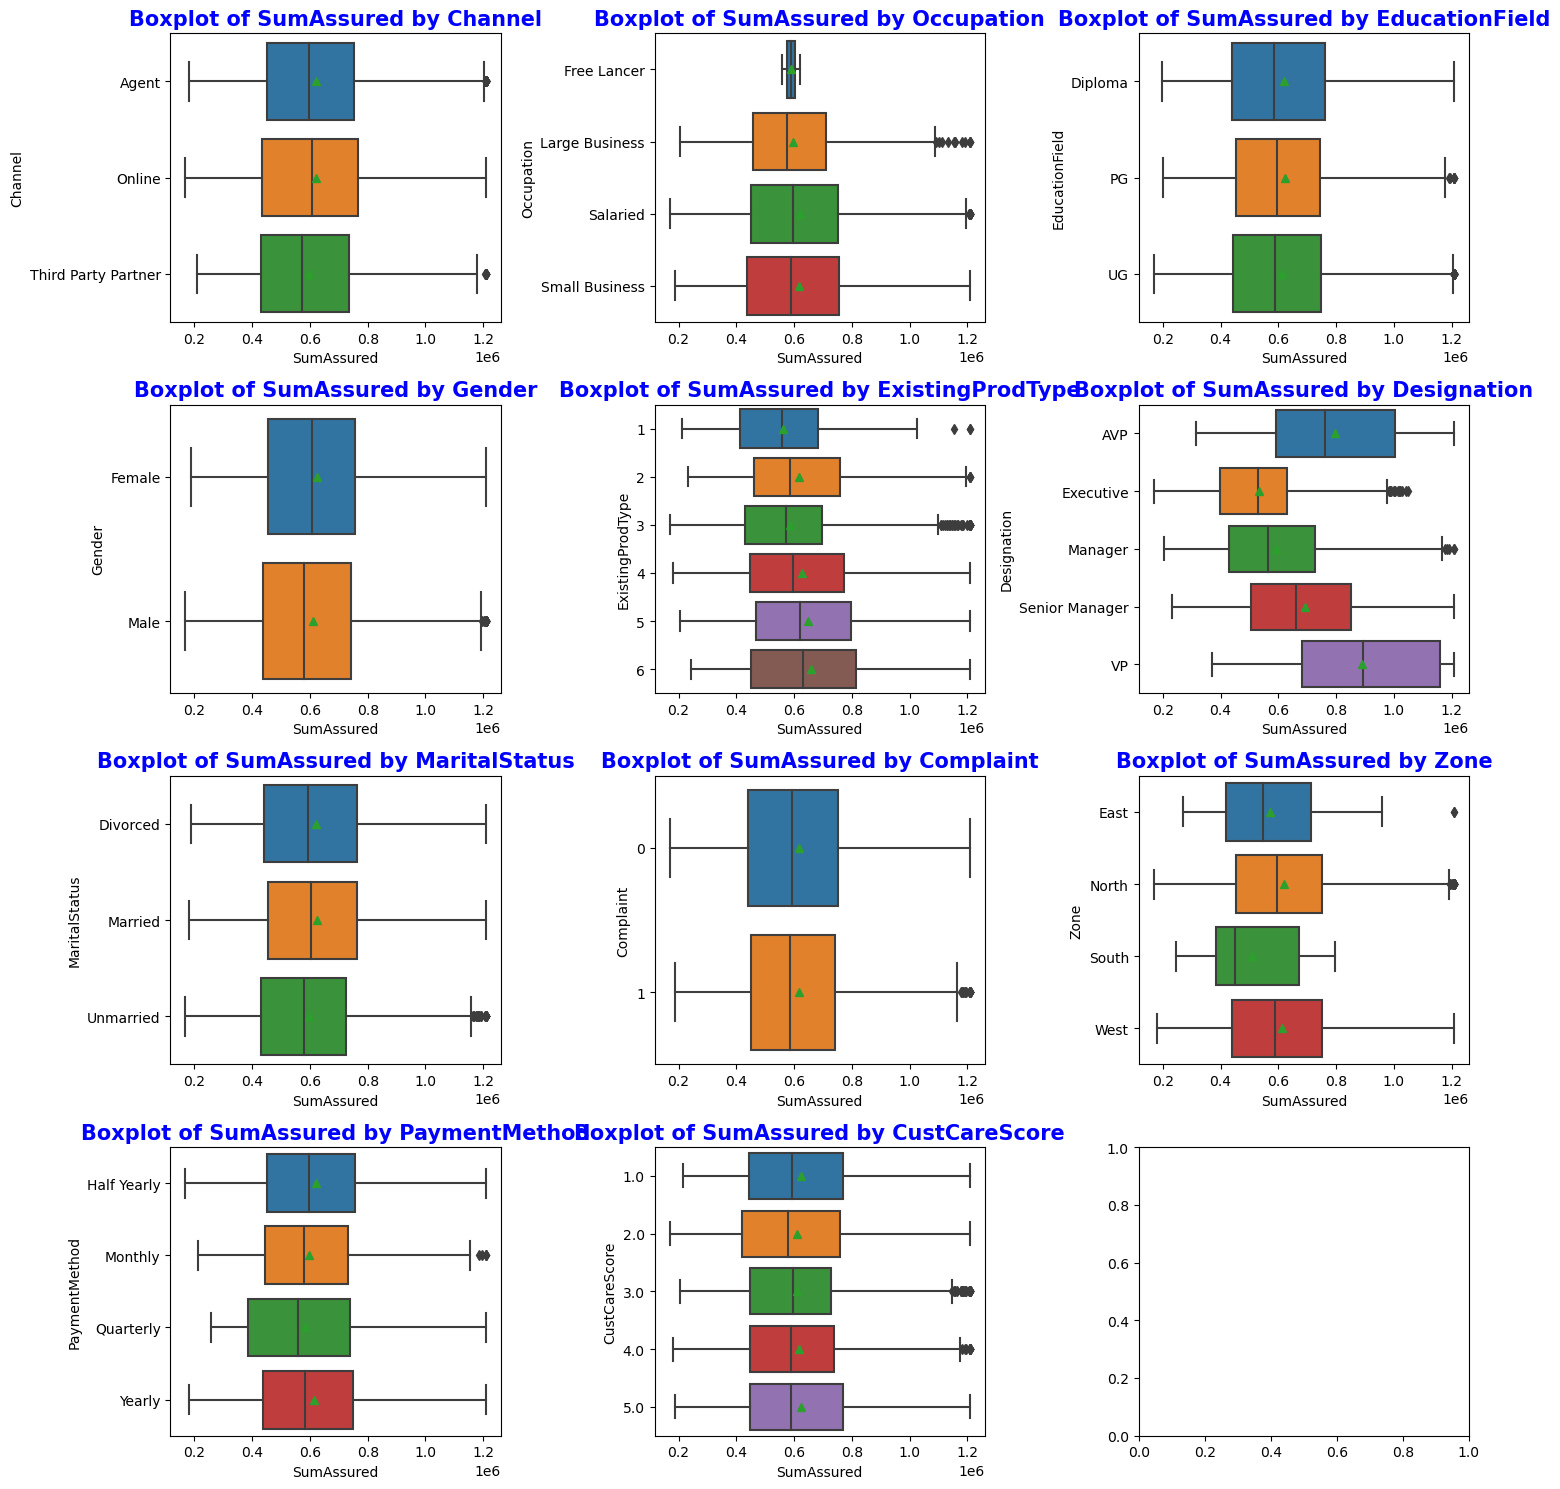

In [63]:
fig,axes = plt.subplots(4,3,figsize=(15,15))
for i,ax in zip(cat,axes.flatten()):
    sns.boxplot(data = df,x="SumAssured",y=i,ax=ax,showmeans=True)
    ax.set_title(f"Boxplot of SumAssured by {i}",fontsize=15,weight='bold',color="Blue")
    plt.tight_layout()

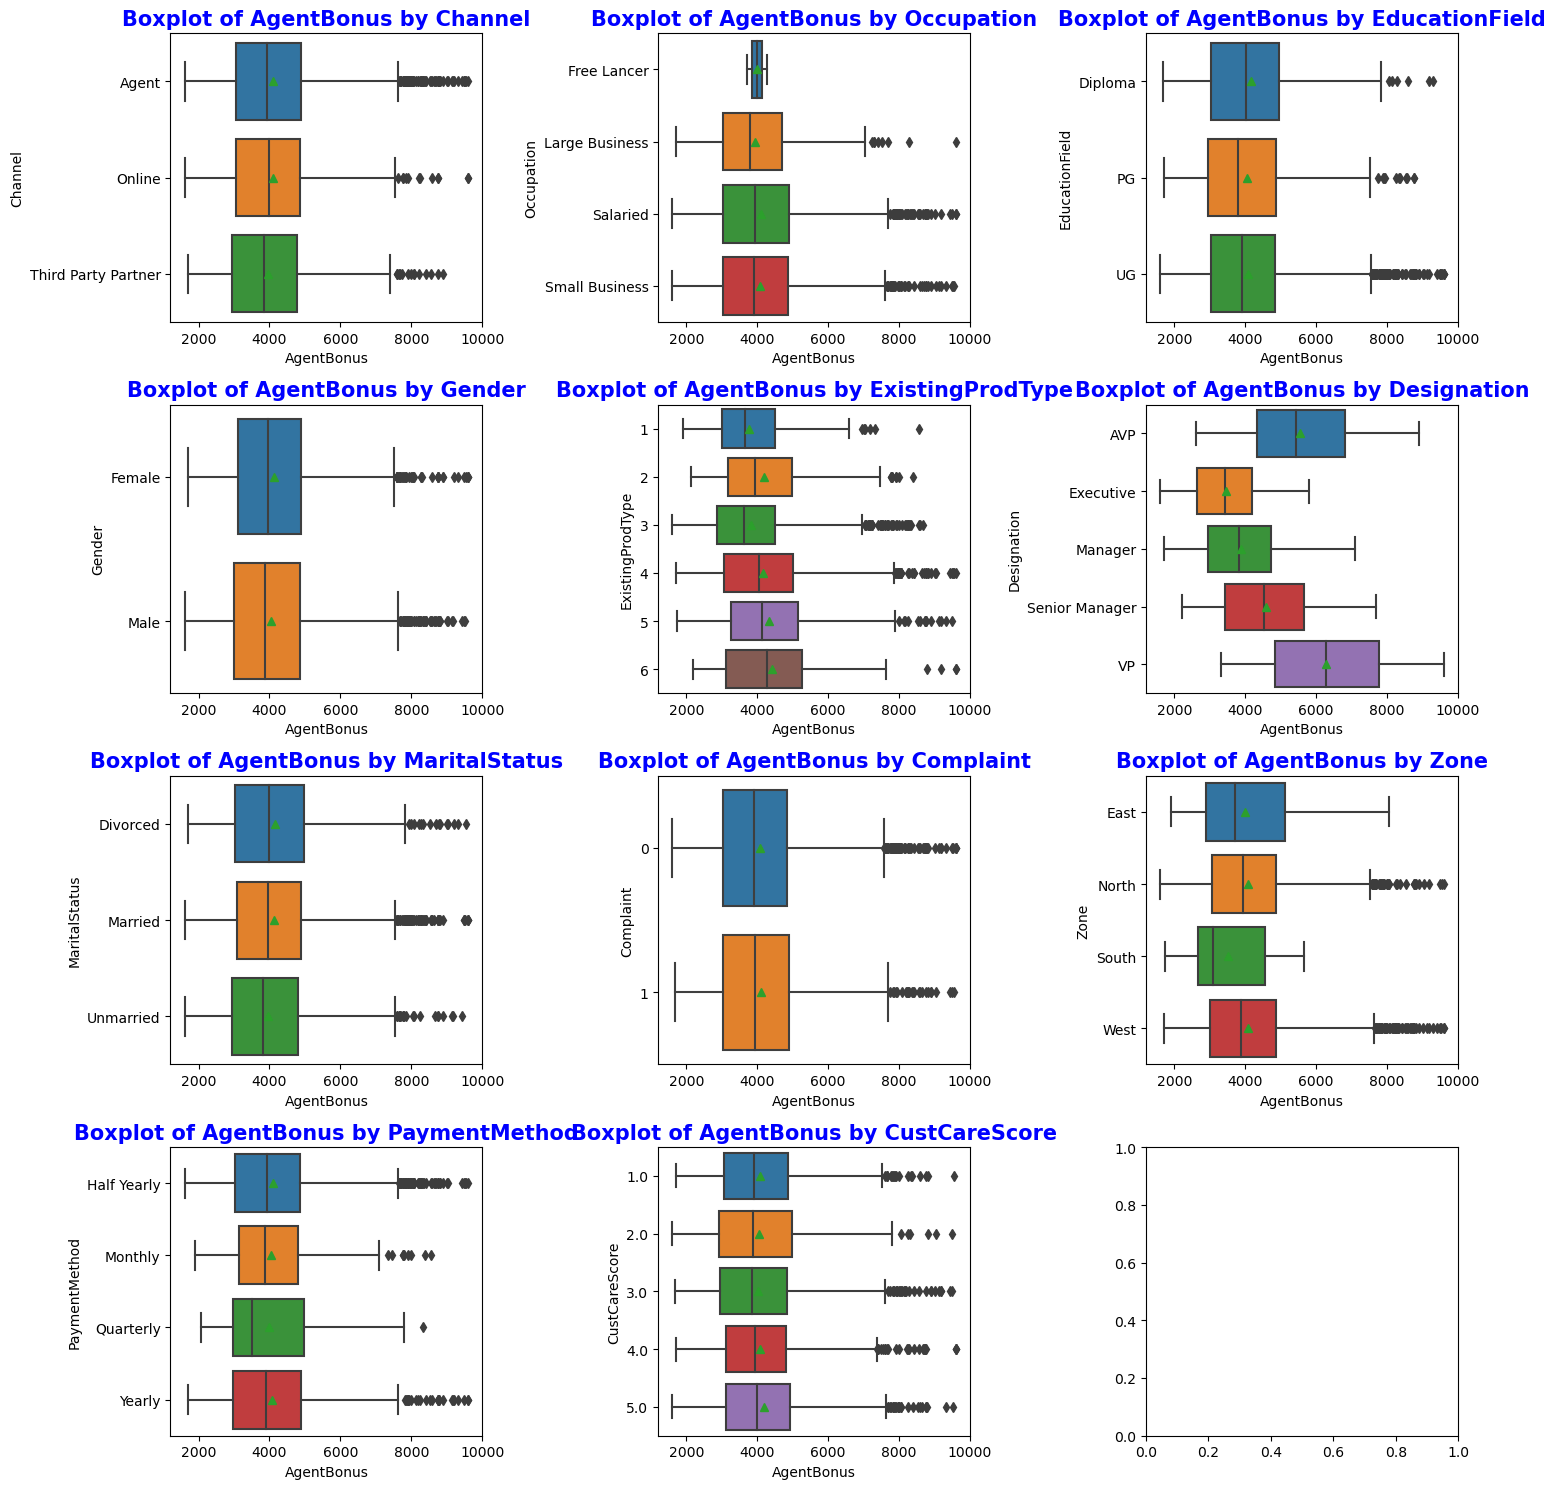

In [64]:
fig,axes = plt.subplots(4,3,figsize=(15,15))
for i,ax in zip(cat,axes.flatten()):
    sns.boxplot(data = df,x="AgentBonus",y=i,ax=ax,showmeans=True)
    ax.set_title(f"Boxplot of AgentBonus by {i}",fontsize=15,weight='bold',color="Blue")
    plt.tight_layout()

### Correlation Plot

Text(0.5, 1.0, 'Correlation Plot')

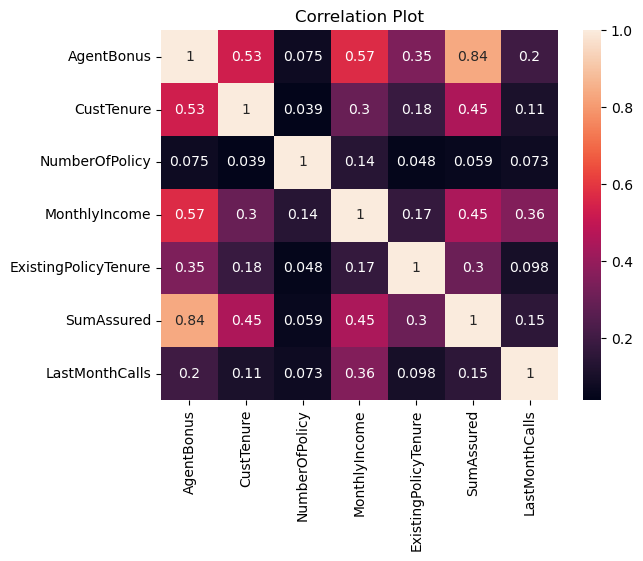

In [65]:
sns.heatmap(df.corr(),annot=True);
plt.title("Correlation Plot")

### Scatter Plot

----------------------------------------------------------------------------


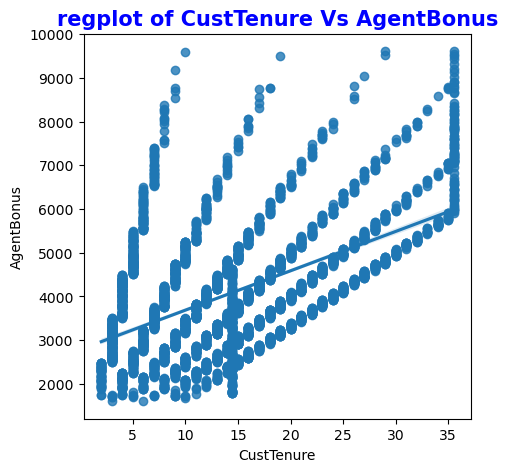

----------------------------------------------------------------------------


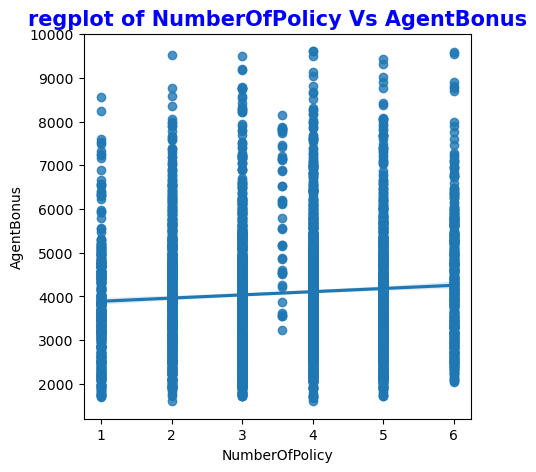

----------------------------------------------------------------------------


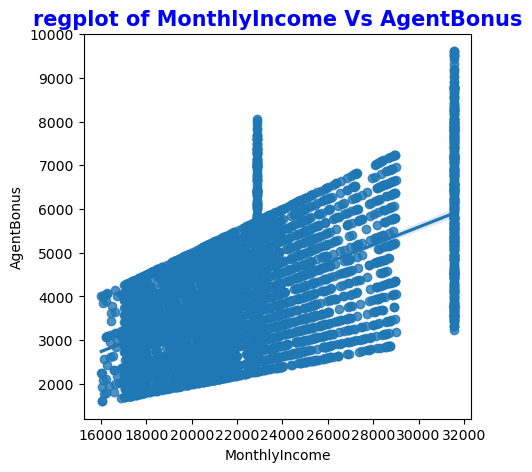

----------------------------------------------------------------------------


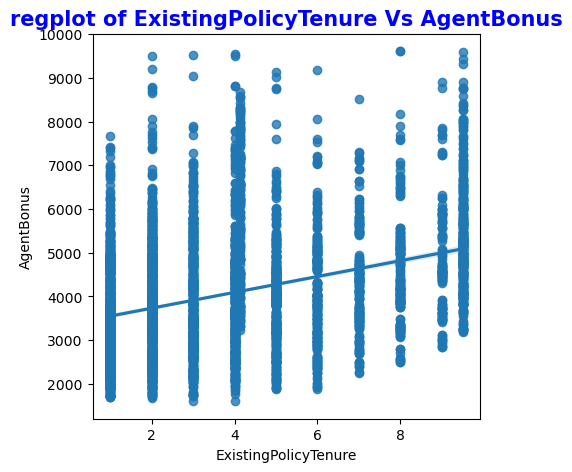

----------------------------------------------------------------------------


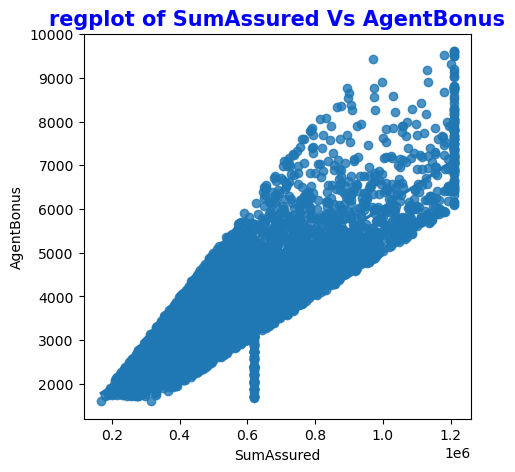

----------------------------------------------------------------------------


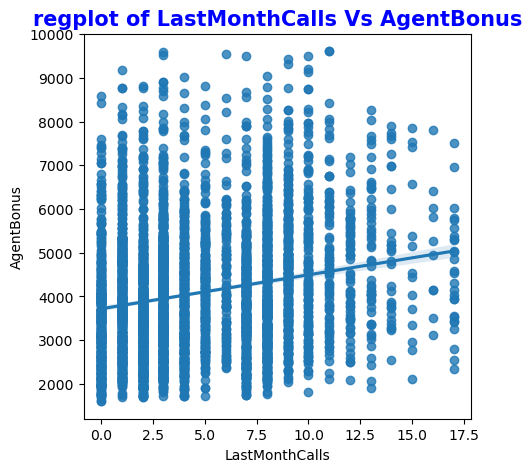

In [66]:
def regplot(column):
    plt.figure(figsize=(5,5))
    print("----------------------------------------------------------------------------")
    ax = sns.regplot(y='AgentBonus',x=i,data=df)
    plt.title(f"regplot of {column} Vs AgentBonus",fontsize=15,weight='bold',color="Blue")
    plt.show()
    
for i in list(num[1:]):
    regplot(i)

----------------------------------------------------------------------------


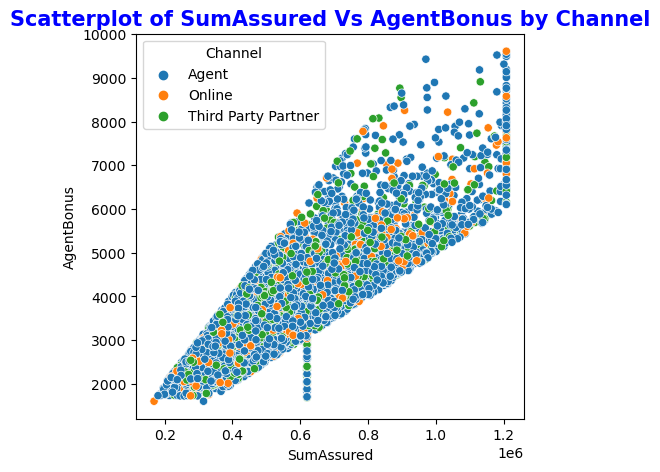

----------------------------------------------------------------------------


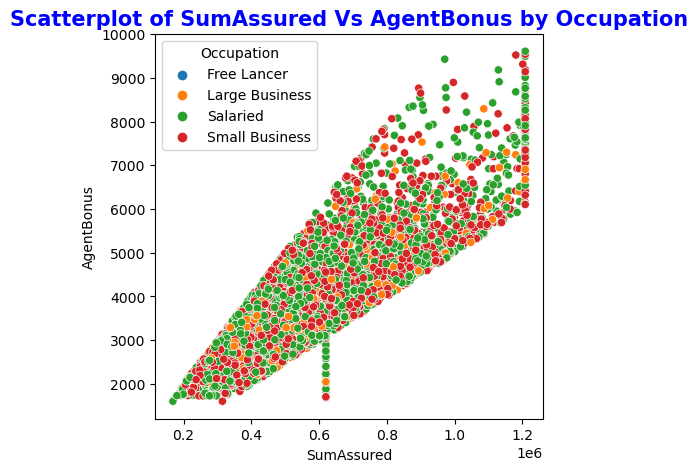

----------------------------------------------------------------------------


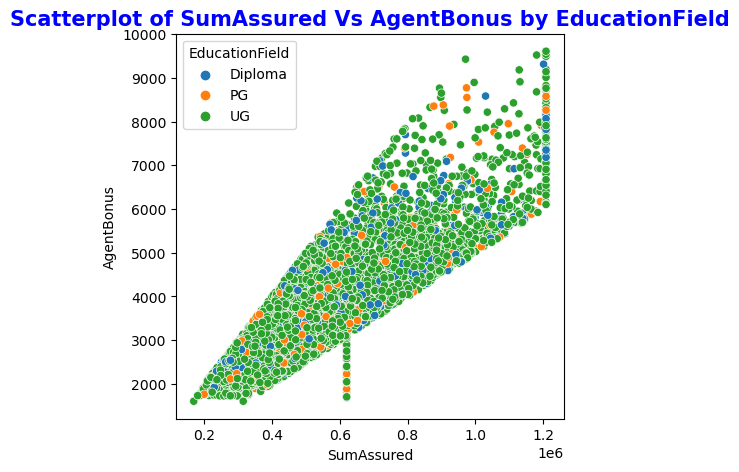

----------------------------------------------------------------------------


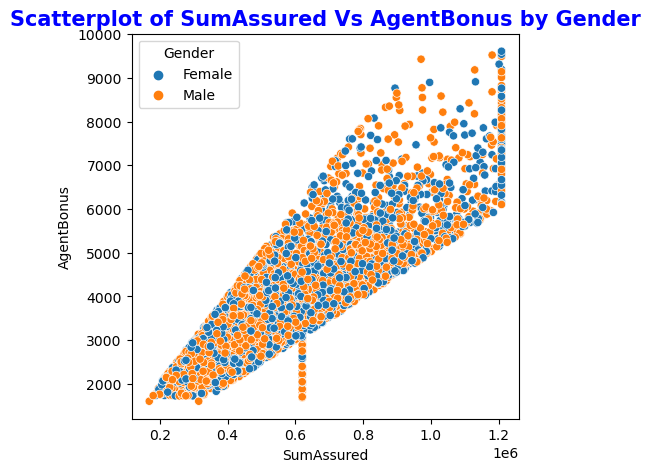

----------------------------------------------------------------------------


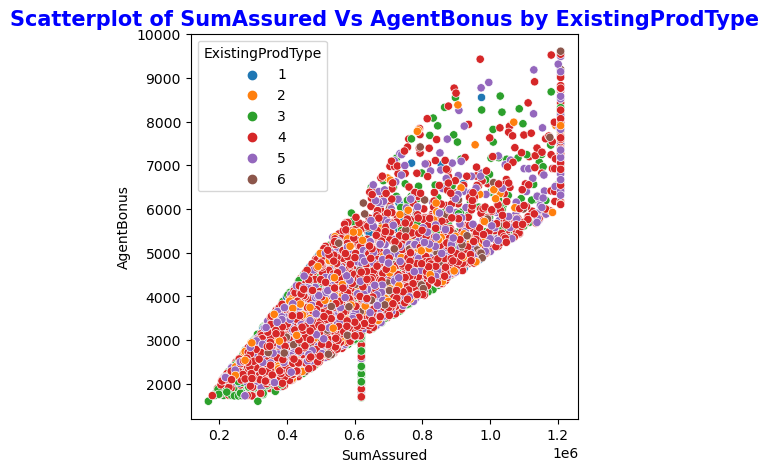

----------------------------------------------------------------------------


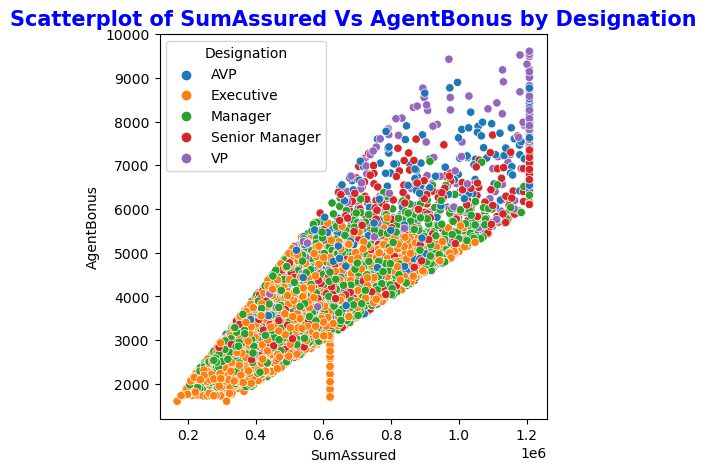

----------------------------------------------------------------------------


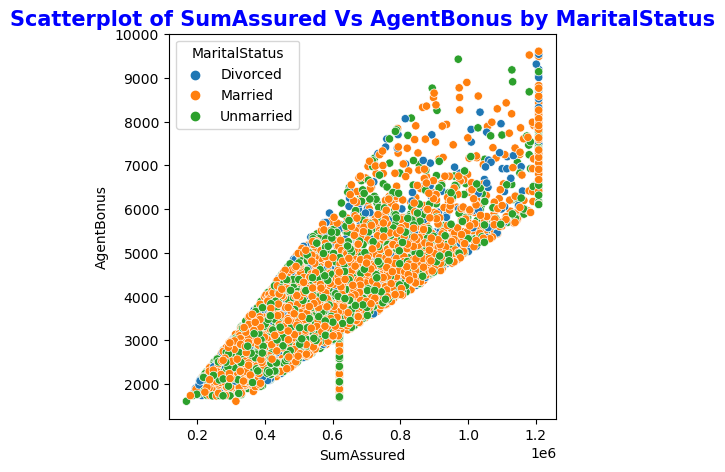

----------------------------------------------------------------------------


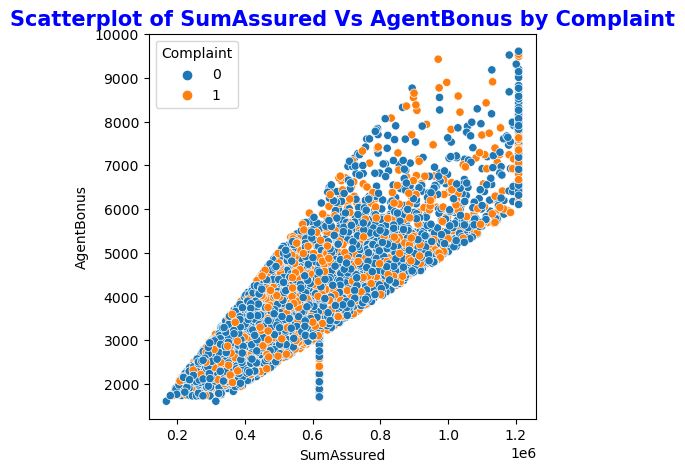

----------------------------------------------------------------------------


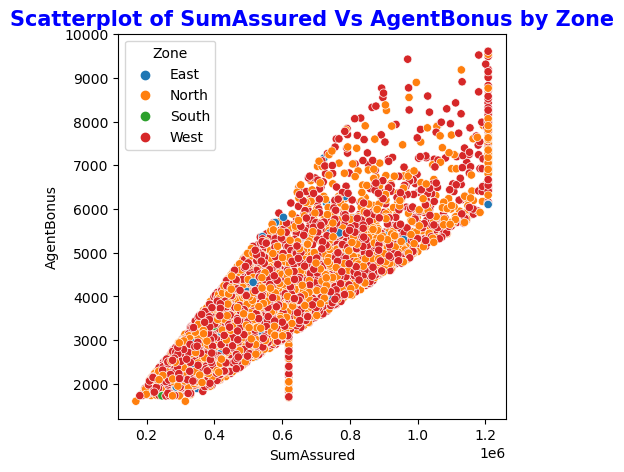

----------------------------------------------------------------------------


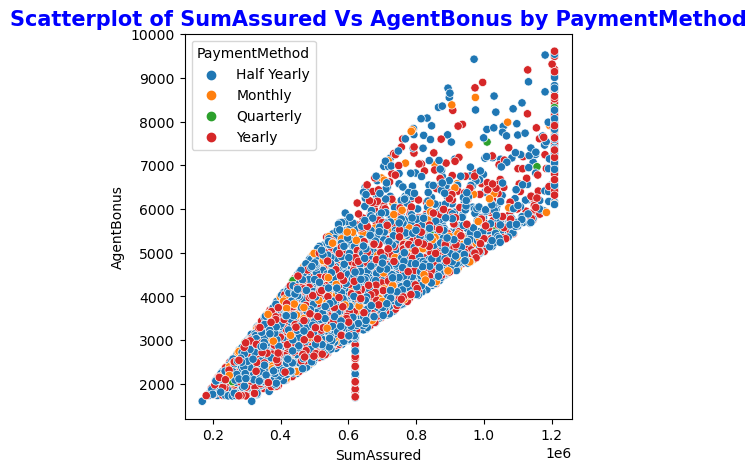

----------------------------------------------------------------------------


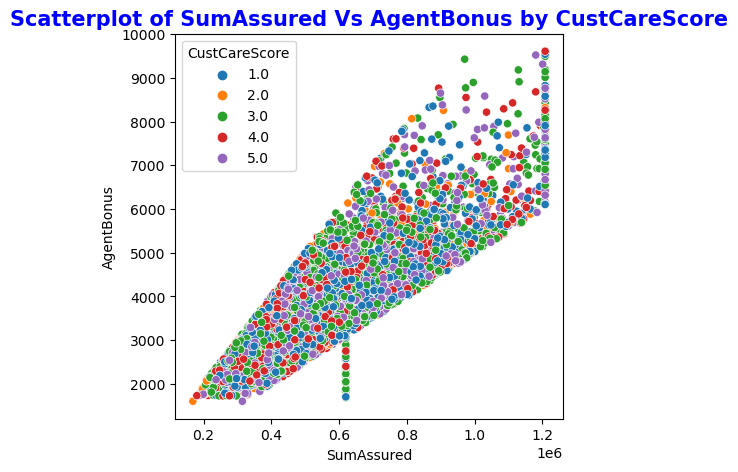

In [67]:
def multivariateAnalysis_numeric(column):
    plt.figure(figsize=(5,5))
    print("----------------------------------------------------------------------------")
    ax = sns.scatterplot(x="SumAssured",y="AgentBonus",data=df,hue=column)
    plt.title(f"Scatterplot of SumAssured Vs AgentBonus by {column}",fontsize=15,weight='bold',color="Blue")
    plt.show()
    
for i in list(cat):
    multivariateAnalysis_numeric(i)

### Pairplot

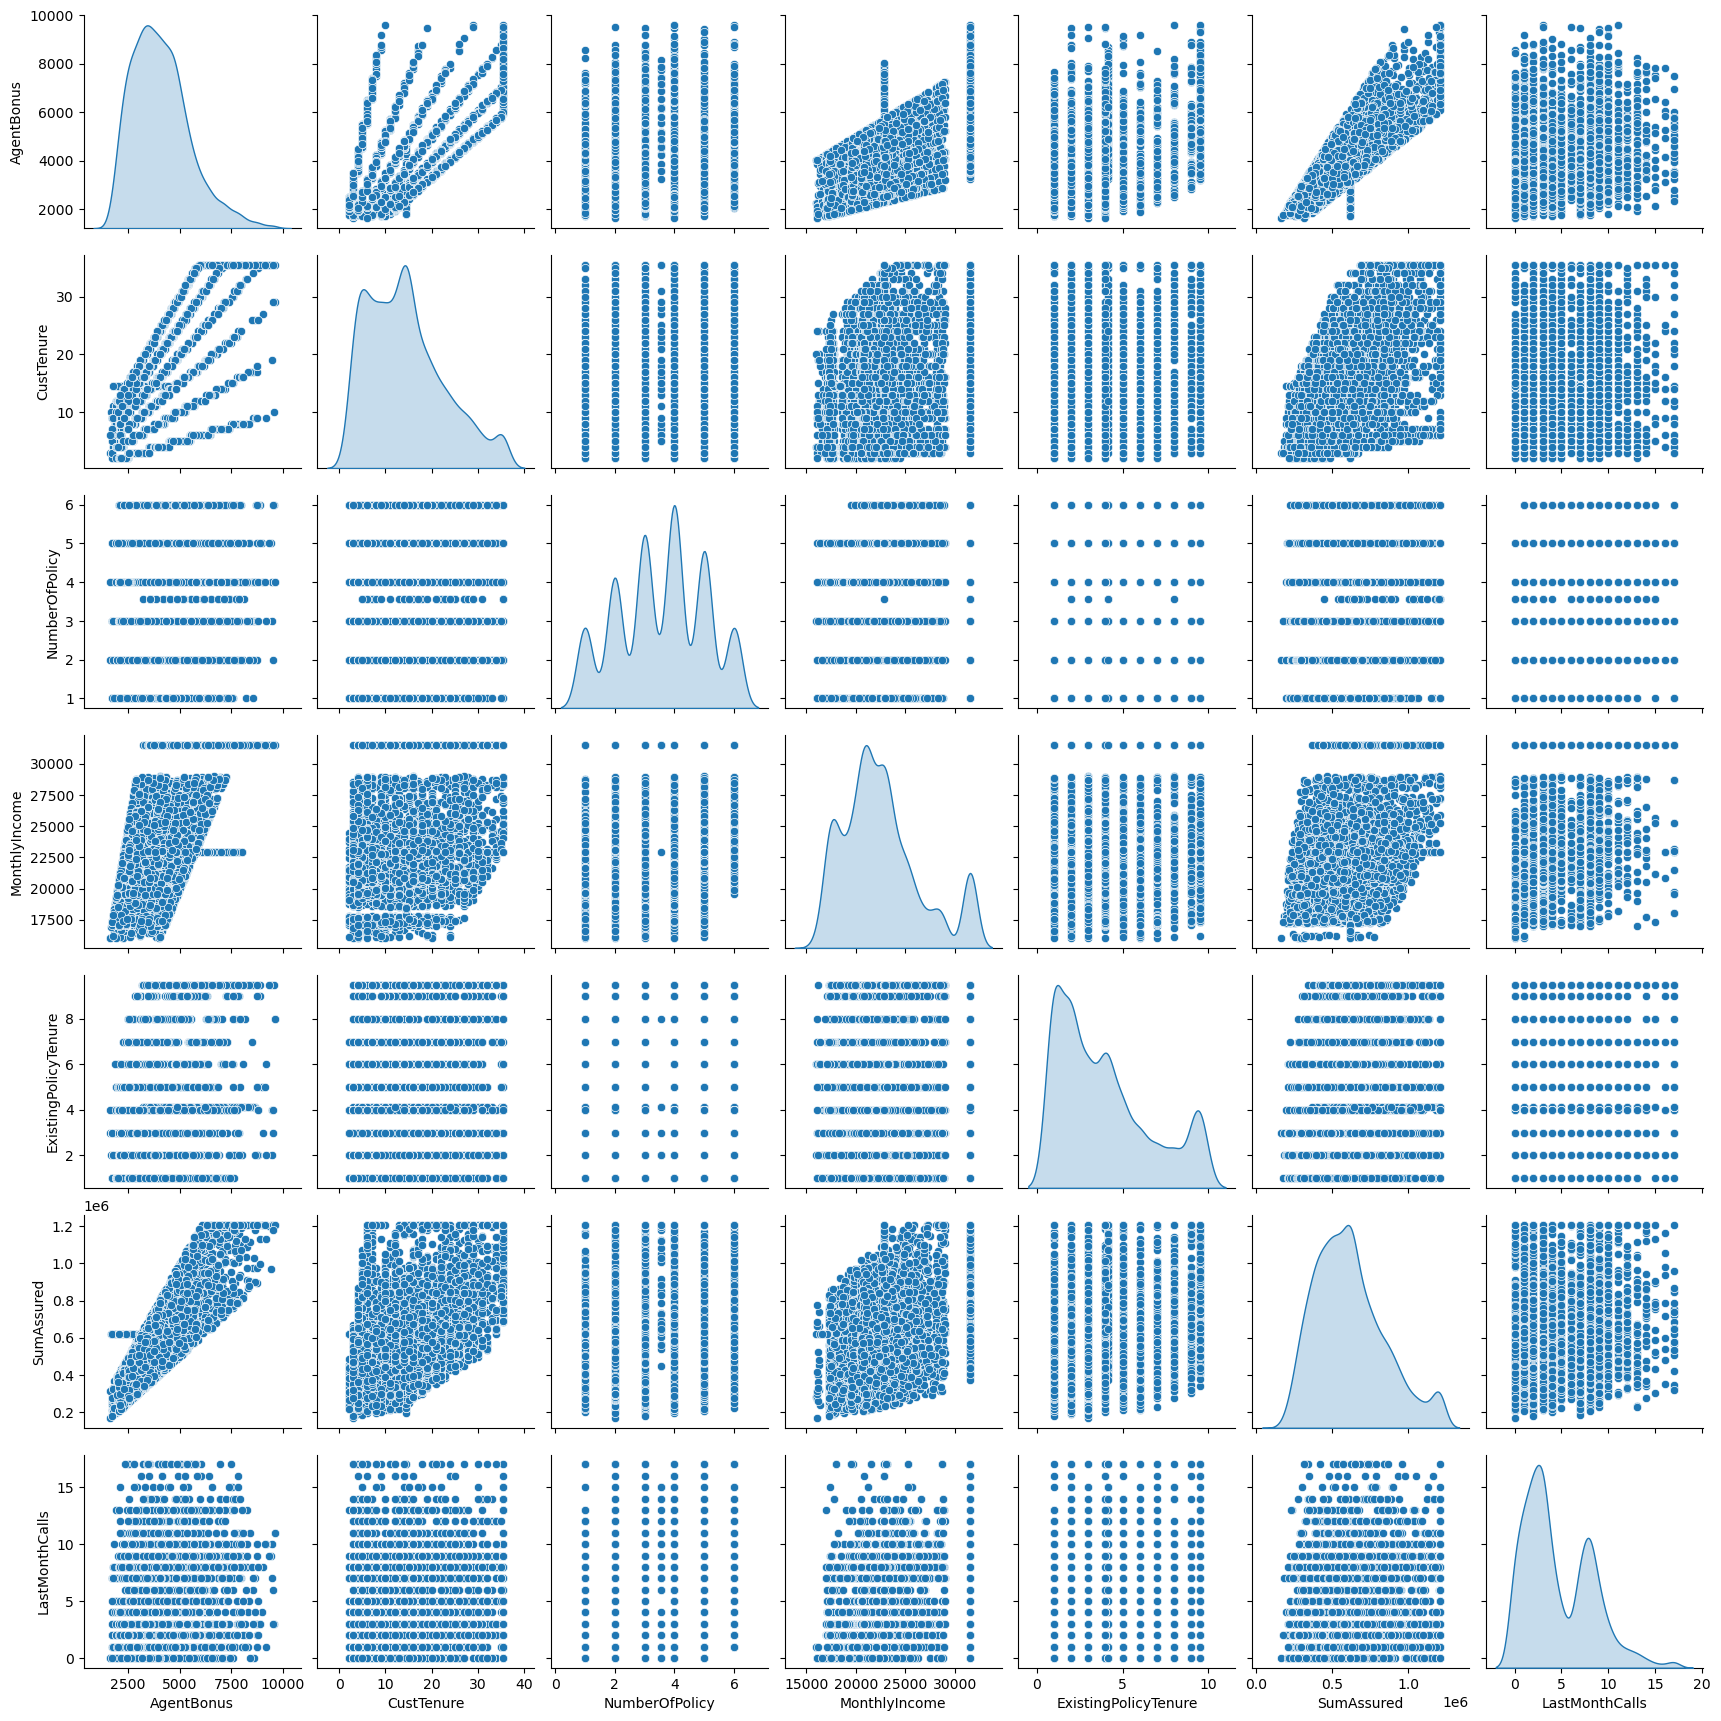

In [68]:
sns.pairplot(df,diag_kind="kde");

### Countplot - Bivariate

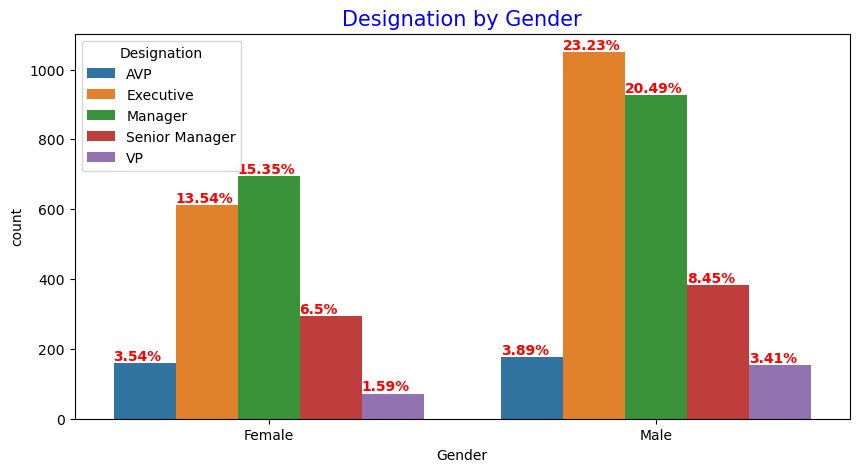

In [69]:
fig,axes = plt.subplots(figsize=(10,5))
sns.countplot(df,x="Gender",hue="Designation")
axes.set_title("Designation by Gender",fontsize=15,color="Blue")
for p in axes.patches:
        axes.annotate(text = f"{round(p.get_height()/len(df)*100,2)}%",xy = (p.get_x(),p.get_height()+8),fontsize=10,weight='bold',color="Red")

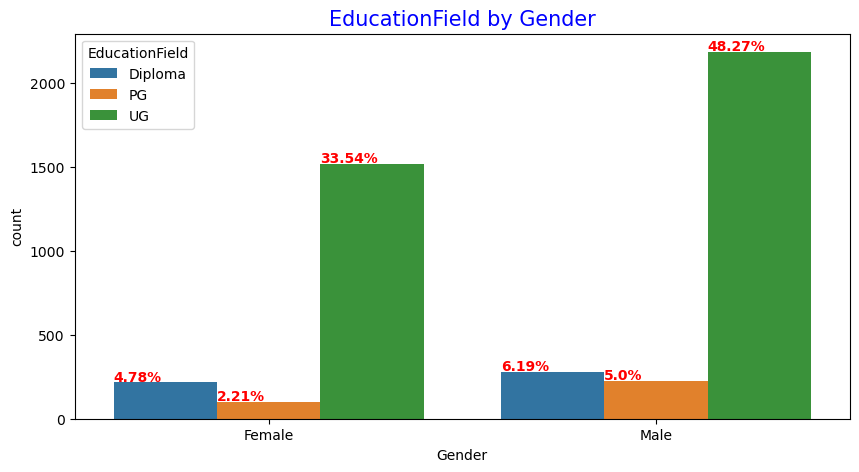

In [70]:
fig,axes = plt.subplots(figsize=(10,5))
sns.countplot(df,x="Gender",hue="EducationField")
axes.set_title("EducationField by Gender",fontsize=15,color="Blue")
for p in axes.patches:
        axes.annotate(text = f"{round(p.get_height()/len(df)*100,2)}%",xy = (p.get_x(),p.get_height()+8),fontsize=10,weight='bold',color="Red")

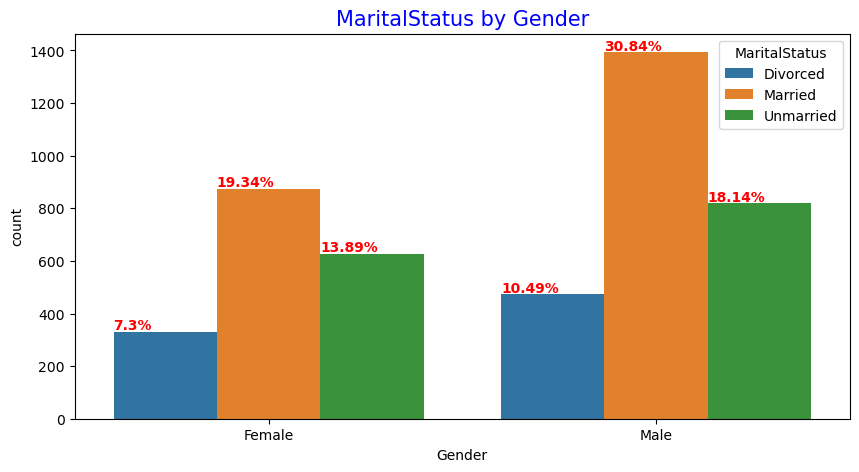

In [71]:
fig,axes = plt.subplots(figsize=(10,5))
sns.countplot(df,x="Gender",hue="MaritalStatus")
axes.set_title("MaritalStatus by Gender",fontsize=15,color="Blue")
for p in axes.patches:
        axes.annotate(text = f"{round(p.get_height()/len(df)*100,2)}%",xy = (p.get_x(),p.get_height()+8),fontsize=10,weight='bold',color="Red")

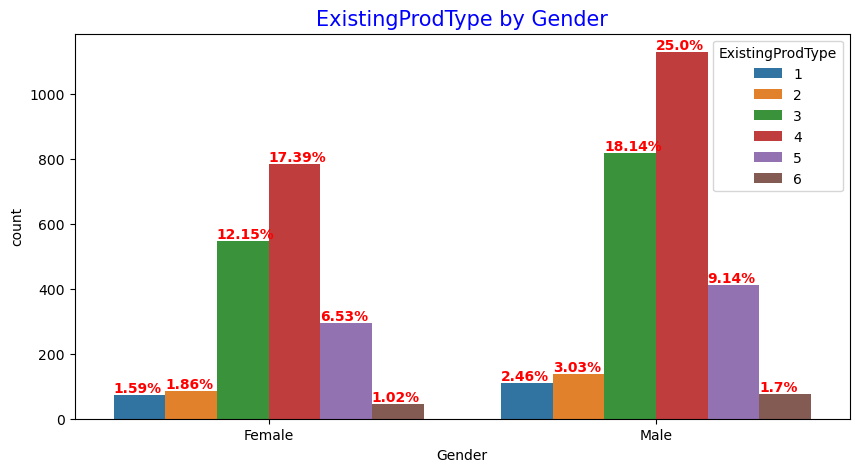

In [72]:
fig,axes = plt.subplots(figsize=(10,5))
sns.countplot(df,x="Gender",hue="ExistingProdType")
axes.set_title("ExistingProdType by Gender",fontsize=15,color="Blue")
for p in axes.patches:
        axes.annotate(text = f"{round(p.get_height()/len(df)*100,2)}%",xy = (p.get_x(),p.get_height()+8),fontsize=10,weight='bold',color="Red")

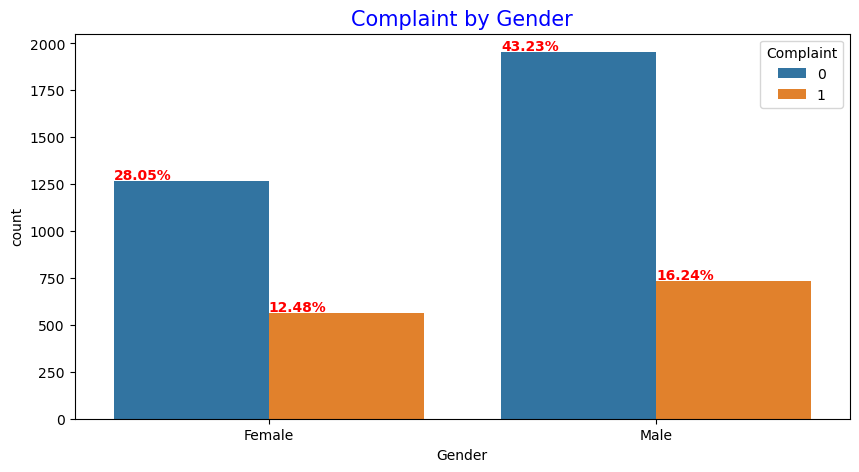

In [73]:
fig,axes = plt.subplots(figsize=(10,5))
sns.countplot(df,x="Gender",hue="Complaint")
axes.set_title("Complaint by Gender",fontsize=15,color="Blue")
for p in axes.patches:
        axes.annotate(text = f"{round(p.get_height()/len(df)*100,2)}%",xy = (p.get_x(),p.get_height()+8),fontsize=10,weight='bold',color="Red")

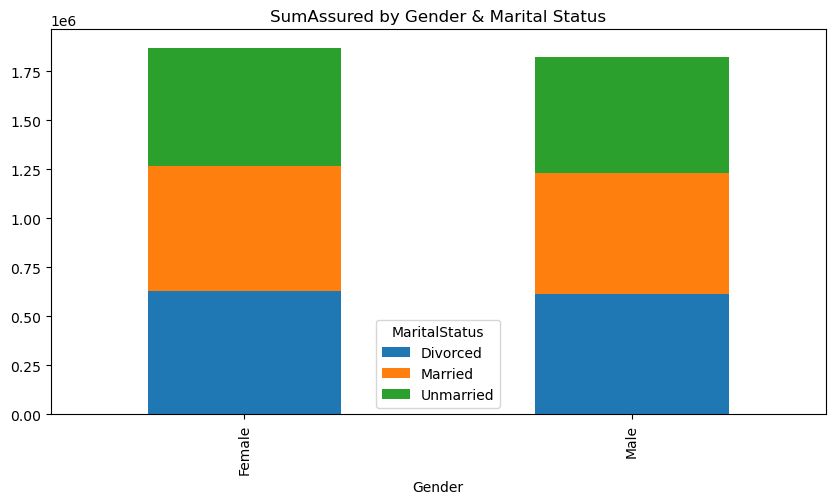

In [74]:
x=pd.pivot_table(df,index="Gender",columns="MaritalStatus",values="SumAssured",aggfunc=np.mean).fillna(0)
x.plot(kind="bar",stacked=True,figsize=(10,5),title="SumAssured by Gender & Marital Status");

In [75]:
pd.pivot_table(df,index="Gender",columns="MaritalStatus",values="SumAssured",aggfunc=[np.mean,np.size])

mean                         size                  
MaritalStatus  Divorced   Married Unmarried Divorced Married Unmarried
Gender                                                                
Female        628180.52 638665.28 603916.71      330     874       628
Male          614470.48 617831.88 593425.44      474    1394       820

In [76]:
pd.pivot_table(df,index="Gender",columns="Designation",values="SumAssured",aggfunc=[np.mean,np.size])

mean                                              size  \
Designation       AVP Executive   Manager Senior Manager        VP  AVP   
Gender                                                                    
Female      791875.65 532065.53 600388.21      718961.47 894228.03  160   
Male        798801.53 536422.62 586461.71      669490.68 886257.87  176   

                                                   
Designation Executive Manager Senior Manager   VP  
Gender                                             
Female            612     694            294   72  
Male             1050     926            382  154

In [77]:
pd.pivot_table(df,index="Gender",columns="EducationField",values="SumAssured",aggfunc=[np.mean,np.size])

mean                        size           
EducationField   Diploma        PG        UG Diploma   PG    UG
Gender                                                         
Female         639525.42 621241.71 623015.21     216  100  1516
Male           605559.81 625305.60 608730.38     280  226  2182

In [78]:
pd.pivot_table(df,index="Gender",columns="ExistingProdType",values="SumAssured",aggfunc=[np.mean,np.size])

mean                                                    \
ExistingProdType         1         2         3         4         5         6   
Gender                                                                         
Female           557513.40 621467.11 591178.84 638696.47 657557.97 692528.36   
Male             566762.88 612175.38 581852.41 619783.12 643274.99 638965.38   

                 size                           
ExistingProdType    1    2    3     4    5   6  
Gender                                          
Female             72   84  549   786  295  46  
Male              111  137  820  1130  413  77

In [79]:
round(pd.pivot_table(df,columns="ExistingProdType",values="SumAssured",aggfunc={"min", "max", "mean"}),2)

ExistingProdType          1          2          3          4          5  \
max              1208311.88 1208311.88 1208311.88 1208311.88 1208311.88   
mean              563123.74  615707.08  585592.52  627541.93  649226.23   
min               212720.00  233667.00  168536.00  180222.00  204950.00   

ExistingProdType          6  
max              1208311.88  
mean              658997.07  
min               244228.00

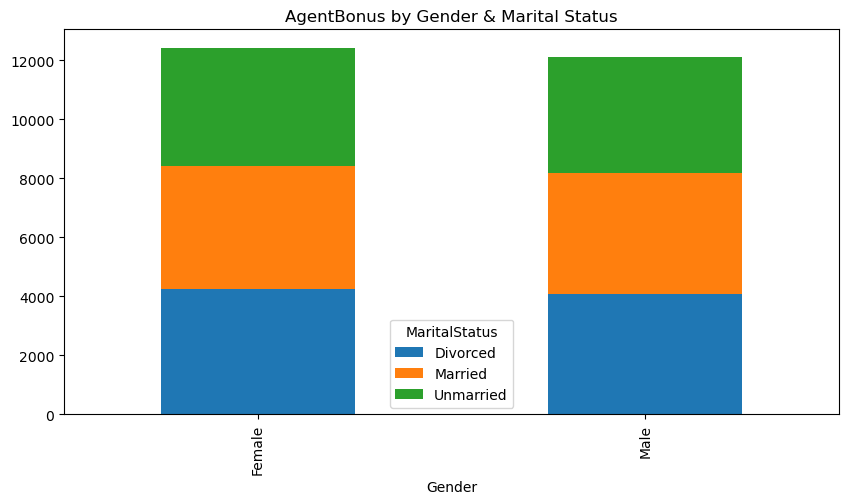

In [80]:
x=pd.pivot_table(df,index="Gender",columns="MaritalStatus",values="AgentBonus",aggfunc=np.mean).fillna(0)
x.plot(kind="bar",stacked=True,figsize=(10,5),title="AgentBonus by Gender & Marital Status");

In [81]:
pd.pivot_table(df,index="Gender",columns="MaritalStatus",values="AgentBonus",aggfunc=[np.mean,np.size])

mean                       size                  
MaritalStatus Divorced Married Unmarried Divorced Married Unmarried
Gender                                                             
Female         4237.08 4179.72   4002.97      330     874       628
Male           4082.36 4086.29   3945.52      474    1394       820

In [82]:
pd.pivot_table(df,index="MaritalStatus",values="AgentBonus",aggfunc=[np.mean,"max","min"])

mean        max        min
              AgentBonus AgentBonus AgentBonus
MaritalStatus                                 
Divorced         4145.86       9540       1714
Married          4122.29       9608       1605
Unmarried        3970.44       9426       1605

In [83]:
pd.pivot_table(df,index="Designation",values="AgentBonus",aggfunc=[np.mean,"max","min"])

mean        max        min
               AgentBonus AgentBonus AgentBonus
Designation                                    
AVP               5541.99       8895       2610
Executive         3458.39       5795       1605
Manager           3882.68       7098       1718
Senior Manager    4602.01       7692       2209
VP                6287.46       9608       3320

In [84]:
pd.pivot_table(df,index="EducationField",values="AgentBonus",aggfunc=[np.mean,"max","min"])

mean        max        min
               AgentBonus AgentBonus AgentBonus
EducationField                                 
Diploma           4157.98       9312       1688
PG                4061.54       8771       1714
UG                4068.53       9608       1605

In [85]:
pd.pivot_table(df,index="ExistingProdType",values="AgentBonus",aggfunc=[np.mean,"max","min"])

mean        max        min
                 AgentBonus AgentBonus AgentBonus
ExistingProdType                                 
1                   3777.74       8551       1898
2                   4190.86       8380       2120
3                   3815.37       8679       1605
4                   4170.49       9600       1705
5                   4317.30       9490       1729
6                   4420.91       9608       2187

## Cluster Analysis

In [86]:
dummies=pd.get_dummies(df[['Channel','Occupation','EducationField','Gender','ExistingProdType','Designation','MaritalStatus','Zone','PaymentMethod']], 
                       columns=['Channel','Occupation','EducationField','Gender','ExistingProdType','Designation','MaritalStatus','Zone','PaymentMethod'], 
                                     prefix=['Channel','Occupation','EducationField','Gender','ExistingProdType','Designation','MaritalStatus','Zone','PaymentMethod'],
        drop_first=True)
dummies

Channel_Online  Channel_Third Party Partner  Occupation_Large Business  \
0                  0                            0                          0   
1                  0                            1                          0   
2                  0                            0                          0   
3                  0                            1                          0   
4                  0                            0                          0   
...              ...                          ...                        ...   
4515               0                            0                          0   
4516               0                            0                          0   
4517               0                            0                          0   
4518               1                            0                          0   
4519               0                            0                          0   

      Occupation_Salaried  Occupation_Small Business  EducationField_PG  \
0                       1                          0                  0   
1                       1                          0                  0   
2                       0                          0                  1   
3                       1                          0                  0   
4                       0                          1                  0   
...                   ...                        ...                ...   
4515                    0                          1                  0   
4516                    1                          0                  0   
4517                    1                          0                  0   
4518                    0                          1                  0   
4519                    1                          0                  0   

      EducationField_UG  Gender_Male  ExistingProdType_2  ExistingProdType_3  \
0                     1            0                   0                   1   
1                     1            1                   0                   0   
2                     0            1                   0                   0   
3                     1            0                   0                   1   
4                     1            1                   0                   1   
...                 ...          ...                 ...                 ...   
4515                  1            1                   0                   0   
4516                  1            0                   1                   0   
4517                  1            0                   0                   0   
4518                  1            0                   0                   0   
4519                  1            0                   0                   0   

      ...  Designation_Senior Manager  Designation_VP  MaritalStatus_Married  \
0     ...                           0               0                      0   
1     ...                           0               0                      0   
2     ...                           0               0                      0   
3     ...                           0               0                      0   
4     ...                           0               0                      0   
...   ...                         ...             ...                    ...   
4515  ...                           1               0                      0   
4516  ...                           0               0                      1   
4517  ...                           0               0                      0   
4518  ...                           0               0                      0   
4519  ...                           0               0                      1   

      MaritalStatus_Unmarried  Zone_North  Zone_South  Zone_West  \
0                           1           1           0          0   
1                           0           1           0          0   
2                 

In [87]:
data_clus_1 = df.drop(['Channel','Occupation','EducationField','Gender','ExistingProdType','Designation','MaritalStatus','Zone','PaymentMethod'],axis=1)

In [88]:
data_clus_1

AgentBonus  CustTenure  NumberOfPolicy  MonthlyIncome Complaint  \
0           4409        4.00            2.00       20993.00         1   
1           2214        2.00            4.00       20130.00         0   
2           4273        4.00            3.00       17090.00         1   
3           1791       14.47            3.00       17909.00         1   
4           2955       14.47            4.00       18468.00         0   
...          ...         ...             ...            ...       ...   
4515        3953        8.00            2.00       26355.00         0   
4516        2939        9.00            2.00       20991.00         0   
4517        3792       23.00            5.00       22890.31         0   
4518        4816       10.00            2.00       20068.00         0   
4519        4764       10.00            2.00       23820.00         0   

      ExistingPolicyTenure  SumAssured  LastMonthCalls CustCareScore  
0                     2.00   806761.00            5.00          2.00  
1                     3.00   294502.00            7.00          3.00  
2                     2.00   619999.70            0.00          3.00  
3                     2.00   268635.00            0.00          5.00  
4                     4.00   366405.00            2.00          5.00  
...                    ...         ...             ...           ...  
4515                  2.00   636473.00            9.00          1.00  
4516                  3.00   296813.00            1.00          3.00  
4517                  2.00   667371.00            4.00          1.00  
4518                  6.00   943999.00            1.00          5.00  
4519                  3.00   700308.00            1.00          3.00  

[4520 rows x 9 columns]

In [89]:
df_clus = pd.concat([data_clus_1, dummies], axis=1)

In [90]:
df_clus

AgentBonus  CustTenure  NumberOfPolicy  MonthlyIncome Complaint  \
0           4409        4.00            2.00       20993.00         1   
1           2214        2.00            4.00       20130.00         0   
2           4273        4.00            3.00       17090.00         1   
3           1791       14.47            3.00       17909.00         1   
4           2955       14.47            4.00       18468.00         0   
...          ...         ...             ...            ...       ...   
4515        3953        8.00            2.00       26355.00         0   
4516        2939        9.00            2.00       20991.00         0   
4517        3792       23.00            5.00       22890.31         0   
4518        4816       10.00            2.00       20068.00         0   
4519        4764       10.00            2.00       23820.00         0   

      ExistingPolicyTenure  SumAssured  LastMonthCalls CustCareScore  \
0                     2.00   806761.00            5.00          2.00   
1                     3.00   294502.00            7.00          3.00   
2                     2.00   619999.70            0.00          3.00   
3                     2.00   268635.00            0.00          5.00   
4                     4.00   366405.00            2.00          5.00   
...                    ...         ...             ...           ...   
4515                  2.00   636473.00            9.00          1.00   
4516                  3.00   296813.00            1.00          3.00   
4517                  2.00   667371.00            4.00          1.00   
4518                  6.00   943999.00            1.00          5.00   
4519                  3.00   700308.00            1.00          3.00   

      Channel_Online  ...  Designation_Senior Manager  Designation_VP  \
0                  0  ...                           0               0   
1                  0  ...                           0               0   
2                  0  ...                           0               0   
3                  0  ...                           0               0   
4                  0  ...                           0               0   
...              ...  ...                         ...             ...   
4515               0  ...                           1               0   
4516               0  ...                           0               0   
4517               0  ...                           0               0   
4518               1  ...                           0               0   
4519               0  ...                           0               0   

      MaritalStatus_Married  MaritalStatus_Unmarried  Zone_North  Zone_South  \
0                         0                        1           1           0   
1                         0                        0           1           0   
2                         0                        1           1           0   
3                         0                        0           0           0   
4                         0                        0           0           0   
...                     ...                      ...         ...         ...   
4515                      0                        1           0           0   
4516                      1                        0           1           0   
4517                      0                        1           1           0   
4518                      0                        1           0           0   
4519                      1                        0           1           0   

      Zone_West  PaymentMethod_Monthly  PaymentMethod_Quarterly  \
0             0                      0                        0   
1             0                      0                        0   
2             0                      0                        0   
3             1                      0                        0   
4             1                      0                        0   
...         ...         

In [91]:
df_clus.isnull().sum()

AgentBonus                     0
CustTenure                     0
NumberOfPolicy                 0
MonthlyIncome                  0
Complaint                      0
ExistingPolicyTenure           0
SumAssured                     0
LastMonthCalls                 0
CustCareScore                  0
Channel_Online                 0
Channel_Third Party Partner    0
Occupation_Large Business      0
Occupation_Salaried            0
Occupation_Small Business      0
EducationField_PG              0
EducationField_UG              0
Gender_Male                    0
ExistingProdType_2             0
ExistingProdType_3             0
ExistingProdType_4             0
ExistingProdType_5             0
ExistingProdType_6             0
Designation_Executive          0
Designation_Manager            0
Designation_Senior Manager     0
Designation_VP                 0
MaritalStatus_Married          0
MaritalStatus_Unmarried        0
Zone_North                     0
Zone_South                     0
Zone_West 

In [92]:
df_clus.shape

(4520, 34)

In [93]:
from sklearn.preprocessing import StandardScaler
df_scaled_clus = pd.DataFrame(StandardScaler().fit_transform(df_clus),columns=df_clus.columns)

In [94]:
df_scaled_clus.describe().T

count  mean  std   min   25%   50%   75%   max
AgentBonus                  4520.00  0.00 1.00 -1.76 -0.75 -0.12  0.56  3.94
CustTenure                  4520.00 -0.00 1.00 -1.48 -0.76 -0.04  0.56  2.54
NumberOfPolicy              4520.00  0.00 1.00 -1.77 -1.08  0.30  0.99  1.68
MonthlyIncome               4520.00  0.00 1.00 -1.66 -0.69 -0.18  0.50  2.27
Complaint                   4520.00 -0.00 1.00 -0.63 -0.63 -0.63  1.58  1.58
ExistingPolicyTenure        4520.00  0.00 1.00 -1.08 -0.71 -0.34  0.41  2.08
SumAssured                  4520.00  0.00 1.00 -1.95 -0.75 -0.11  0.59  2.58
LastMonthCalls              4520.00  0.00 1.00 -1.28 -0.73 -0.45  0.94  3.43
CustCareScore               4520.00 -0.00 1.00 -1.50 -0.78 -0.05  0.68  1.41
Channel_Online              4520.00 -0.00 1.00 -0.34 -0.34 -0.34 -0.34  2.94
Channel_Third Party Partner 4520.00  0.00 1.00 -0.48 -0.48 -0.48 -0.48  2.07
Occupation_Large Business   4520.00 -0.00 1.00 -0.31 -0.31 -0.31 -0.31  3.17
Occupation_Salaried         4520.00  0.00 1.00 -0.97 -0.97 -0.97  1.03  1.03
Occupation_Small Business   4520.00 -0.00 1.00 -0.86 -0.86 -0.86  1.16  1.16
EducationField_PG           4520.00  0.00 1.00 -0.28 -0.28 -0.28 -0.28  3.59
EducationField_UG           4520.00  0.00 1.00 -2.12  0.47  0.47  0.47  0.47
Gender_Male                 4520.00 -0.00 1.00 -1.21 -1.21  0.83  0.83  0.83
ExistingProdType_2          4520.00  0.00 1.00 -0.23 -0.23 -0.23 -0.23  4.41
ExistingProdType_3          4520.00  0.00 1.00 -0.66 -0.66 -0.66  1.52  1.52
ExistingProdType_4          4520.00 -0.00 1.00 -0.86 -0.86 -0.86  1.17  1.17
ExistingProdType_5          4520.00 -0.00 1.00 -0.43 -0.43 -0.43 -0.43  2.32
ExistingProdType_6          4520.00  0.00 1.00 -0.17 -0.17 -0.17 -0.17  5.98
Designation_Executive       4520.00 -0.00 1.00 -0.76 -0.76 -0.76  1.31  1.31
Designation_Manager         4520.00  0.00 1.00 -0.75 -0.75 -0.75  1.34  1.34
Designation_Senior Manager  4520.00 -0.00 1.00 -0.42 -0.42 -0.42 -0.42  2.38
Designation_VP              4520.00 -0.00 1.00 -0.23 -0.23 -0.23 -0.23  4.36
MaritalStatus_Married       4520.00  0.00 1.00 -1.00 -1.00  1.00  1.00  1.00
MaritalStatus_Unmarried     4520.00 -0.00 1.00 -0.69 -0.69 -0.69  1.46  1.46
Zone_North                  4520.00  0.00 1.00 -0.85 -0.85 -0.85  1.18  1.18
Zone_South                  4520.00  0.00 1.00 -0.04 -0.04 -0.04 -0.04 27.43
Zone_West                   4520.00  0.00 1.00 -1.15 -1.15  0.87  0.87  0.87
PaymentMethod_Monthly       4520.00 -0.00 1.00 -0.29 -0.29 -0.29 -0.29  3.43
PaymentMethod_Quarterly     4520.00 -0.00 1.00 -0.13 -0.13 -0.13 -0.13  7.65
PaymentMethod_Yearly        4520.00 -0.00 1.00 -0.68 -0.68 -0.68  1.47  1.47

In [95]:
from sklearn.cluster import KMeans
wss = []
for i in range(1,11):
    k_means = KMeans(n_clusters = i,random_state=123)
    k_means.fit(df_scaled_clus)
    wss.append(k_means.inertia_)
wss_df = pd.DataFrame(wss,columns = ['WSS'])
wss_df['Num_of_clusters'] = range(1,11)
wss_df = wss_df[['Num_of_clusters','WSS']]
wss_df['diff'] = wss_df['WSS'].diff()
wss_df

Num_of_clusters       WSS      diff
0                1 153680.00       NaN
1                2 143113.59 -10566.41
2                3 135977.01  -7136.59
3                4 130419.64  -5557.37
4                5 124494.02  -5925.62
5                6 120326.94  -4167.09
6                7 116471.32  -3855.62
7                8 111132.72  -5338.59
8                9 107811.86  -3320.86
9               10 105417.87  -2393.99

Text(0.5, 1.0, 'Elbow Plot for K-Means')

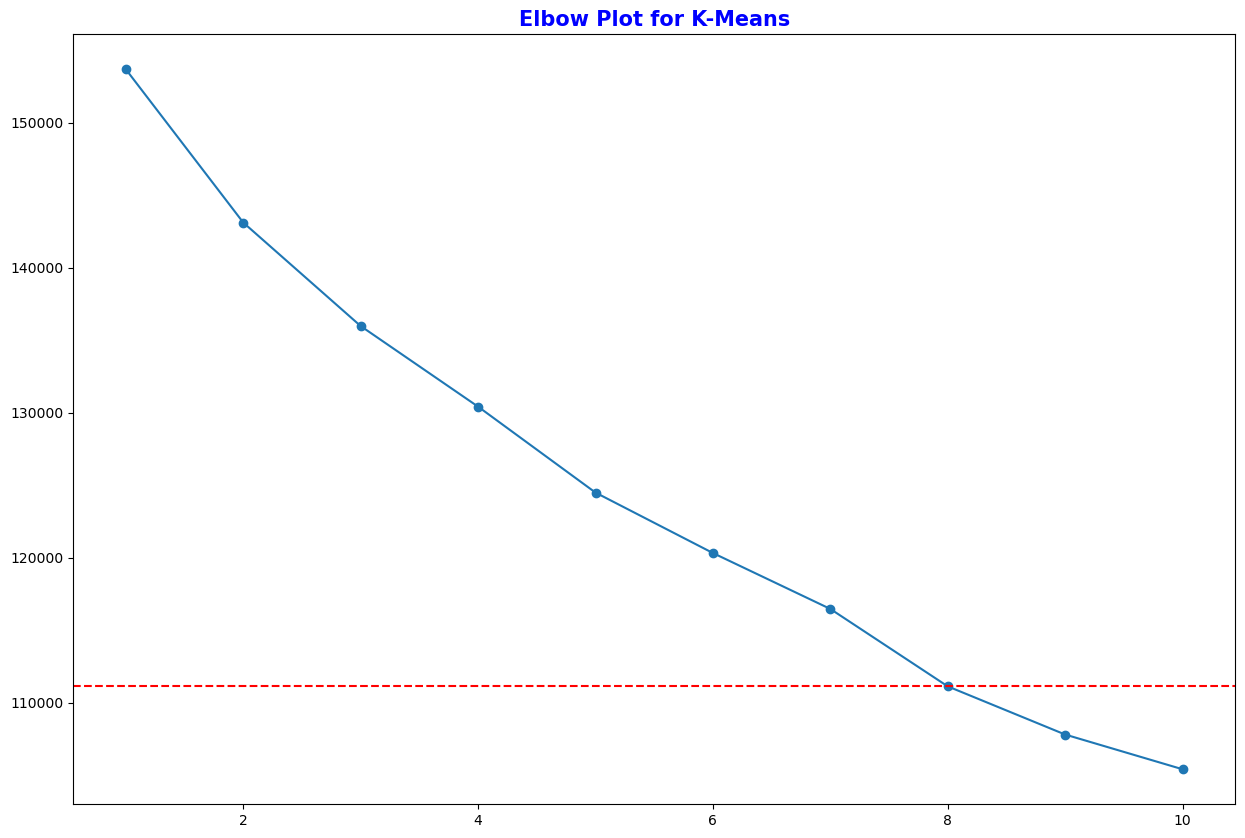

In [96]:
fig,axes = plt.subplots(figsize=(15,10))
plt.plot(wss_df['Num_of_clusters'],wss_df['WSS'],marker='o')
axes.axhline(111132.724484,linestyle = '--',color = 'red')
plt.title("Elbow Plot for K-Means",fontsize=15,weight='bold',color="Blue")

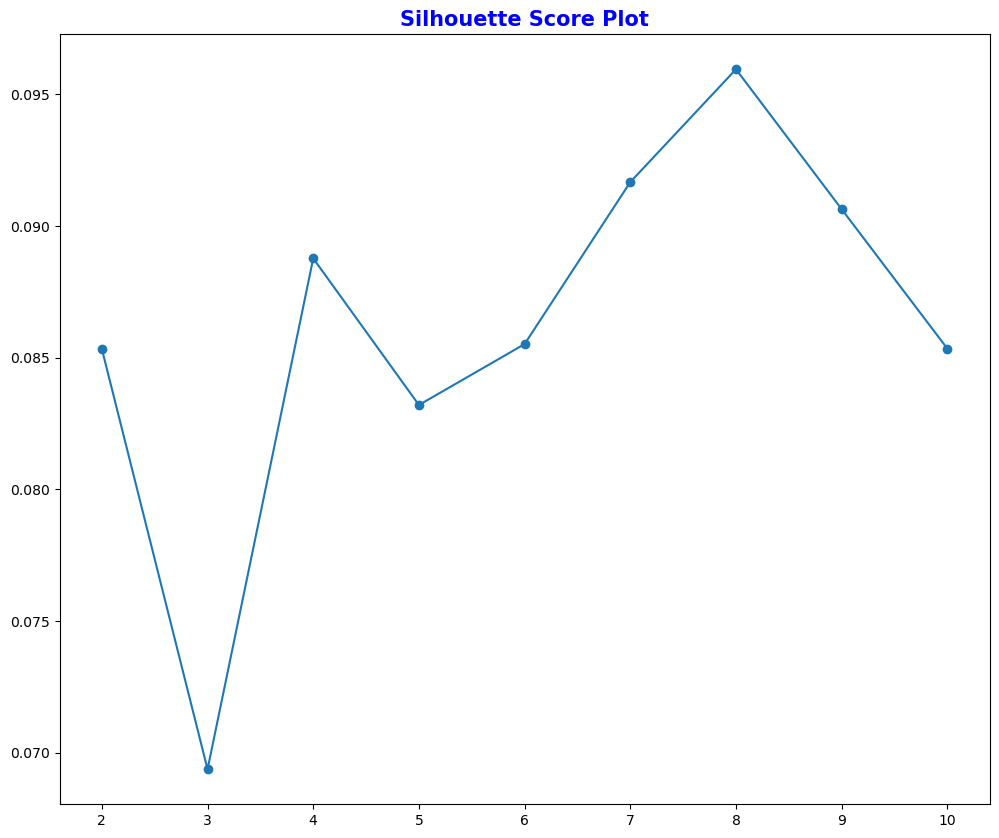

In [97]:
from sklearn.metrics import silhouette_score
sil_score = []
for i in range(2,11):
    k_means = KMeans(n_clusters = i,random_state=123)
    k_means.fit(df_scaled_clus)
    clus = k_means.labels_
    sil_score.append(silhouette_score(X=df_scaled_clus,labels = clus))
fig,axes = plt.subplots(figsize=(12,10))
plt.plot(range(2,11),sil_score,marker='o')
axes.set_title('Silhouette Score Plot',fontsize=15,weight='bold',color="Blue");

In [98]:
sil_score_df = pd.DataFrame(sil_score,columns = ['silhouette_score'])
sil_score_df['Num_of_clusters'] = range(2,11)
sil_score_df = sil_score_df[['Num_of_clusters','silhouette_score']]
sil_score_df

Num_of_clusters  silhouette_score
0                2              0.09
1                3              0.07
2                4              0.09
3                5              0.08
4                6              0.09
5                7              0.09
6                8              0.10
7                9              0.09
8               10              0.09

In [99]:
k_means_model = KMeans(n_clusters=4,random_state=123)
k_means_model.fit(df_scaled_clus)
clus = k_means_model.labels_
df['Cluster'] = clus
df['Cluster'] = df['Cluster'].map({0:'Cluster-1',1:'Cluster-2',2:'Cluster-3',3:'Cluster-4'})
df.head()

AgentBonus  CustTenure              Channel      Occupation EducationField  \
0        4409        4.00                Agent        Salaried             UG   
1        2214        2.00  Third Party Partner        Salaried             UG   
2        4273        4.00                Agent     Free Lancer             PG   
3        1791       14.47  Third Party Partner        Salaried             UG   
4        2955       14.47                Agent  Small Business             UG   

   Gender ExistingProdType Designation  NumberOfPolicy MaritalStatus  \
0  Female                3     Manager            2.00     Unmarried   
1    Male                4     Manager            4.00      Divorced   
2    Male                4   Executive            3.00     Unmarried   
3  Female                3   Executive            3.00      Divorced   
4    Male                3   Executive            4.00      Divorced   

   MonthlyIncome Complaint  ExistingPolicyTenure  SumAssured   Zone  \
0       20993.00         1                  2.00   806761.00  North   
1       20130.00         0                  3.00   294502.00  North   
2       17090.00         1                  2.00   619999.70  North   
3       17909.00         1                  2.00   268635.00   West   
4       18468.00         0                  4.00   366405.00   West   

  PaymentMethod  LastMonthCalls CustCareScore    Cluster  
0   Half Yearly            5.00          2.00  Cluster-4  
1        Yearly            7.00          3.00  Cluster-4  
2        Yearly            0.00          3.00  Cluster-4  
3   Half Yearly            0.00          5.00  Cluster-4  
4   Half Yearly            2.00          5.00  Cluster-4

In [100]:
round(pd.pivot_table(df,index="Cluster",values="SumAssured",aggfunc=(np.sum,np.mean,np.size,'min','max')),2)

max      mean       min  size           sum
Cluster                                                     
Cluster-1 1208311.88 624377.66 204950.00   774  483268312.27
Cluster-2 1208311.88 588727.38 212720.00   393  231369860.89
Cluster-3 1208311.88 813048.29 290924.00  1201  976470995.38
Cluster-4 1047880.00 507792.31 168536.00  2152 1092769056.40

In [101]:
round(pd.pivot_table(df,index="Cluster",values="AgentBonus",aggfunc=(np.sum,np.mean,np.size,'min','max')),2)

max    mean   min  size      sum
Cluster                                     
Cluster-1  8771 4124.97  1729   774  3192729
Cluster-2  8380 3976.69  1898   393  1562841
Cluster-3  9608 5390.22  2533  1201  6473649
Cluster-4  6823 3346.94  1605  2152  7202610

### Countplot by Clusters

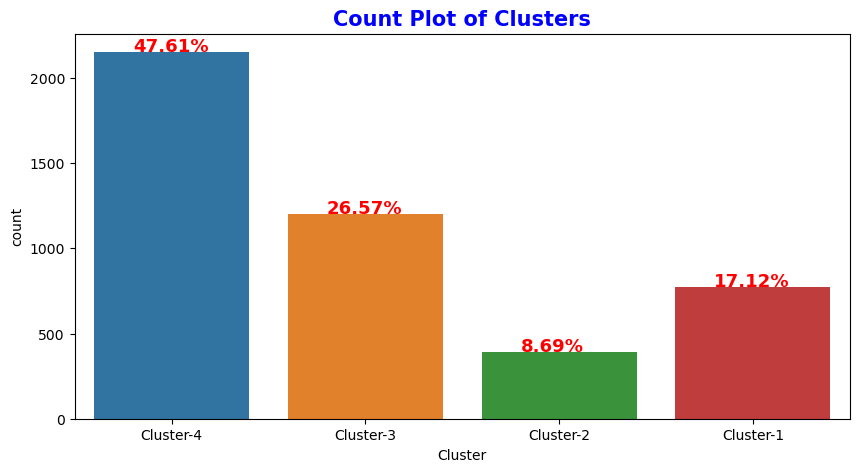

In [102]:
fig,axes = plt.subplots(figsize = (10,5))
sns.countplot(x = "Cluster",data = df)
plt.title("Count Plot of Clusters",fontsize=15,weight='bold',color="Blue")
for p in axes.patches:
    axes.annotate(text = f"{round(p.get_height()/len(df)*100,2)}%",xy = (p.get_x() + p.get_width() / 4, p.get_height()+4),fontsize=13,color="Red",weight='bold')
plt.show()

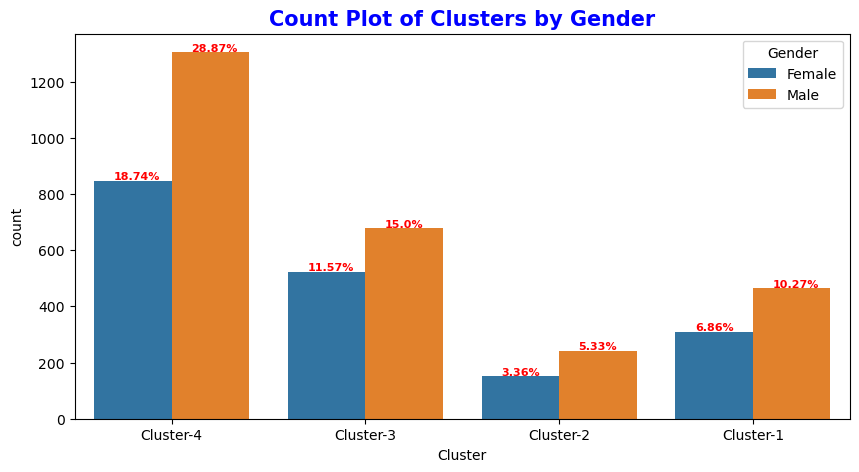

In [103]:
fig,axes = plt.subplots(figsize = (10,5))
sns.countplot(x = "Cluster",data = df,hue="Gender")
plt.title("Count Plot of Clusters by Gender",fontsize=15,weight='bold',color="Blue")
for p in axes.patches:
    axes.annotate(text = f"{round(p.get_height()/len(df)*100,2)}%",xy = (p.get_x() + p.get_width() / 4, p.get_height()+4),fontsize=8,color="Red",weight='bold')
plt.show()

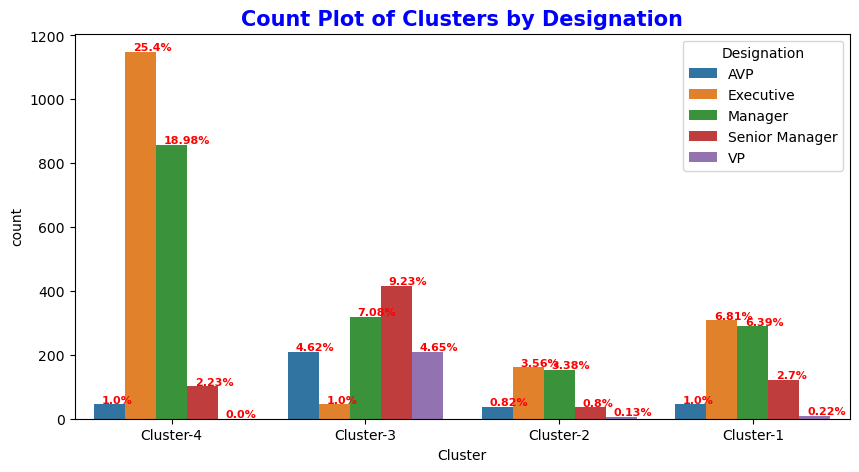

In [104]:
fig,axes = plt.subplots(figsize = (10,5))
sns.countplot(x = "Cluster",data = df,hue="Designation")
plt.title("Count Plot of Clusters by Designation",fontsize=15,weight='bold',color="Blue")
for p in axes.patches:
    axes.annotate(text = f"{round(p.get_height()/len(df)*100,2)}%",xy = (p.get_x() + p.get_width() / 4, p.get_height()+4),fontsize=8,color="Red",weight='bold')
plt.show()

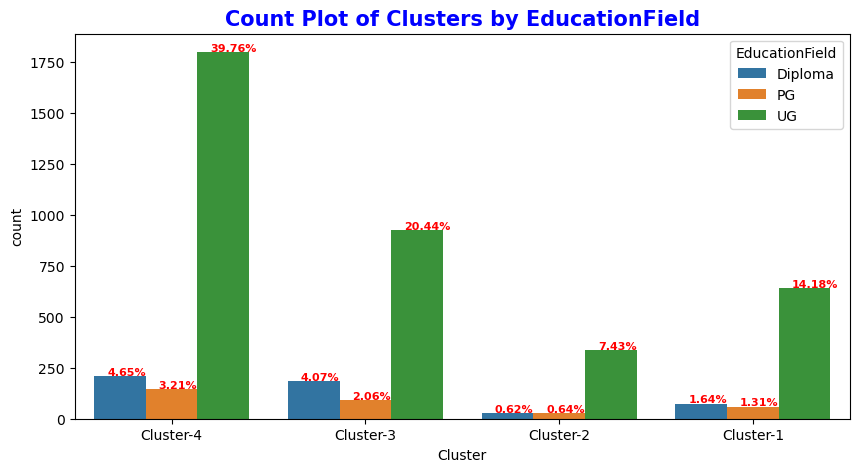

In [105]:
fig,axes = plt.subplots(figsize = (10,5))
sns.countplot(x = "Cluster",data = df,hue="EducationField")
plt.title("Count Plot of Clusters by EducationField",fontsize=15,weight='bold',color="Blue")
for p in axes.patches:
    axes.annotate(text = f"{round(p.get_height()/len(df)*100,2)}%",xy = (p.get_x() + p.get_width() / 4, p.get_height()+4),fontsize=8,color="Red",weight='bold')
plt.show()

In [106]:
round(pd.pivot_table(df,index="Cluster",columns="ExistingProdType",values="AgentBonus",aggfunc=len,fill_value=0).div(len(df.index)).mul(100),2)

ExistingProdType    1    2     3     4     5    6
Cluster                                          
Cluster-1        0.00 0.00  0.00  0.00 14.73 2.39
Cluster-2        3.81 4.85  0.02  0.02  0.00 0.00
Cluster-3        0.09 0.04  6.95 18.25  0.93 0.31
Cluster-4        0.15 0.00 23.32 24.12  0.00 0.02

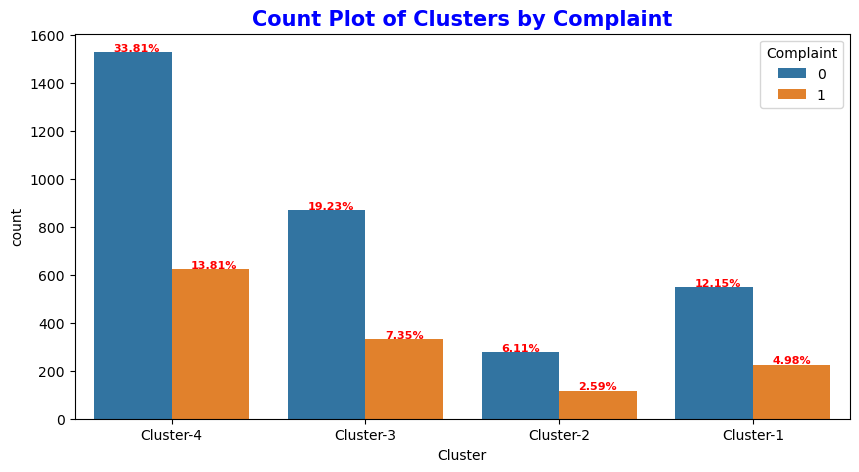

In [107]:
fig,axes = plt.subplots(figsize = (10,5))
sns.countplot(x = "Cluster",data = df,hue="Complaint")
plt.title("Count Plot of Clusters by Complaint",fontsize=15,weight='bold',color="Blue")
for p in axes.patches:
    axes.annotate(text = f"{round(p.get_height()/len(df)*100,2)}%",xy = (p.get_x() + p.get_width() / 4, p.get_height()+4),fontsize=8,color="Red",weight='bold')
plt.show()

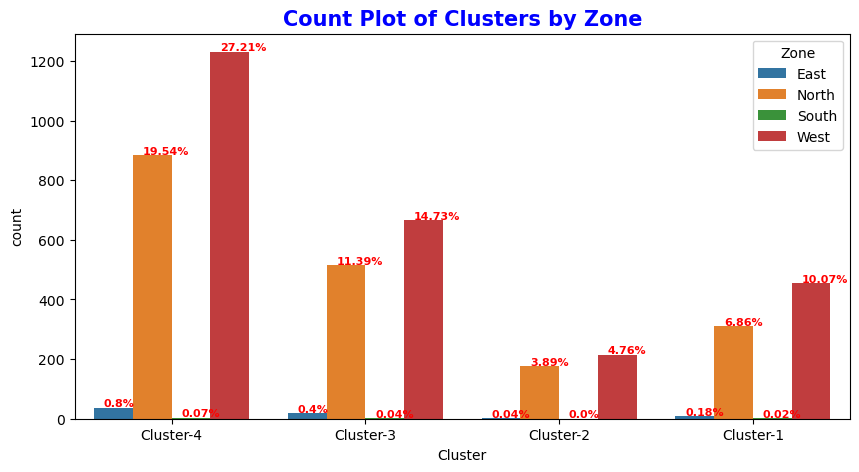

In [108]:
fig,axes = plt.subplots(figsize = (10,5))
sns.countplot(x = "Cluster",data = df,hue="Zone")
plt.title("Count Plot of Clusters by Zone",fontsize=15,weight='bold',color="Blue")
for p in axes.patches:
    axes.annotate(text = f"{round(p.get_height()/len(df)*100,2)}%",xy = (p.get_x() + p.get_width() / 4, p.get_height()+4),fontsize=8,color="Red",weight='bold')
plt.show()

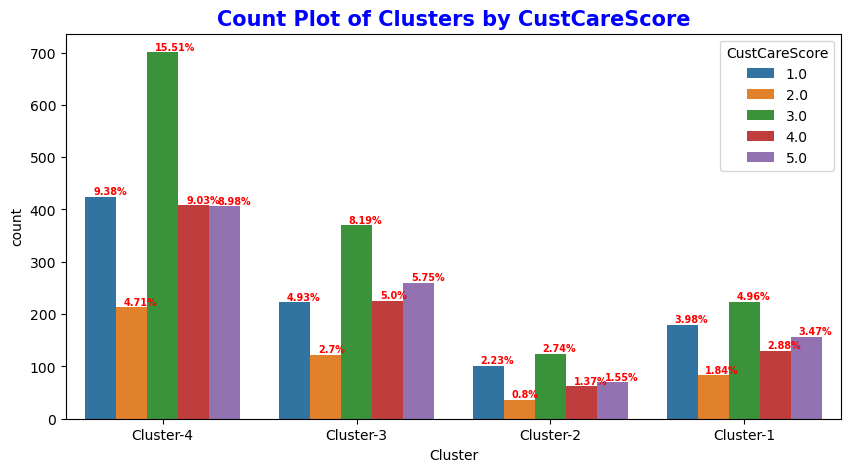

In [109]:
fig,axes = plt.subplots(figsize = (10,5))
sns.countplot(x = "Cluster",data = df,hue="CustCareScore")
plt.title("Count Plot of Clusters by CustCareScore",fontsize=15,weight='bold',color="Blue")
for p in axes.patches:
    axes.annotate(text = f"{round(p.get_height()/len(df)*100,2)}%",xy = (p.get_x() + p.get_width() / 4, p.get_height()+4),fontsize=7,color="Red",weight='bold')
plt.show()

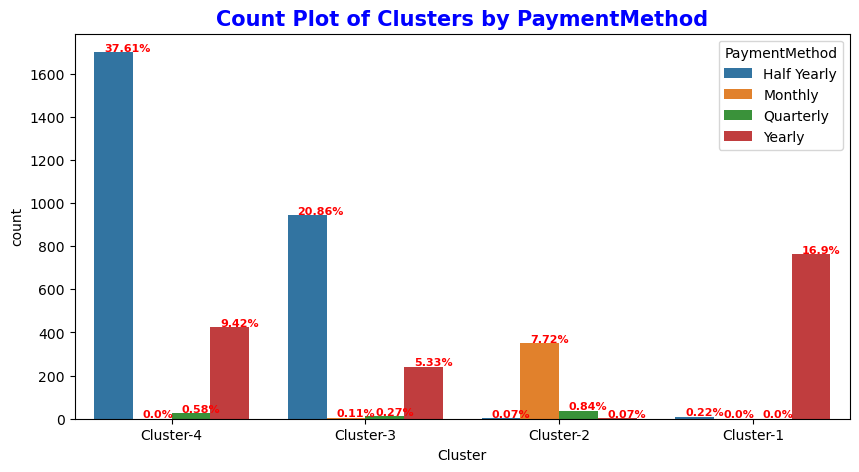

In [110]:
fig,axes = plt.subplots(figsize = (10,5))
sns.countplot(x = "Cluster",data = df,hue="PaymentMethod")
plt.title("Count Plot of Clusters by PaymentMethod",fontsize=15,weight='bold',color="Blue")
for p in axes.patches:
    axes.annotate(text = f"{round(p.get_height()/len(df)*100,2)}%",xy = (p.get_x() + p.get_width() / 4, p.get_height()+4),fontsize=8,color="Red",weight='bold')
plt.show()

### Scatterplot by Cluster

----------------------------------------------------------------------------


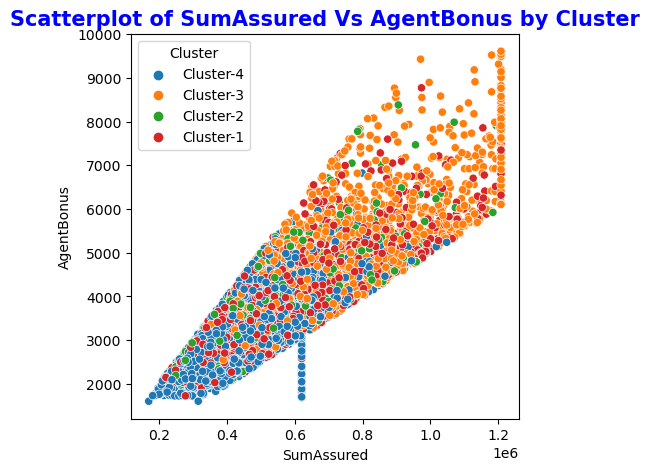

In [111]:
multivariateAnalysis_numeric("Cluster")

In [112]:
df_clus.columns[1:]

Index(['CustTenure', 'NumberOfPolicy', 'MonthlyIncome', 'Complaint',
       'ExistingPolicyTenure', 'SumAssured', 'LastMonthCalls', 'CustCareScore',
       'Channel_Online', 'Channel_Third Party Partner',
       'Occupation_Large Business', 'Occupation_Salaried',
       'Occupation_Small Business', 'EducationField_PG', 'EducationField_UG',
       'Gender_Male', 'ExistingProdType_2', 'ExistingProdType_3',
       'ExistingProdType_4', 'ExistingProdType_5', 'ExistingProdType_6',
       'Designation_Executive', 'Designation_Manager',
       'Designation_Senior Manager', 'Designation_VP', 'MaritalStatus_Married',
       'MaritalStatus_Unmarried', 'Zone_North', 'Zone_South', 'Zone_West',
       'PaymentMethod_Monthly', 'PaymentMethod_Quarterly',
       'PaymentMethod_Yearly'],
      dtype='object')

## Model Building

In [113]:
data = df_clus.copy(deep=True)

In [114]:
data_X = data.drop('AgentBonus',axis=1)
data_Y = data['AgentBonus']

### Scaling

In [115]:
data_sca = pd.DataFrame(StandardScaler().fit_transform(data_X),columns=data_X.columns)

In [116]:
data_sca.head()

CustTenure  NumberOfPolicy  MonthlyIncome  Complaint  ExistingPolicyTenure  \
0       -1.24           -1.08          -0.40       1.58                 -0.71   
1       -1.48            0.30          -0.62      -0.63                 -0.34   
2       -1.24           -0.39          -1.39       1.58                 -0.71   
3        0.02           -0.39          -1.18       1.58                 -0.71   
4        0.02            0.30          -1.04      -0.63                  0.03   

   SumAssured  LastMonthCalls  CustCareScore  Channel_Online  \
0        0.83            0.10          -0.78           -0.34   
1       -1.40            0.66          -0.05           -0.34   
2        0.02           -1.28          -0.05           -0.34   
3       -1.51           -1.28           1.41           -0.34   
4       -1.09           -0.73           1.41           -0.34   

   Channel_Third Party Partner  ...  Designation_Senior Manager  \
0                        -0.48  ...                       -0.42   
1                         2.07  ...                       -0.42   
2                        -0.48  ...                       -0.42   
3                         2.07  ...                       -0.42   
4                        -0.48  ...                       -0.42   

   Designation_VP  MaritalStatus_Married  MaritalStatus_Unmarried  Zone_North  \
0           -0.23                  -1.00                     1.46        1.18   
1           -0.23                  -1.00                    -0.69        1.18   
2           -0.23                  -1.00                     1.46        1.18   
3           -0.23                  -1.00                    -0.69       -0.85   
4           -0.23                  -1.00                    -0.69       -0.85   

   Zone_South  Zone_West  PaymentMethod_Monthly  PaymentMethod_Quarterly  \
0       -0.04      -1.15                  -0.29                    -0.13   
1       -0.04      -1.15                  -0.29                    -0.13   
2       -0.04      -1.15                  -0.29                    -0.13   
3       -0.04       0.87                  -0.29                    -0.13   
4       -0.04       0.87                  -0.29                    -0.13   

   PaymentMethod_Yearly  
0                 -0.68  
1                  1.47  
2                  1.47  
3                 -0.68  
4                 -0.68  

[5 rows x 33 columns]

In [117]:
data1 = pd.concat([data_sca,data_Y],axis=1)

In [118]:
data1.columns

Index(['CustTenure', 'NumberOfPolicy', 'MonthlyIncome', 'Complaint',
       'ExistingPolicyTenure', 'SumAssured', 'LastMonthCalls', 'CustCareScore',
       'Channel_Online', 'Channel_Third Party Partner',
       'Occupation_Large Business', 'Occupation_Salaried',
       'Occupation_Small Business', 'EducationField_PG', 'EducationField_UG',
       'Gender_Male', 'ExistingProdType_2', 'ExistingProdType_3',
       'ExistingProdType_4', 'ExistingProdType_5', 'ExistingProdType_6',
       'Designation_Executive', 'Designation_Manager',
       'Designation_Senior Manager', 'Designation_VP', 'MaritalStatus_Married',
       'MaritalStatus_Unmarried', 'Zone_North', 'Zone_South', 'Zone_West',
       'PaymentMethod_Monthly', 'PaymentMethod_Quarterly',
       'PaymentMethod_Yearly', 'AgentBonus'],
      dtype='object')

In [119]:
data1.head()

CustTenure  NumberOfPolicy  MonthlyIncome  Complaint  ExistingPolicyTenure  \
0       -1.24           -1.08          -0.40       1.58                 -0.71   
1       -1.48            0.30          -0.62      -0.63                 -0.34   
2       -1.24           -0.39          -1.39       1.58                 -0.71   
3        0.02           -0.39          -1.18       1.58                 -0.71   
4        0.02            0.30          -1.04      -0.63                  0.03   

   SumAssured  LastMonthCalls  CustCareScore  Channel_Online  \
0        0.83            0.10          -0.78           -0.34   
1       -1.40            0.66          -0.05           -0.34   
2        0.02           -1.28          -0.05           -0.34   
3       -1.51           -1.28           1.41           -0.34   
4       -1.09           -0.73           1.41           -0.34   

   Channel_Third Party Partner  ...  Designation_VP  MaritalStatus_Married  \
0                        -0.48  ...           -0.23                  -1.00   
1                         2.07  ...           -0.23                  -1.00   
2                        -0.48  ...           -0.23                  -1.00   
3                         2.07  ...           -0.23                  -1.00   
4                        -0.48  ...           -0.23                  -1.00   

   MaritalStatus_Unmarried  Zone_North  Zone_South  Zone_West  \
0                     1.46        1.18       -0.04      -1.15   
1                    -0.69        1.18       -0.04      -1.15   
2                     1.46        1.18       -0.04      -1.15   
3                    -0.69       -0.85       -0.04       0.87   
4                    -0.69       -0.85       -0.04       0.87   

   PaymentMethod_Monthly  PaymentMethod_Quarterly  PaymentMethod_Yearly  \
0                  -0.29                    -0.13                 -0.68   
1                  -0.29                    -0.13                  1.47   
2                  -0.29                    -0.13                  1.47   
3                  -0.29                    -0.13                 -0.68   
4                  -0.29                    -0.13                 -0.68   

   AgentBonus  
0        4409  
1        2214  
2        4273  
3        1791  
4        2955  

[5 rows x 34 columns]

In [120]:
data1.columns = data1.columns.str.replace(' ', '_')

In [121]:
data1.columns

Index(['CustTenure', 'NumberOfPolicy', 'MonthlyIncome', 'Complaint',
       'ExistingPolicyTenure', 'SumAssured', 'LastMonthCalls', 'CustCareScore',
       'Channel_Online', 'Channel_Third_Party_Partner',
       'Occupation_Large_Business', 'Occupation_Salaried',
       'Occupation_Small_Business', 'EducationField_PG', 'EducationField_UG',
       'Gender_Male', 'ExistingProdType_2', 'ExistingProdType_3',
       'ExistingProdType_4', 'ExistingProdType_5', 'ExistingProdType_6',
       'Designation_Executive', 'Designation_Manager',
       'Designation_Senior_Manager', 'Designation_VP', 'MaritalStatus_Married',
       'MaritalStatus_Unmarried', 'Zone_North', 'Zone_South', 'Zone_West',
       'PaymentMethod_Monthly', 'PaymentMethod_Quarterly',
       'PaymentMethod_Yearly', 'AgentBonus'],
      dtype='object')

### Train Test Split

In [122]:
from sklearn.model_selection import train_test_split
X = data1.drop('AgentBonus',axis=1) 
Y = data1['AgentBonus']
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.30,random_state=1)

In [123]:
df_train = pd.concat([X_train,Y_train],axis=1)
df_test = pd.concat([X_test,Y_test],axis=1)

## Linear Regression

In [124]:
cols = X.columns
cols_str = " + ".join(cols)
print('Independent variables:',cols_str)

Independent variables: CustTenure + NumberOfPolicy + MonthlyIncome + Complaint + ExistingPolicyTenure + SumAssured + LastMonthCalls + CustCareScore + Channel_Online + Channel_Third_Party_Partner + Occupation_Large_Business + Occupation_Salaried + Occupation_Small_Business + EducationField_PG + EducationField_UG + Gender_Male + ExistingProdType_2 + ExistingProdType_3 + ExistingProdType_4 + ExistingProdType_5 + ExistingProdType_6 + Designation_Executive + Designation_Manager + Designation_Senior_Manager + Designation_VP + MaritalStatus_Married + MaritalStatus_Unmarried + Zone_North + Zone_South + Zone_West + PaymentMethod_Monthly + PaymentMethod_Quarterly + PaymentMethod_Yearly


In [125]:
import statsmodels.formula.api as SM
LR1_SM = SM.ols(formula =f"AgentBonus ~ {cols_str}", data=data1).fit()
LR1_SM.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             AgentBonus   R-squared:                       0.784
Model:                            OLS   Adj. R-squared:                  0.783
Method:                 Least Squares   F-statistic:                     494.0
Date:                Thu, 04 Apr 2024   Prob (F-statistic):               0.00
Time:                        21:46:25   Log-Likelihood:                -35702.
No. Observations:                4520   AIC:                         7.147e+04
Df Residuals:                    4486   BIC:                         7.169e+04
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                    4077.8383      9.732    419.022      0.000    4058.759    4096.917
CustTenure                    226.8465     11.041     20.547      0.000     205.202     248.491
NumberOfPolicy                  0.6098     10.274      0.059      0.953     -19.533      20.753
MonthlyIncome                 149.3411     21.782      6.856      0.000     106.638     192.045
Complaint                      18.0813      9.775      1.850      0.064      -1.083      37.246
ExistingPolicyTenure          118.8910     10.291     11.553      0.000      98.715     139.066
SumAssured                    876.8882     12.158     72.124      0.000     853.052     900.724
LastMonthCalls                -11.3359     10.702     -1.059      0.290     -32.317       9.645
CustCareScore                  14.4429      9.824      1.470      0.142      -4.817      33.703
Channel_Online                  9.1552      9.964      0.919      0.358     -10.379      28.689
Channel_Third_Party_Partner    -1.5759      9.925     -0.159      0.874     -21.034      17.882
Occupation_Large_Business    -148.5223    133.717     -1.111      0.267    -410.673     113.628
Occupation_Salaried          -246.1782    232.543     -1.059      0.290    -702.078     209.721
Occupation_Small_Business    -249.2365    230.252     -1.082      0.279    -700.644     202.171
EducationField_PG              -5.3449     13.606     -0.393      0.694     -32.020      21.330
EducationField_UG               6.6395     13.359      0.497      0.619     -19.550      32.829
Gender_Male                    -0.2525      9.854     -0.026      0.980     -19.572      19.067
ExistingProdType_2             11.7237     14.922      0.786      0.432     -17.532      40.979
ExistingProdType_3            -45.1779     54.136     -0.835      0.404    -151.312      60.956
ExistingProdType_4              8.9180     59.706      0.149      0.881    -108.135     125.970
ExistingProdType_5             43.7305     46.166      0.947      0.344     -46.777     134.238
ExistingProdType_6             24.5492     22.503      1.091      0.275     -19.569      68.667
Designation_Executive        -258.7268     29.391     -8.803      0.000    -316.348    -201.106
Designation_Manager          -236.2472     24.124     -9.793      0.000    -283.541    -188.953
Designation_Senior_Manager   -114.6574     16.423     -6.981      0.000    -146.855     -82.460
Designation_VP                 47.8914     13.139      3.645      0.000      22.133      73.650
MaritalStatus_Married         -15.1008     13.566     -1.113      0.266     -41.696      11.495
MaritalStatus_Unmarried         3.5090     13.595      0.258      0.796     -23.143      30.161
Zone_North                    -32.4042     41.321     -0.784      0.433    -113.413      48.605
Zone_South 

In [126]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from IPython.display import display

In [127]:
X_VIF = X.copy(deep=True)

In [128]:
VIF_thres = 5

while True:
    Cols = range(X_VIF.shape[1])
    
    vif = pd.DataFrame()
    vif["variables"] = X_VIF.columns
    vif["VIF"] = np.array([variance_inflation_factor(X_VIF.values, i) for i in Cols])
    vif_order = vif.sort_values(by = 'VIF', ascending = False)
    print('count of variables:',vif.shape[0])
    display(vif_order)
    print('-------------------------------------------------------------------')
    if all(vif["VIF"] < VIF_thres):
        break
    else:
        Cols = np.delete(Cols,np.argmax(vif["VIF"]))
        X_VIF = X_VIF.iloc[:,Cols]

count of variables: 33


variables    VIF
11          Occupation_Salaried 570.98
12    Occupation_Small_Business 559.78
10    Occupation_Large_Business 188.79
18           ExistingProdType_4  37.64
17           ExistingProdType_3  30.95
19           ExistingProdType_5  22.50
27                   Zone_North  18.03
29                    Zone_West  18.01
30        PaymentMethod_Monthly   9.60
21        Designation_Executive   9.12
22          Designation_Manager   6.14
20           ExistingProdType_6   5.35
2                 MonthlyIncome   5.01
23   Designation_Senior_Manager   2.85
32         PaymentMethod_Yearly   2.65
16           ExistingProdType_2   2.35
13            EducationField_PG   1.95
26      MaritalStatus_Unmarried   1.95
25        MaritalStatus_Married   1.94
14            EducationField_UG   1.88
24               Designation_VP   1.82
5                    SumAssured   1.56
31      PaymentMethod_Quarterly   1.54
0                    CustTenure   1.29
6                LastMonthCalls   1.21
4          ExistingPolicyTenure   1.12
1                NumberOfPolicy   1.11
28                   Zone_South   1.10
8                Channel_Online   1.05
9   Channel_Third_Party_Partner   1.04
15                  Gender_Male   1.03
7                 CustCareScore   1.02
3                     Complaint   1.01

-------------------------------------------------------------------
count of variables: 32


variables   VIF
17           ExistingProdType_4 37.64
16           ExistingProdType_3 30.94
18           ExistingProdType_5 22.50
26                   Zone_North 18.03
28                    Zone_West 18.01
29        PaymentMethod_Monthly  9.60
20        Designation_Executive  9.12
21          Designation_Manager  6.14
19           ExistingProdType_6  5.35
2                 MonthlyIncome  5.01
22   Designation_Senior_Manager  2.85
31         PaymentMethod_Yearly  2.65
15           ExistingProdType_2  2.35
25      MaritalStatus_Unmarried  1.95
12            EducationField_PG  1.95
24        MaritalStatus_Married  1.94
13            EducationField_UG  1.88
23               Designation_VP  1.82
5                    SumAssured  1.56
30      PaymentMethod_Quarterly  1.54
11    Occupation_Small_Business  1.37
0                    CustTenure  1.29
6                LastMonthCalls  1.21
10    Occupation_Large_Business  1.12
4          ExistingPolicyTenure  1.12
1                NumberOfPolicy  1.11
27                   Zone_South  1.10
8                Channel_Online  1.05
9   Channel_Third_Party_Partner  1.04
14                  Gender_Male  1.03
7                 CustCareScore  1.02
3                     Complaint  1.01

-------------------------------------------------------------------
count of variables: 31


variables   VIF
25                   Zone_North 18.03
27                    Zone_West 18.01
19        Designation_Executive  8.92
20          Designation_Manager  6.06
2                 MonthlyIncome  4.82
21   Designation_Senior_Manager  2.84
30         PaymentMethod_Yearly  2.63
17           ExistingProdType_5  1.95
24      MaritalStatus_Unmarried  1.95
12            EducationField_PG  1.95
23        MaritalStatus_Married  1.94
28        PaymentMethod_Monthly  1.92
13            EducationField_UG  1.88
15           ExistingProdType_2  1.86
16           ExistingProdType_3  1.86
22               Designation_VP  1.81
5                    SumAssured  1.56
11    Occupation_Small_Business  1.36
0                    CustTenure  1.29
18           ExistingProdType_6  1.23
6                LastMonthCalls  1.21
29      PaymentMethod_Quarterly  1.19
10    Occupation_Large_Business  1.12
4          ExistingPolicyTenure  1.12
1                NumberOfPolicy  1.11
26                   Zone_South  1.10
8                Channel_Online  1.05
9   Channel_Third_Party_Partner  1.04
14                  Gender_Male  1.03
7                 CustCareScore  1.02
3                     Complaint  1.01

-------------------------------------------------------------------
count of variables: 30


variables  VIF
19        Designation_Executive 8.92
20          Designation_Manager 6.05
2                 MonthlyIncome 4.81
21   Designation_Senior_Manager 2.84
29         PaymentMethod_Yearly 2.63
17           ExistingProdType_5 1.95
24      MaritalStatus_Unmarried 1.95
12            EducationField_PG 1.94
23        MaritalStatus_Married 1.94
27        PaymentMethod_Monthly 1.91
13            EducationField_UG 1.88
15           ExistingProdType_2 1.86
16           ExistingProdType_3 1.86
22               Designation_VP 1.81
5                    SumAssured 1.56
11    Occupation_Small_Business 1.36
0                    CustTenure 1.29
18           ExistingProdType_6 1.23
6                LastMonthCalls 1.21
28      PaymentMethod_Quarterly 1.19
10    Occupation_Large_Business 1.12
4          ExistingPolicyTenure 1.12
1                NumberOfPolicy 1.11
8                Channel_Online 1.05
9   Channel_Third_Party_Partner 1.04
14                  Gender_Male 1.02
7                 CustCareScore 1.02
26                    Zone_West 1.01
25                   Zone_South 1.01
3                     Complaint 1.01

-------------------------------------------------------------------
count of variables: 29


variables  VIF
2                 MonthlyIncome 2.43
28         PaymentMethod_Yearly 2.42
23      MaritalStatus_Unmarried 1.95
12            EducationField_PG 1.94
22        MaritalStatus_Married 1.94
13            EducationField_UG 1.88
26        PaymentMethod_Monthly 1.86
17           ExistingProdType_5 1.85
15           ExistingProdType_2 1.85
21               Designation_VP 1.79
16           ExistingProdType_3 1.63
5                    SumAssured 1.55
20   Designation_Senior_Manager 1.53
11    Occupation_Small_Business 1.36
0                    CustTenure 1.28
19          Designation_Manager 1.27
27      PaymentMethod_Quarterly 1.19
6                LastMonthCalls 1.19
18           ExistingProdType_6 1.19
10    Occupation_Large_Business 1.12
4          ExistingPolicyTenure 1.12
1                NumberOfPolicy 1.10
8                Channel_Online 1.05
9   Channel_Third_Party_Partner 1.04
14                  Gender_Male 1.02
7                 CustCareScore 1.02
25                    Zone_West 1.01
24                   Zone_South 1.01
3                     Complaint 1.01

-------------------------------------------------------------------


In [129]:
cols = X_VIF.columns
cols_str = " + ".join(cols)
print('Independent variables:',cols_str)

Independent variables: CustTenure + NumberOfPolicy + MonthlyIncome + Complaint + ExistingPolicyTenure + SumAssured + LastMonthCalls + CustCareScore + Channel_Online + Channel_Third_Party_Partner + Occupation_Large_Business + Occupation_Small_Business + EducationField_PG + EducationField_UG + Gender_Male + ExistingProdType_2 + ExistingProdType_3 + ExistingProdType_5 + ExistingProdType_6 + Designation_Manager + Designation_Senior_Manager + Designation_VP + MaritalStatus_Married + MaritalStatus_Unmarried + Zone_South + Zone_West + PaymentMethod_Monthly + PaymentMethod_Quarterly + PaymentMethod_Yearly


In [130]:
LR2_SM = SM.ols(formula =f"AgentBonus ~ {cols_str}", data=df_train).fit()
LR2_SM.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             AgentBonus   R-squared:                       0.785
Model:                            OLS   Adj. R-squared:                  0.783
Method:                 Least Squares   F-statistic:                     394.9
Date:                Thu, 04 Apr 2024   Prob (F-statistic):               0.00
Time:                        21:46:30   Log-Likelihood:                -24990.
No. Observations:                3164   AIC:                         5.004e+04
Df Residuals:                    3134   BIC:                         5.022e+04
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                    4073.5313     11.653    349.556      0.000    4050.682    4096.380
CustTenure                    225.5566     13.177     17.117      0.000     199.720     251.393
NumberOfPolicy                  4.2893     12.238      0.350      0.726     -19.706      28.285
MonthlyIncome                 285.4699     18.094     15.777      0.000     249.993     320.947
Complaint                      18.6389     11.747      1.587      0.113      -4.393      41.671
ExistingPolicyTenure          121.2488     12.338      9.828      0.000      97.058     145.439
SumAssured                    889.1503     14.382     61.825      0.000     860.952     917.349
LastMonthCalls                  1.5473     12.504      0.124      0.902     -22.969      26.063
CustCareScore                  24.9796     11.750      2.126      0.034       1.941      48.018
Channel_Online                 12.0878     11.794      1.025      0.305     -11.037      35.213
Channel_Third_Party_Partner    -3.6908     11.908     -0.310      0.757     -27.040      19.658
Occupation_Large_Business     -14.6863     12.526     -1.172      0.241     -39.246       9.874
Occupation_Small_Business     -11.2112     13.530     -0.829      0.407     -37.741      15.318
EducationField_PG              -5.9483     16.615     -0.358      0.720     -38.527      26.630
EducationField_UG              -7.1478     15.763     -0.453      0.650     -38.054      23.758
Gender_Male                    10.0372     11.733      0.855      0.392     -12.968      33.042
ExistingProdType_2              9.7325     15.740      0.618      0.536     -21.129      40.595
ExistingProdType_3            -12.3494     14.784     -0.835      0.404     -41.336      16.637
ExistingProdType_5             -7.6933     15.815     -0.486      0.627     -38.702      23.316
ExistingProdType_6             15.5841     12.923      1.206      0.228      -9.754      40.922
Designation_Manager           -43.0659     13.099     -3.288      0.001     -68.750     -17.382
Designation_Senior_Manager     -5.2326     14.274     -0.367      0.714     -33.220      22.755
Designation_VP                 52.9959     15.539      3.410      0.001      22.528      83.464
MaritalStatus_Married         -31.1886     16.102     -1.937      0.053     -62.760       0.383
MaritalStatus_Unmarried         0.2613     16.143      0.016      0.987     -31.390      31.913
Zone_South                      5.6461     10.717      0.527      0.598     -15.366      26.658
Zone_West                       6.5538     11.729      0.559      0.576     -16.443      29.551
PaymentMethod_Monthly          16.5620     15.821      1.047      0.295     -14.459      47.582
PaymentMethod_Quarterly        12.9954     12.503      1.039      0.299     -11.520      37.511
PaymentMeth

In [131]:
LR2_SM.pvalues[LR2_SM.pvalues<0.05]

Intercept              0.00
CustTenure             0.00
MonthlyIncome          0.00
ExistingPolicyTenure   0.00
SumAssured             0.00
CustCareScore          0.03
Designation_Manager    0.00
Designation_VP         0.00
dtype: float64

In [132]:
LR2_SM.pvalues[LR2_SM.pvalues>=0.05].index

Index(['NumberOfPolicy', 'Complaint', 'LastMonthCalls', 'Channel_Online',
       'Channel_Third_Party_Partner', 'Occupation_Large_Business',
       'Occupation_Small_Business', 'EducationField_PG', 'EducationField_UG',
       'Gender_Male', 'ExistingProdType_2', 'ExistingProdType_3',
       'ExistingProdType_5', 'ExistingProdType_6',
       'Designation_Senior_Manager', 'MaritalStatus_Married',
       'MaritalStatus_Unmarried', 'Zone_South', 'Zone_West',
       'PaymentMethod_Monthly', 'PaymentMethod_Quarterly',
       'PaymentMethod_Yearly'],
      dtype='object')

### Final Model - Linear Regression

In [133]:
cols = LR2_SM.pvalues[LR2_SM.pvalues<0.05][1:].index
cols_str = " + ".join(cols)
print('Independent variables:',cols_str)

Independent variables: CustTenure + MonthlyIncome + ExistingPolicyTenure + SumAssured + CustCareScore + Designation_Manager + Designation_VP


In [134]:
LR3_SM = SM.ols(formula =f"AgentBonus ~ {cols_str}", data=df_train).fit()
LR3_SM.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             AgentBonus   R-squared:                       0.783
Model:                            OLS   Adj. R-squared:                  0.783
Method:                 Least Squares   F-statistic:                     1630.
Date:                Thu, 04 Apr 2024   Prob (F-statistic):               0.00
Time:                        21:46:31   Log-Likelihood:                -25003.
No. Observations:                3164   AIC:                         5.002e+04
Df Residuals:                    3156   BIC:                         5.007e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             4073.5441     11.648    349.726      0.000    4050.706    4096.382
CustTenure             225.3250     13.152     17.132      0.000     199.537     251.113
MonthlyIncome          287.9973     14.856     19.386      0.000     258.869     317.125
ExistingPolicyTenure   121.6540     12.267      9.917      0.000      97.602     145.706
SumAssured             888.4446     14.341     61.951      0.000     860.326     916.563
CustCareScore           24.1449     11.652      2.072      0.038       1.298      46.992
Designation_Manager    -40.5992     11.875     -3.419      0.001     -63.882     -17.316
Designation_VP          51.2924     13.880      3.695      0.000      24.077      78.507
==============================================================================
Omnibus:                      128.913   Durbin-Watson:                   1.971
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              149.440
Skew:                           0.475   Prob(JB):                     3.54e-33
Kurtosis:                       3.482   Cond. No.                         2.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [135]:
print("AgentBonus =")
for i in range(0,8):
    print("(",np.round(LR3_SM.params[i],2),")",'*',LR3_SM.params.index[i],end=' + ')

AgentBonus =
( 4073.54 ) * Intercept + ( 225.32 ) * CustTenure + ( 288.0 ) * MonthlyIncome + ( 121.65 ) * ExistingPolicyTenure + ( 888.44 ) * SumAssured + ( 24.14 ) * CustCareScore + ( -40.6 ) * Designation_Manager + ( 51.29 ) * Designation_VP + 

In [136]:
r2_train_LR = LR3_SM.rsquared
r2_train_LR

0.783348008998503

In [137]:
from sklearn.metrics import mean_squared_error
y_pred_train_LR = LR3_SM.predict(X_train)
rmse_train_LR = np.sqrt(mean_squared_error(Y_train, y_pred_train_LR))
rmse_train_LR

654.2913969210468

In [138]:
from sklearn.metrics import r2_score
y_pred_LR = LR3_SM.predict(X_test)
r2_test_LR = r2_score(Y_test, y_pred_LR)
r2_test_LR

0.7690068013943392

In [139]:
rmse_test_LR = np.sqrt(mean_squared_error(Y_test, y_pred_LR))
rmse_test_LR

671.5172749872237

## Ridge Regression

In [140]:
from sklearn.linear_model import RidgeCV
Ridgemodel = RidgeCV(alphas = [0.0001, 0.001,0.01, 0.1, 1, 10])
Ridgemodel.fit(X_train, Y_train)

RidgeCV(alphas=[0.0001, 0.001, 0.01, 0.1, 1, 10])

In [141]:
Ridgemodel.get_params

<bound method BaseEstimator.get_params of RidgeCV(alphas=[0.0001, 0.001, 0.01, 0.1, 1, 10])>

In [142]:
Ridgemodel.coef_

array([ 2.20875009e+02,  1.01878779e+01,  1.67119772e+02,  1.95092737e+01,
        1.21167079e+02,  8.77507005e+02, -9.72346351e+00,  2.26146572e+01,
        1.00563490e+01, -2.29565526e+00, -4.26107035e+01, -5.33187938e+01,
       -6.13329850e+01, -2.37741717e+00, -3.26576285e+00,  1.39287360e+01,
        1.68182033e+01, -7.05891554e+01, -2.39731947e+01,  4.88204060e-01,
        2.28449645e+01, -2.29818373e+02, -2.10527051e+02, -9.29759064e+01,
        4.32493648e+01, -2.85674334e+01,  6.04518370e+00,  1.45550191e+01,
        6.08366019e+00,  1.87949118e+01, -1.32387331e+01,  9.63521246e+00,
       -4.92563673e+01])

In [143]:
y_pred_train_Rd = Ridgemodel.predict(X_train)
r2_train_Rd = r2_score(Y_train,y_pred_train_Rd)
r2_train_Rd

0.7885014057931607

In [144]:
rmse_train_Rd = np.sqrt(mean_squared_error(Y_train, y_pred_train_Rd))
rmse_train_Rd

646.4629060926087

In [145]:
y_pred_Rd = Ridgemodel.predict(X_test)
r2_test_Rd =r2_score(Y_test, y_pred_Rd)
r2_test_Rd

0.7711223284903077

In [146]:
rmse_test_Rd = np.sqrt(mean_squared_error(Y_test, y_pred_Rd))
rmse_test_Rd

668.4351915894314

In [147]:
print("AgentBonus =")
for i in range(0,33):
    print("(",np.round(Ridgemodel.coef_[i],2),")",'*',Ridgemodel.feature_names_in_[i],end=' + ')

AgentBonus =
( 220.88 ) * CustTenure + ( 10.19 ) * NumberOfPolicy + ( 167.12 ) * MonthlyIncome + ( 19.51 ) * Complaint + ( 121.17 ) * ExistingPolicyTenure + ( 877.51 ) * SumAssured + ( -9.72 ) * LastMonthCalls + ( 22.61 ) * CustCareScore + ( 10.06 ) * Channel_Online + ( -2.3 ) * Channel_Third_Party_Partner + ( -42.61 ) * Occupation_Large_Business + ( -53.32 ) * Occupation_Salaried + ( -61.33 ) * Occupation_Small_Business + ( -2.38 ) * EducationField_PG + ( -3.27 ) * EducationField_UG + ( 13.93 ) * Gender_Male + ( 16.82 ) * ExistingProdType_2 + ( -70.59 ) * ExistingProdType_3 + ( -23.97 ) * ExistingProdType_4 + ( 0.49 ) * ExistingProdType_5 + ( 22.84 ) * ExistingProdType_6 + ( -229.82 ) * Designation_Executive + ( -210.53 ) * Designation_Manager + ( -92.98 ) * Designation_Senior_Manager + ( 43.25 ) * Designation_VP + ( -28.57 ) * MaritalStatus_Married + ( 6.05 ) * MaritalStatus_Unmarried + ( 14.56 ) * Zone_North + ( 6.08 ) * Zone_South + ( 18.79 ) * Zone_West + ( -13.24 ) * PaymentMetho

## Lasso Regression

In [148]:
from sklearn.linear_model import LassoCV
Lassomodel = LassoCV(alphas = [0.0001, 0.001,0.01, 0.1, 1, 10])
Lassomodel.fit(X_train, Y_train)

LassoCV(alphas=[0.0001, 0.001, 0.01, 0.1, 1, 10])

In [149]:
Lassomodel.coef_

array([ 2.19820114e+02,  9.43301773e+00,  1.70793945e+02,  1.84513947e+01,
        1.20042886e+02,  8.81266048e+02, -7.79861729e+00,  2.19987181e+01,
        9.00623681e+00, -1.46733428e+00, -9.02056262e+00,  3.35994692e+00,
       -3.46413646e+00, -0.00000000e+00, -8.12351575e-01,  1.30430340e+01,
        1.65778694e+01, -4.82857428e+01, -2.63718140e+00,  1.16967600e+01,
        2.73163865e+01, -2.21207933e+02, -2.03704308e+02, -8.93244884e+01,
        4.24139738e+01, -2.84134484e+01,  4.91233635e+00, -0.00000000e+00,
        4.13587189e+00,  3.60260080e+00, -0.00000000e+00,  1.11464387e+01,
       -4.34009683e+01])

In [150]:
y_pred_train_ls = Lassomodel.predict(X_train)
r2_train_ls =r2_score(Y_train,y_pred_train_ls)
r2_train_ls

0.7884231222203653

In [151]:
rmse_train_ls = np.sqrt(mean_squared_error(Y_train, y_pred_train_ls))
rmse_train_ls

646.5825351239451

In [152]:
y_pred_ls = Lassomodel.predict(X_test)
r2_test_ls =r2_score(Y_test, y_pred_ls)
r2_test_ls

0.7714022032035501

In [153]:
rmse_test_ls = np.sqrt(mean_squared_error(Y_test, y_pred_ls))
rmse_test_ls

668.0263807785373

In [154]:
print("AgentBonus =")
for i in range(0,33):
    print("(",np.round(Lassomodel.coef_[i],2),")",'*',Lassomodel.feature_names_in_[i],end=' + ')

AgentBonus =
( 219.82 ) * CustTenure + ( 9.43 ) * NumberOfPolicy + ( 170.79 ) * MonthlyIncome + ( 18.45 ) * Complaint + ( 120.04 ) * ExistingPolicyTenure + ( 881.27 ) * SumAssured + ( -7.8 ) * LastMonthCalls + ( 22.0 ) * CustCareScore + ( 9.01 ) * Channel_Online + ( -1.47 ) * Channel_Third_Party_Partner + ( -9.02 ) * Occupation_Large_Business + ( 3.36 ) * Occupation_Salaried + ( -3.46 ) * Occupation_Small_Business + ( -0.0 ) * EducationField_PG + ( -0.81 ) * EducationField_UG + ( 13.04 ) * Gender_Male + ( 16.58 ) * ExistingProdType_2 + ( -48.29 ) * ExistingProdType_3 + ( -2.64 ) * ExistingProdType_4 + ( 11.7 ) * ExistingProdType_5 + ( 27.32 ) * ExistingProdType_6 + ( -221.21 ) * Designation_Executive + ( -203.7 ) * Designation_Manager + ( -89.32 ) * Designation_Senior_Manager + ( 42.41 ) * Designation_VP + ( -28.41 ) * MaritalStatus_Married + ( 4.91 ) * MaritalStatus_Unmarried + ( -0.0 ) * Zone_North + ( 4.14 ) * Zone_South + ( 3.6 ) * Zone_West + ( -0.0 ) * PaymentMethod_Monthly + ( 1

## SGD Regression

In [155]:
from sklearn.linear_model import SGDRegressor
SGDRmodel = SGDRegressor(max_iter=10000,l1_ratio=1)
SGDRmodel.fit(X_train, Y_train)

SGDRegressor(l1_ratio=1, max_iter=10000)

In [156]:
y_pred_train_SGD = SGDRmodel.predict(X_train)
r2_train_SGD = r2_score(Y_train,y_pred_train_SGD)
r2_train_SGD

0.7875811751862163

In [157]:
rmse_train_SGD = np.sqrt(mean_squared_error(Y_train, y_pred_train_SGD))
rmse_train_SGD

647.8677600148561

In [158]:
y_pred_SGD = SGDRmodel.predict(X_test)
r2_test_SGD =r2_score(Y_test, y_pred_SGD)
r2_test_SGD

0.7703019492041203

In [159]:
rmse_test_SGD = np.sqrt(mean_squared_error(Y_test, y_pred_SGD))
rmse_test_SGD

669.6320752164028

In [160]:
print("AgentBonus =")
for i in range(0,33):
    print("(",np.round(SGDRmodel.coef_[i],2),")",'*',SGDRmodel.feature_names_in_[i],end=' + ')

AgentBonus =
( 209.2 ) * CustTenure + ( 12.14 ) * NumberOfPolicy + ( 158.61 ) * MonthlyIncome + ( 16.6 ) * Complaint + ( 122.16 ) * ExistingPolicyTenure + ( 870.89 ) * SumAssured + ( -17.04 ) * LastMonthCalls + ( 23.01 ) * CustCareScore + ( 14.28 ) * Channel_Online + ( -3.17 ) * Channel_Third_Party_Partner + ( -7.6 ) * Occupation_Large_Business + ( -7.49 ) * Occupation_Salaried + ( -22.84 ) * Occupation_Small_Business + ( -3.05 ) * EducationField_PG + ( 4.69 ) * EducationField_UG + ( 14.41 ) * Gender_Male + ( 15.73 ) * ExistingProdType_2 + ( -63.22 ) * ExistingProdType_3 + ( 3.88 ) * ExistingProdType_4 + ( 9.85 ) * ExistingProdType_5 + ( 32.04 ) * ExistingProdType_6 + ( -224.38 ) * Designation_Executive + ( -220.99 ) * Designation_Manager + ( -95.14 ) * Designation_Senior_Manager + ( 39.97 ) * Designation_VP + ( -24.11 ) * MaritalStatus_Married + ( 7.15 ) * MaritalStatus_Unmarried + ( 18.74 ) * Zone_North + ( 11.67 ) * Zone_South + ( 16.4 ) * Zone_West + ( -10.66 ) * PaymentMethod_Mont

## CART

In [161]:
from sklearn.tree import DecisionTreeRegressor
cart_model1 = DecisionTreeRegressor()
cart_model1.fit(X_train,Y_train)

DecisionTreeRegressor()

In [162]:
print (pd.DataFrame(cart_model1.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values('Imp',ascending=False))

                             Imp
SumAssured                  0.73
CustTenure                  0.09
MonthlyIncome               0.08
ExistingPolicyTenure        0.02
LastMonthCalls              0.02
CustCareScore               0.01
NumberOfPolicy              0.01
MaritalStatus_Unmarried     0.00
PaymentMethod_Yearly        0.00
Designation_VP              0.00
Gender_Male                 0.00
ExistingProdType_3          0.00
Zone_West                   0.00
Channel_Third_Party_Partner 0.00
Occupation_Salaried         0.00
Occupation_Small_Business   0.00
MaritalStatus_Married       0.00
ExistingProdType_5          0.00
Designation_Manager         0.00
ExistingProdType_4          0.00
ExistingProdType_6          0.00
Complaint                   0.00
Channel_Online              0.00
Zone_North                  0.00
Designation_Senior_Manager  0.00
Occupation_Large_Business   0.00
Designation_Executive       0.00
EducationField_UG           0.00
PaymentMethod_Monthly       0.00
EducationF

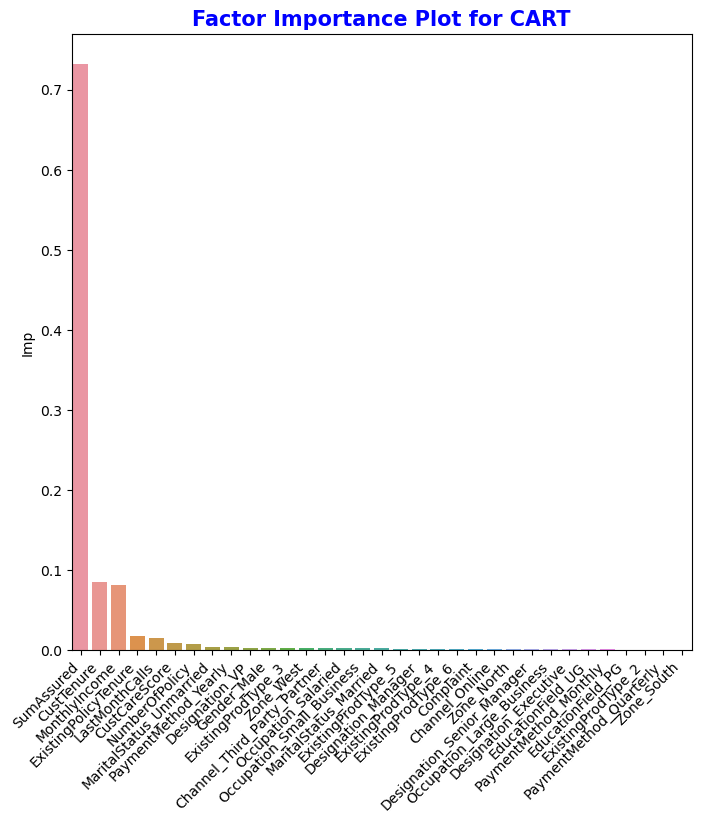

In [163]:
var_imp_cart1 = cart_model1.feature_importances_
var_imp_cart1 = pd.DataFrame(var_imp_cart1,index = list(X_test),columns = ['Imp'])
var_imp_cart1
fig,axes= plt.subplots(figsize=(8,8))
chart_cart1 = sns.barplot(x = var_imp_cart1.sort_values(by = 'Imp',ascending=False).index,
            y = var_imp_cart1['Imp'].sort_values(ascending=False),hue_order=var_imp_cart1['Imp'])
chart_cart1.set_xticklabels(chart_cart1.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title("Factor Importance Plot for CART",fontsize=15,weight='bold',color="Blue")
plt.show()

In [164]:
y_pred_train_cart = cart_model1.predict(X_train)
rmse_train_cart = np.sqrt(mean_squared_error(Y_train, y_pred_train_cart))
rmse_train_cart

0.0

In [165]:
r2_train_cart = r2_score(Y_train, y_pred_train_cart)
r2_train_cart

1.0

In [166]:
y_pred_cart = cart_model1.predict(X_test)
rmse_test_cart = np.sqrt(mean_squared_error(Y_test, y_pred_cart))
rmse_test_cart

821.6444506262047

In [167]:
r2_test_cart = r2_score(Y_test, y_pred_cart)
r2_test_cart

0.6541779615657246

## CART (Pruned) - Tuning

In [168]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
dt_model = DecisionTreeRegressor()
grid = {'criterion':['squared_error','friedman_mse', 'absolute_error', 'poisson'],
       'max_depth':list(range(10,100)),
       'min_samples_split':list(range(2,5)),
       'min_samples_leaf':list(range(1,100)),
       'min_impurity_decrease':list(np.arange(0.0001,0.01,0.001))}
random_search_CART = RandomizedSearchCV(estimator = dt_model, param_distributions = grid, cv = 10,n_jobs=-1,verbose=1)
random_search_CART.fit(X_train,Y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomizedSearchCV(cv=10, estimator=DecisionTreeRegressor(), n_jobs=-1,
                   param_distributions={'criterion': ['squared_error',
                                                      'friedman_mse',
                                                      'absolute_error',
                                                      'poisson'],
                                        'max_depth': [10, 11, 12, 13, 14, 15,
                                                      16, 17, 18, 19, 20, 21,
                                                      22, 23, 24, 25, 26, 27,
                                                      28, 29, 30, 31, 32, 33,
                                                      34, 35, 36, 37, 38, 39, ...],
                                        'min_impurity_decrease': [0.0001,
                                                                  0.0011,
                                                                  0.0021,
                                                                  0.0031,
                                                                  0.0041,
                                                                  0.0051,
                                                                  0.0061,
                                                                  0.0071,
                                                                  0.0081,
                                                                  0.0091],
                                        'min_samples_leaf': [1, 2, 3, 4, 5, 6,
                                                             7, 8, 9, 10, 11,
                                                             12, 13, 14, 15, 16,
                                                             17, 18, 19, 20, 21,
                                                             22, 23, 24, 25, 26,
                                                             27, 28, 29, 30, ...],
                                        'min_samples_split': [2, 3, 4]},
                   verbose=1)

In [169]:
cart_model2 = random_search_CART.best_estimator_
cart_model2

DecisionTreeRegressor(criterion='friedman_mse', max_depth=32,
                      min_impurity_decrease=0.0051, min_samples_leaf=24,
                      min_samples_split=4)

In [170]:
print (pd.DataFrame(cart_model2.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values('Imp',ascending=False))

                             Imp
SumAssured                  0.85
MonthlyIncome               0.08
CustTenure                  0.06
ExistingPolicyTenure        0.00
LastMonthCalls              0.00
ExistingProdType_4          0.00
NumberOfPolicy              0.00
Designation_Manager         0.00
CustCareScore               0.00
PaymentMethod_Yearly        0.00
MaritalStatus_Married       0.00
Gender_Male                 0.00
Occupation_Small_Business   0.00
Occupation_Large_Business   0.00
Designation_Senior_Manager  0.00
PaymentMethod_Quarterly     0.00
PaymentMethod_Monthly       0.00
Zone_West                   0.00
Zone_South                  0.00
Zone_North                  0.00
MaritalStatus_Unmarried     0.00
Designation_VP              0.00
Designation_Executive       0.00
Complaint                   0.00
Occupation_Salaried         0.00
ExistingProdType_6          0.00
ExistingProdType_5          0.00
Channel_Online              0.00
ExistingProdType_3          0.00
Channel_Th

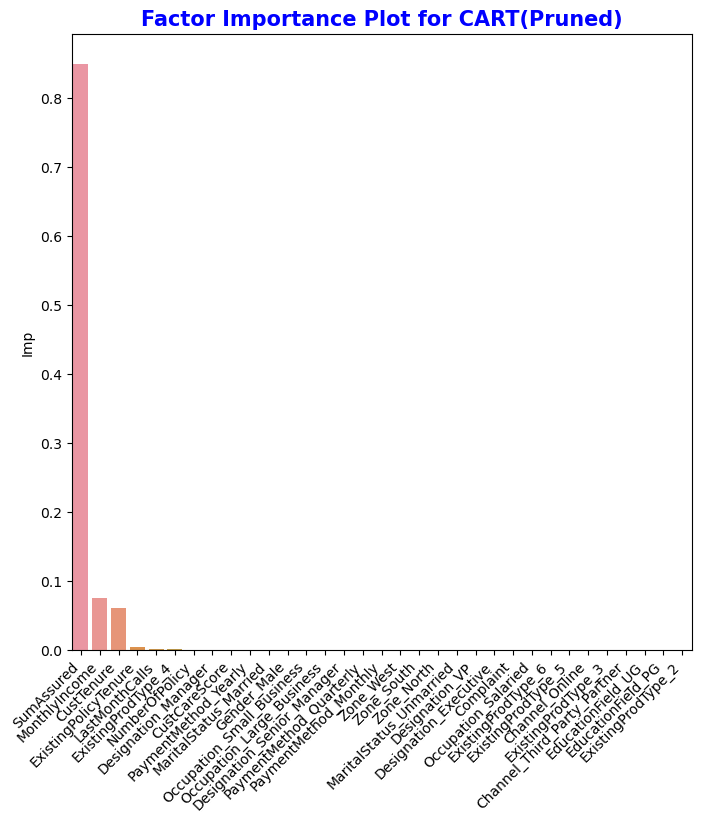

In [171]:
var_imp_cart2 = cart_model2.feature_importances_
var_imp_cart2 = pd.DataFrame(var_imp_cart2,index = list(X_test),columns = ['Imp'])
var_imp_cart2
fig,axes= plt.subplots(figsize=(8,8))
chart_cart2 = sns.barplot(x = var_imp_cart2.sort_values(by = 'Imp',ascending=False).index,
            y = var_imp_cart2['Imp'].sort_values(ascending=False),hue_order=var_imp_cart2['Imp'])
chart_cart2.set_xticklabels(chart_cart2.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title("Factor Importance Plot for CART(Pruned)",fontsize=15,weight='bold',color="Blue")
plt.show()

In [172]:
y_pred_train_cart2 = cart_model2.predict(X_train)
rmse_train_cart2 = np.sqrt(mean_squared_error(Y_train, y_pred_train_cart2))
rmse_train_cart2

568.1299884900895

In [173]:
r2_train_cart2 = r2_score(Y_train, y_pred_train_cart2)
r2_train_cart2

0.8366512962526695

In [174]:
y_pred_cart2 = cart_model2.predict(X_test)
rmse_test_dt2 = np.sqrt(mean_squared_error(Y_test, y_pred_cart2))
rmse_test_dt2

652.3870097578259

In [175]:
r2_test_cart2 = r2_score(Y_test, y_pred_cart2)
r2_test_cart2

0.7819804578235253

## K-Neighbor Regressor

In [176]:
from sklearn.neighbors import KNeighborsRegressor
model_KNN = KNeighborsRegressor()
params_KNN = {'n_neighbors':list(range(1,21,2)),
         'weights':['uniform','distance'],
         'metric':['euclidean','chebyshev','manhattan','minkowski']}
grid_search_KNN = GridSearchCV(estimator = model_KNN,param_grid = params_KNN,cv=10,n_jobs=-1)
grid_search_KNN.fit(X_train,Y_train)
KNN_model = grid_search_KNN.best_estimator_

In [177]:
KNN_model

KNeighborsRegressor(metric='manhattan', n_neighbors=17, weights='distance')

In [178]:
y_pred_train_KNN = KNN_model.predict(X_train)
rmse_train_KNN = np.sqrt(mean_squared_error(Y_train, y_pred_train_KNN))
rmse_train_KNN

0.0

In [179]:
r2_train_KNN = r2_score(Y_train, y_pred_train_KNN)
r2_train_KNN

1.0

In [180]:
y_pred_KNN = KNN_model.predict(X_test)
rmse_test_KNN = np.sqrt(mean_squared_error(Y_test, y_pred_KNN))
rmse_test_KNN

940.3874492816917

In [181]:
r2_test_KNN = r2_score(Y_test, y_pred_KNN)
r2_test_KNN

0.5469997286547281

## Random Forest Regressor

In [182]:
from sklearn.ensemble import RandomForestRegressor
model_RF = RandomForestRegressor()
params_RF = {'criterion':['squared_error','friedman_mse', 'absolute_error', 'poisson'],
         'n_estimators':list(range(100,1000,2)),
         'min_samples_leaf':list(range(1,10)),
         'max_samples':list(np.arange(0.1,1))}
grid_search_RF = RandomizedSearchCV(estimator = model_RF, param_distributions = params_RF, cv = 10,n_jobs=-1,verbose=1)
grid_search_RF.fit(X_train,Y_train)
RF_model = grid_search_RF.best_estimator_

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [183]:
RF_model

RandomForestRegressor(max_samples=0.1, min_samples_leaf=2, n_estimators=144)

In [184]:
print (pd.DataFrame(RF_model.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values('Imp',ascending=False))

                             Imp
SumAssured                  0.75
MonthlyIncome               0.08
CustTenure                  0.07
ExistingPolicyTenure        0.02
LastMonthCalls              0.02
CustCareScore               0.01
NumberOfPolicy              0.01
Designation_VP              0.00
Gender_Male                 0.00
ExistingProdType_4          0.00
MaritalStatus_Unmarried     0.00
MaritalStatus_Married       0.00
Designation_Manager         0.00
Complaint                   0.00
Occupation_Salaried         0.00
Occupation_Small_Business   0.00
ExistingProdType_3          0.00
EducationField_UG           0.00
PaymentMethod_Yearly        0.00
Designation_Senior_Manager  0.00
Channel_Third_Party_Partner 0.00
Zone_West                   0.00
Zone_North                  0.00
ExistingProdType_5          0.00
Channel_Online              0.00
Designation_Executive       0.00
Occupation_Large_Business   0.00
PaymentMethod_Monthly       0.00
ExistingProdType_2          0.00
EducationF

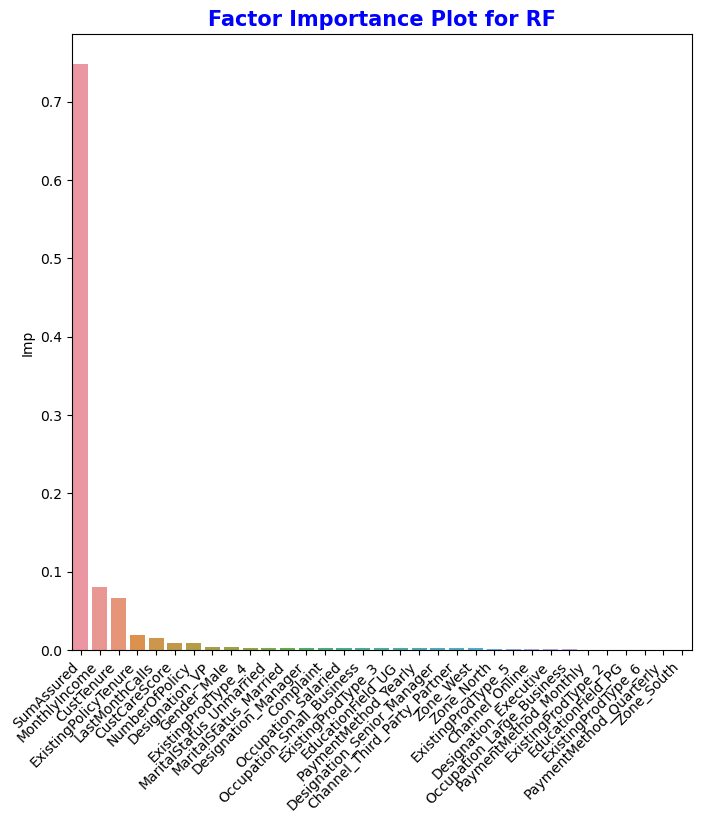

In [185]:
var_imp_RF = RF_model.feature_importances_
var_imp_RF = pd.DataFrame(var_imp_RF,index = list(X_test),columns = ['Imp'])
var_imp_RF
fig,axes= plt.subplots(figsize=(8,8))
chart_RF = sns.barplot(x = var_imp_RF.sort_values(by = 'Imp',ascending=False).index,
            y = var_imp_RF['Imp'].sort_values(ascending=False),hue_order=var_imp_RF['Imp'])
chart_RF.set_xticklabels(chart_RF.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title("Factor Importance Plot for RF",fontsize=15,weight='bold',color="Blue")
plt.show()

In [186]:
y_pred_train_RF = RF_model.predict(X_train)
rmse_train_RF = np.sqrt(mean_squared_error(Y_train, y_pred_train_RF))
rmse_train_RF

556.7343353163694

In [187]:
r2_train_RF = r2_score(Y_train, y_pred_train_RF)
r2_train_RF

0.8431385312534747

In [188]:
y_pred_RF = RF_model.predict(X_test)
rmse_test_RF = np.sqrt(mean_squared_error(Y_test, y_pred_RF))
rmse_test_RF

623.790087420734

In [189]:
r2_test_RF = r2_score(Y_test, y_pred_RF)
r2_test_RF

0.8006750095565337

## CART Bagging

In [190]:
from sklearn.ensemble import BaggingRegressor
model_CARTB = BaggingRegressor(base_estimator = cart_model1)
params_CARTB = {'n_estimators':list(range(100,500,2)),
              'max_samples':list(np.arange(0.01,1,0.01)),
              'max_features':list(np.arange(0.01,1,0.01))}
grid_search_CARTB = RandomizedSearchCV(estimator = model_CARTB, param_distributions = params_CARTB, cv = 10,n_jobs=-1,verbose=2)
grid_search_CARTB.fit(X_train,Y_train)
CARTB_model = grid_search_CARTB.best_estimator_

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [191]:
CARTB_model

BaggingRegressor(base_estimator=DecisionTreeRegressor(), max_features=0.97,
                 max_samples=0.68, n_estimators=378)

In [192]:
y_pred_train_CARTB = CARTB_model.predict(X_train)
rmse_train_CARTB = np.sqrt(mean_squared_error(Y_train, y_pred_train_CARTB))
rmse_train_CARTB

294.8733223070871

In [193]:
r2_train_CARTB = r2_score(Y_train, y_pred_train_CARTB)
r2_train_CARTB

0.9559960937683698

In [194]:
y_pred_CARTB = CARTB_model.predict(X_test)
rmse_test_CARTB = np.sqrt(mean_squared_error(Y_test, y_pred_CARTB))
rmse_test_CARTB

597.7582882939818

In [195]:
r2_test_CARTB = r2_score(Y_test, y_pred_CARTB)
r2_test_CARTB

0.8169642062920806

## XG Boosting Regressor

In [196]:
from sklearn.ensemble import GradientBoostingRegressor
model_XGB = GradientBoostingRegressor()
params_XGB = {'criterion':['friedman_mse', 'squared_error'],
              'learning_rate':list(np.arange(0.01,0.02,0.0000005)),
             'n_estimators':list(np.arange(100,1000,2))}
random_search_XGB = RandomizedSearchCV(estimator = model_XGB, param_distributions = params_XGB, cv = 10,n_jobs=-1,verbose=2,random_state=1)
random_search_XGB.fit(X_train,Y_train)
XGB_model=random_search_XGB.best_estimator_

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [197]:
XGB_model

GradientBoostingRegressor(learning_rate=0.01817900000000818, n_estimators=844)

In [198]:
print (pd.DataFrame(XGB_model.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values('Imp',ascending=False))

                             Imp
SumAssured                  0.80
MonthlyIncome               0.09
CustTenure                  0.07
ExistingPolicyTenure        0.01
LastMonthCalls              0.00
Designation_Manager         0.00
Designation_VP              0.00
NumberOfPolicy              0.00
CustCareScore               0.00
Occupation_Salaried         0.00
ExistingProdType_6          0.00
ExistingProdType_3          0.00
Zone_North                  0.00
MaritalStatus_Unmarried     0.00
EducationField_UG           0.00
ExistingProdType_2          0.00
MaritalStatus_Married       0.00
Channel_Online              0.00
Zone_West                   0.00
Channel_Third_Party_Partner 0.00
ExistingProdType_5          0.00
PaymentMethod_Monthly       0.00
ExistingProdType_4          0.00
Occupation_Large_Business   0.00
PaymentMethod_Yearly        0.00
EducationField_PG           0.00
Gender_Male                 0.00
Complaint                   0.00
Designation_Senior_Manager  0.00
Designatio

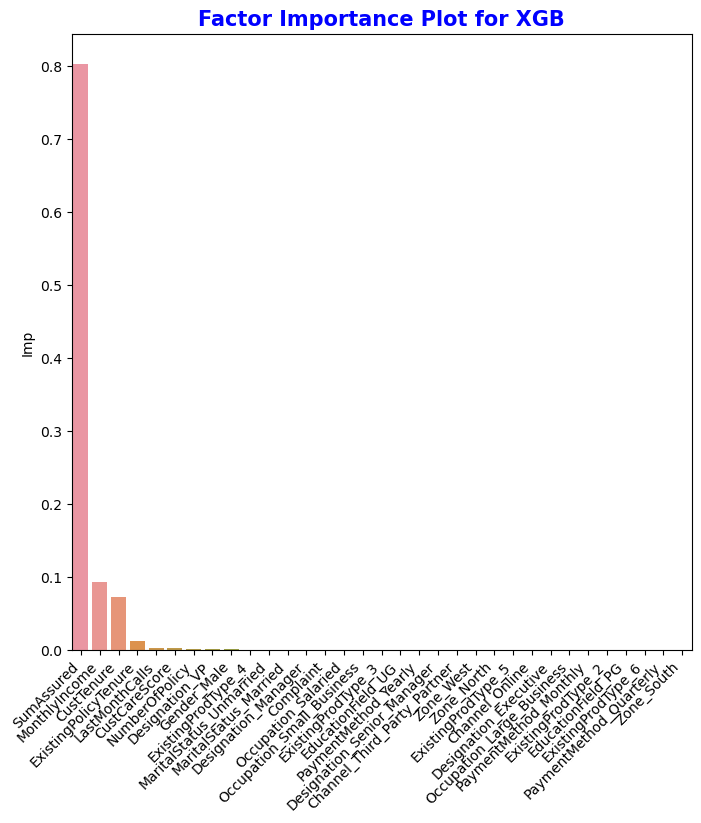

In [199]:
var_imp_XGB = XGB_model.feature_importances_
var_imp_XGB = pd.DataFrame(var_imp_XGB,index = list(X_test),columns = ['Imp'])
var_imp_XGB
fig,axes= plt.subplots(figsize=(8,8))
chart_XGB = sns.barplot(x = var_imp_RF.sort_values(by = 'Imp',ascending=False).index,
            y = var_imp_XGB['Imp'].sort_values(ascending=False),hue_order=var_imp_XGB['Imp'])
chart_XGB.set_xticklabels(chart_XGB.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title("Factor Importance Plot for XGB",fontsize=15,weight='bold',color="Blue")
plt.show()

In [200]:
y_pred_train_XGB = XGB_model.predict(X_train)
rmse_train_XGB = np.sqrt(mean_squared_error(Y_train, y_pred_train_XGB))
rmse_train_XGB

513.658141365406

In [201]:
r2_train_XGB = r2_score(Y_train, y_pred_train_XGB)
r2_train_XGB

0.8664731460653274

In [202]:
y_pred_XGB = XGB_model.predict(X_test)
rmse_test_XGB = np.sqrt(mean_squared_error(Y_test, y_pred_XGB))
rmse_test_XGB

608.452469881606

In [203]:
r2_test_XGB = r2_score(Y_test, y_pred_XGB)
r2_test_XGB

0.8103564264395114

## ADA Boosting Regressor

In [204]:
from sklearn.ensemble import AdaBoostRegressor
model_ADA = AdaBoostRegressor()
params_ADA = {'n_estimators':list(np.arange(100,500)),
             'learning_rate':list(np.arange(0.1,0.5,0.00001))}
grid_search_ADA = RandomizedSearchCV(estimator = model_ADA, param_distributions = params_ADA, cv = 10,n_jobs=-1,verbose=2)
grid_search_ADA.fit(X_train,Y_train)
ADA_model = grid_search_ADA.best_estimator_

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [205]:
ADA_model

AdaBoostRegressor(learning_rate=0.16381999999997526, n_estimators=204)

In [206]:
y_pred_train_ADA = ADA_model.predict(X_train)
rmse_train_ADA = np.sqrt(mean_squared_error(Y_train, y_pred_train_ADA))
rmse_train_ADA

664.50878243903

In [207]:
r2_train_ADA = r2_score(Y_train, y_pred_train_ADA)
r2_train_ADA

0.7765287208411938

In [208]:
y_pred_ADA = ADA_model.predict(X_test)
rmse_test_ADA = np.sqrt(mean_squared_error(Y_test, y_pred_ADA))
rmse_test_ADA

694.2585117603654

In [209]:
r2_test_ADA = r2_score(Y_test, y_pred_ADA)
r2_test_ADA

0.753096503814235

## Voting Regressor

In [210]:
from sklearn.ensemble import VotingRegressor
estim_list = [('Lasso_model',Lassomodel),('CART(Pruned)',cart_model2),('RF_model',RF_model),
             ('DTB_model',CARTB_model),('XGB_model',XGB_model),('ADA_model',ADA_model)]
VOTH_model = VotingRegressor(estimators = estim_list,n_jobs=-1) 
VOTH_model.fit(X_train,Y_train)

VotingRegressor(estimators=[('Lasso_model',
                             LassoCV(alphas=[0.0001, 0.001, 0.01, 0.1, 1, 10])),
                            ('CART(Pruned)',
                             DecisionTreeRegressor(criterion='friedman_mse',
                                                   max_depth=32,
                                                   min_impurity_decrease=0.0051,
                                                   min_samples_leaf=24,
                                                   min_samples_split=4)),
                            ('RF_model',
                             RandomForestRegressor(max_samples=0.1,
                                                   min_samples_leaf=2,
                                                   n_estimators=144)),
                            ('DTB_model',
                             BaggingRegressor(base_estimator=DecisionTreeRegressor(),
                                              max_features=0.97,
                                              max_samples=0.68,
                                              n_estimators=378)),
                            ('XGB_model',
                             GradientBoostingRegressor(learning_rate=0.01817900000000818,
                                                       n_estimators=844)),
                            ('ADA_model',
                             AdaBoostRegressor(learning_rate=0.16381999999997526,
                                               n_estimators=204))],
                n_jobs=-1)

In [211]:
VOTH_model.get_params

<bound method _BaseHeterogeneousEnsemble.get_params of VotingRegressor(estimators=[('Lasso_model',
                             LassoCV(alphas=[0.0001, 0.001, 0.01, 0.1, 1, 10])),
                            ('CART(Pruned)',
                             DecisionTreeRegressor(criterion='friedman_mse',
                                                   max_depth=32,
                                                   min_impurity_decrease=0.0051,
                                                   min_samples_leaf=24,
                                                   min_samples_split=4)),
                            ('RF_model',
                             RandomForestRegressor(max_samples=0.1,
                                                   min_samples_leaf=2,
                                                   n_estimators=144)),
                            ('DTB_model',
                             BaggingRegressor(base_estimator=DecisionTreeRegressor(),
                           

In [212]:
y_pred_train_VOTH = VOTH_model.predict(X_train)
rmse_train_VOTH = np.sqrt(mean_squared_error(Y_train, y_pred_train_VOTH))
rmse_train_VOTH

514.5485489935298

In [213]:
r2_train_VOTH = r2_score(Y_train, y_pred_train_VOTH)
r2_train_VOTH

0.8660098169818691

In [214]:
y_pred_VOTH = VOTH_model.predict(X_test)
rmse_test_VOTH = np.sqrt(mean_squared_error(Y_test, y_pred_VOTH))
rmse_test_VOTH

612.0506218426204

In [215]:
r2_test_VOTH = r2_score(Y_test, y_pred_VOTH)
r2_test_VOTH

0.8081068373422307

## Voting Regressor - Weighted

In [216]:
estim_list = [('Lasso_model',Lassomodel),('CART(Pruned)',cart_model2),('RF_model',RF_model),
             ('DTB_model',CARTB_model),('XGB_model',XGB_model),('ADA_model',ADA_model)]
VOTW_model = VotingRegressor(estimators = estim_list,n_jobs=-1,weights = [3,3,5,5,5,3]) 
VOTW_model.fit(X_train,Y_train)

VotingRegressor(estimators=[('Lasso_model',
                             LassoCV(alphas=[0.0001, 0.001, 0.01, 0.1, 1, 10])),
                            ('CART(Pruned)',
                             DecisionTreeRegressor(criterion='friedman_mse',
                                                   max_depth=32,
                                                   min_impurity_decrease=0.0051,
                                                   min_samples_leaf=24,
                                                   min_samples_split=4)),
                            ('RF_model',
                             RandomForestRegressor(max_samples=0.1,
                                                   min_samples_leaf=2,
                                                   n_estimators=144)),
                            ('DTB_model',
                             BaggingRegressor(base_estimator=DecisionTreeRegressor(),
                                              max_features=0.97,
                                              max_samples=0.68,
                                              n_estimators=378)),
                            ('XGB_model',
                             GradientBoostingRegressor(learning_rate=0.01817900000000818,
                                                       n_estimators=844)),
                            ('ADA_model',
                             AdaBoostRegressor(learning_rate=0.16381999999997526,
                                               n_estimators=204))],
                n_jobs=-1, weights=[3, 3, 5, 5, 5, 3])

In [217]:
VOTW_model.get_params

<bound method _BaseHeterogeneousEnsemble.get_params of VotingRegressor(estimators=[('Lasso_model',
                             LassoCV(alphas=[0.0001, 0.001, 0.01, 0.1, 1, 10])),
                            ('CART(Pruned)',
                             DecisionTreeRegressor(criterion='friedman_mse',
                                                   max_depth=32,
                                                   min_impurity_decrease=0.0051,
                                                   min_samples_leaf=24,
                                                   min_samples_split=4)),
                            ('RF_model',
                             RandomForestRegressor(max_samples=0.1,
                                                   min_samples_leaf=2,
                                                   n_estimators=144)),
                            ('DTB_model',
                             BaggingRegressor(base_estimator=DecisionTreeRegressor(),
                           

In [218]:
y_pred_train_VOTW = VOTW_model.predict(X_train)
rmse_train_VOTW = np.sqrt(mean_squared_error(Y_train, y_pred_train_VOTW))
rmse_train_VOTW

496.14222109213904

In [219]:
r2_train_VOTW = r2_score(Y_train, y_pred_train_VOTW)
r2_train_VOTW

0.8754245003556913

In [220]:
y_pred_VOTW = VOTW_model.predict(X_test)
rmse_test_VOTW = np.sqrt(mean_squared_error(Y_test, y_pred_VOTW))
rmse_test_VOTW

608.4442253521755

In [221]:
r2_test_VOTW = r2_score(Y_test, y_pred_VOTW)
r2_test_VOTW

0.8103615657445782

## Stacking Regressor

In [222]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import StackingRegressor
estim_list = [('Lasso_model',Lassomodel),('CART(Pruned)',cart_model2),('RF_model',RF_model),
             ('DTB_model',CARTB_model),('XGB_model',XGB_model),('ADA_model',ADA_model)]
stacker = LinearRegression()
model_STA = StackingRegressor(estimators=estim_list,final_estimator = stacker,n_jobs=-1)
model_STA.fit(X_train,Y_train)

StackingRegressor(estimators=[('Lasso_model',
                               LassoCV(alphas=[0.0001, 0.001, 0.01, 0.1, 1,
                                               10])),
                              ('CART(Pruned)',
                               DecisionTreeRegressor(criterion='friedman_mse',
                                                     max_depth=32,
                                                     min_impurity_decrease=0.0051,
                                                     min_samples_leaf=24,
                                                     min_samples_split=4)),
                              ('RF_model',
                               RandomForestRegressor(max_samples=0.1,
                                                     min_samples_leaf=2,
                                                     n_estimators=144)),
                              ('DTB_model',
                               BaggingRegressor(base_estimator=DecisionTreeRegressor(),
                                                max_features=0.97,
                                                max_samples=0.68,
                                                n_estimators=378)),
                              ('XGB_model',
                               GradientBoostingRegressor(learning_rate=0.01817900000000818,
                                                         n_estimators=844)),
                              ('ADA_model',
                               AdaBoostRegressor(learning_rate=0.16381999999997526,
                                                 n_estimators=204))],
                  final_estimator=LinearRegression(), n_jobs=-1)

In [223]:
model_STA.get_params

<bound method _BaseHeterogeneousEnsemble.get_params of StackingRegressor(estimators=[('Lasso_model',
                               LassoCV(alphas=[0.0001, 0.001, 0.01, 0.1, 1,
                                               10])),
                              ('CART(Pruned)',
                               DecisionTreeRegressor(criterion='friedman_mse',
                                                     max_depth=32,
                                                     min_impurity_decrease=0.0051,
                                                     min_samples_leaf=24,
                                                     min_samples_split=4)),
                              ('RF_model',
                               RandomForestRegressor(max_samples=0.1,
                                                     min_samples_leaf=2,
                                                     n_estimators=144)),
                              ('DTB_model',
                               BaggingRe

In [224]:
y_pred_train_STA = model_STA.predict(X_train)
rmse_train_STA = np.sqrt(mean_squared_error(Y_train, y_pred_train_STA))
rmse_train_STA

335.4555697898429

In [225]:
r2_train_STA = r2_score(Y_train, y_pred_train_STA)
r2_train_STA

0.9430504523363995

In [226]:
y_pred_STA = model_STA.predict(X_test)
rmse_test_STA = np.sqrt(mean_squared_error(Y_test, y_pred_STA))
rmse_test_STA

595.5727377248494

In [227]:
r2_test_STA = r2_score(Y_test, y_pred_STA)
r2_test_STA

0.8183002067453264

## Performance Metrics

In [228]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import max_error

In [229]:
mod = ['Linear Regression','Lasso Regression','Ridge Regression','SGD Regression','CART','CART(Pruned)','K-Neighbors Regressor','Random Forest Regressor','CART-Bagging','XG-Boosting','ADA Boosting','Voting Regressor','Voting Regressor(Weighted)','Stacking Regressor']
r2=[]
mae = []
mse = []
mape = []
rmse=[]
maxerr = []
test_pred = [y_pred_LR,y_pred_ls,y_pred_Rd,y_pred_SGD,y_pred_cart,y_pred_cart2,y_pred_KNN,y_pred_RF,y_pred_CARTB,y_pred_XGB,y_pred_ADA,y_pred_VOTH,y_pred_VOTW,y_pred_STA]
for i in test_pred:
    r2.append(r2_score(Y_test,i)*100)
    mae.append(mean_absolute_error(Y_test,i))
    mse.append(mean_squared_error(Y_test,i))
    mape.append(mean_absolute_percentage_error(Y_test,i))
    rmse.append(np.sqrt(mean_squared_error(Y_test,i)))
    maxerr.append(max_error(Y_test,i))
metric_df_test = pd.DataFrame({'Model':mod,'R-Squared(%)':r2,'MAE':mae,'MSE':mse,'MAPE':mape,'RMSE':rmse,'Max Error':maxerr})    
metric_df_test   

Model  R-Squared(%)    MAE       MSE  MAPE   RMSE  \
0            Linear Regression         76.90 524.81 450935.45  0.13 671.52   
1             Lasso Regression         77.14 523.55 446259.25  0.14 668.03   
2             Ridge Regression         77.11 523.89 446805.61  0.14 668.44   
3               SGD Regression         77.03 524.36 448407.12  0.14 669.63   
4                         CART         65.42 602.07 675099.60  0.16 821.64   
5                 CART(Pruned)         78.20 504.03 425608.81  0.13 652.39   
6        K-Neighbors Regressor         54.70 763.75 884328.55  0.20 940.39   
7      Random Forest Regressor         80.07 490.59 389114.07  0.13 623.79   
8                 CART-Bagging         81.70 462.61 357314.97  0.12 597.76   
9                  XG-Boosting         81.04 474.57 370214.41  0.12 608.45   
10                ADA Boosting         75.31 573.02 481994.88  0.15 694.26   
11            Voting Regressor         80.81 483.15 374605.96  0.13 612.05   
12  Voting Regressor(Weighted)         81.04 479.80 370204.38  0.13 608.44   
13          Stacking Regressor         81.83 459.97 354706.89  0.12 595.57   

    Max Error  
0     2610.78  
1     2642.07  
2     2640.16  
3     2698.12  
4     4313.00  
5     3379.93  
6     3691.89  
7     2754.00  
8     2666.33  
9     2618.39  
10    2268.86  
11    2675.87  
12    2681.54  
13    2630.49

In [230]:
metric_df_test.style.set_caption("Model Metrics").set_precision(2).background_gradient(subset=['MAE','MSE','MAPE','RMSE','Max Error'],cmap='RdYlGn_r',text_color_threshold=0).background_gradient(subset='R-Squared(%)',cmap='RdYlGn',text_color_threshold=0)